In [2]:
1+1


2

In [3]:
%%time

import uproot
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
from unc_funcs import *
from unc_samples import *

from unc_MC_overhead import *
from unc_cuts import *


<class 'pandas.core.series.Series'>
Percentage of non-cohlike events in the nominal nu sample:  0.07448586354127161
<class 'pandas.core.series.Series'>


/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/nb/unc_MC_overhead.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evtdfs[i]["scale"] = GOAL_POT / pots[i]
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/nb/unc_MC_overhead.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evtdfs[i]["bsm_mass"] = masses[i]
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09

evtdf.shape before enforcing correct FV w/ uncontained track length: (1576035, 266)
evtdf.shape after enforcing correct FV w/ uncontained track length: (1542531, 266)


/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/e

CPU times: user 1min 13s, sys: 53.2 s, total: 2min 6s
Wall time: 3min 58s


In [9]:
print(cohlike_nu_file_extra_2502_12345)
print(type(cohlike_nu_file_extra_2502_12345))
#file = '/exp/icarus/data/users/jdyer/dimuon-data/2502_moreCohlike/12/even_more_Cohlike_12.df'
#file = '/exp/icarus/data/users/jdyer/dimuon-data/2502_moreCohlike/34/even_more_Cohlike_34.df'
file = '/exp/icarus/data/users/jdyer/dimuon-data/2502_moreCohlike/5/even_more_Cohlike_5.df'
#file = cohlike_nu_file_extra_2502_6789
pd.read_hdf(file, key="mcnu")

/exp/icarus/data/users/jdyer/dimuon-data/2502_moreCohlike/12345/even_more_Cohlike_12345.df
<class 'str'>


E      time  bjorkenX inelasticityY  \
                                                                              
                                                                              
__ntuple entry rec.mc.nu..index                                               
3        0     0                 7.533286  3.351941  0.531278      0.155143   
         1     0                 4.828675  5.744014  0.047229      0.271778   
         2     0                 1.829097  9.132684  0.376671      0.393089   
         3     0                 1.765332  8.210820  0.138082      0.882138   
         4     0                 4.625667  4.876088  0.712007      0.653105   
...                                   ...       ...       ...           ...   
979      44    0                 2.935668  5.215820  0.083049      0.760544   
         45    0                 3.047627  8.115922  0.305016      0.747751   
         46    0                 1.559118  0.187565  0.120483      0.207815   
         47    0                 2.927570  4.820343  0.307706      0.833455   
         48    0                 5.788613  3.183454  0.450223      0.654473   

                                       Q2         w  momentum            \
                                                            x         y   
                                                                          
__ntuple entry rec.mc.nu..index                                           
3        0     0                 1.165994  1.382126  2.969703  0.427690   
         1     0                 0.116388  1.797086  1.885628  0.202404   
         2     0                 0.508566  1.312693  0.708148  0.135372   
         3     0                 0.403791  1.844470  0.705427  0.071932   
         4     0                 4.039242  1.585989  1.845871  0.244863   
...                                   ...       ...       ...       ...   
979      44    0                 0.348194  2.173944  1.156670  0.127956   
         45    0                 1.305269  1.963578  1.212495  0.133096   
         46    0                 0.073306  1.190251  0.615684  0.062878   
         47    0                 1.409883  2.013356  1.170462  0.119632   
         48    0                 3.202958  2.189241  2.283696  0.250744   

                                             position  ...        p1  \
                                        z           x  ...      genp   
                                                       ...         x   
__ntuple entry rec.mc.nu..index                        ...             
3        0     0                 6.910017 -308.097443  ...  0.003262   
         1     0                 4.440669 -243.664291  ...  0.205934   
         2     0                 1.681010 -296.625275  ...  0.019178   
         3     0                 1.616662  317.439148  ...  0.401303   
         4     0                 4.234335  237.042770  ... -0.274496   
...                                   ...         ...  ...       ...   
979      44    0                 2.695160  101.519707  ... -0.014014   
         45    0                 2.792879  279.240540  ... -0.003152   
         46    0                 1.431024  257.783112  ...  0.439898   
         47    0                 2.680741  248.726379  ...  0.662753   
         48    0                 5.313182  -72.625595  ...  0.000338   

                                                                             \
                                                          start               
                                        y         z           x           y   
__ntuple entry rec.mc.nu..index                                               
3        0     0                -0.000719 -0.000606 -308.097443 -103.072998   
         1     0                -0.245353  0.717041 -243.664291   -5.134502   
         2     0                 0.143893  0.270947 -296.625275  -25.485725   
         3     0                 0.163835  0.733533  317.439148 -116.071594   
         4     

In [4]:
# Explicitly look at the somewhat funky POT counting for my many cohlike samples:

og_pots = [np.sum(hdr.pot * hdr.first_in_subrun) for hdr in hdrs]
#for p in og_pots: print(p)
print('')
print(GOAL_POT)
for i in range(len(pots)):
    print(i, ': ', labels[i], ': ', pots[i], '(',og_pots[i],')')


2.41e+20
0 :  $M_S$ = 220, $\theta_S$ = 1e-05 :  1.2139165e+26 ( 1.2139165e+26 )
1 :  $M_S$ = 240, $\theta_S$ = 1e-05 :  2.2434914e+25 ( 2.2434914e+25 )
2 :  $M_S$ = 260, $\theta_S$ = 1e-05 :  1.1231296e+25 ( 1.1231296e+25 )
3 :  $M_S$ = 280, $\theta_S$ = 1e-05 :  4.8350902e+24 ( 4.8350902e+24 )
4 :  $M_S$ = 300, $\theta_S$ = 1e-05 :  7.2858396e+24 ( 7.2858396e+24 )
5 :  $M_S$ = 320, $\theta_S$ = 1e-05 :  1.3246029e+23 ( 1.3246029e+23 )
6 :  $M_S$ = 340, $\theta_S$ = 1e-05 :  1.4283393e+25 ( 1.4283393e+25 )
7 :  $M_S$ = 350, $\theta_S$ = 1e-05 :  8.675145e+23 ( 8.675145e+23 )
8 :  $M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06' :  4.7923528e+27 ( 4.7923528e+27 )
9 :  $M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06' :  3.503659e+27 ( 3.503659e+27 )
10 :  $M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06' :  3.272339e+27 ( 3.272339e+27 )
11 :  $M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06' :  2.0399753e+27 ( 2.0399753e+27 )
12 :  $M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06' :  9.177009e+26 ( 9.17

In [4]:
for c in make_categories(evtdf, detailed_bsm=True):
    print(c.name, ': ', evtdf[c].shape)

$M_S$ = 220, $\theta_S$ = 1e-05 :  (15679, 282)
$M_S$ = 240, $\theta_S$ = 1e-05 :  (22943, 282)
$M_S$ = 260, $\theta_S$ = 1e-05 :  (25277, 282)
$M_S$ = 280, $\theta_S$ = 1e-05 :  (14517, 282)
$M_S$ = 300, $\theta_S$ = 1e-05 :  (22467, 282)
$M_S$ = 320, $\theta_S$ = 1e-05 :  (429, 282)
$M_S$ = 340, $\theta_S$ = 1e-05 :  (28412, 282)
$M_S$ = 350, $\theta_S$ = 1e-05 :  (1173, 282)
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06' :  (22862, 282)
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06' :  (24729, 282)
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06' :  (25308, 282)
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06' :  (26060, 282)
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06' :  (26746, 282)
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06' :  (27492, 282)
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06' :  (26865, 282)
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06' :  (27593, 282)
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06' :  (27553, 282)
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06' :  (27216, 282)

In [6]:
for c in evtdf.columns: print(c)
    
    

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

In [14]:
importlib.reload(var)
importlib.reload(cut)
importlib.reload(data)
importlib.reload(hist)
importlib.reload(panda_helpers)



<module 'pyanalib.panda_helpers' from '/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/pyanalib/panda_helpers.py'>

In [4]:
plt.rcParams.update({'font.size': 16})
mpl.rcParams['lines.linewidth'] = 4.

dosave = True
#savedir = "/exp/icarus/data/users/jdyer/muon_selection/"
#plotdir = savedir+'plots/'
savedir = '/exp/icarus/data/users/jdyer/Figs/'


In [7]:
for p in pots: print(p)
    

1.2139165e+26
2.2434914e+25
1.1231296e+25
4.8350902e+24
7.2858396e+24
1.3246029e+23
1.4283393e+25
8.675145e+23
4.7923528e+27
3.503659e+27
3.272339e+27
2.0399753e+27
9.177009e+26
1.8807227e+26
1.6313952e+25
9.302183e+25
2.008385e+26
2.684004e+26
8.0673304e+20
1.6425641e+22
1.6425641e+22


From running data.mc_dataset function on the bsm samples:

NOTE: As of December 9, 2024, these printed values for ALPs are out of date because I replaced/added new alp masses and haven't rerun this function. But, for the MC it's okay to just use the 'pots' I have above. 

/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M220_nom_evt.df :  
    1.2139165e+26  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M240_nom_evt.df :  
    2.2434914e+25  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M260_nom_evt.df :  
    1.1231296e+25  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M280_nom_evt.df :  
    4.8350902e+24  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M300_nom_evt.df :  
    7.2858396e+24  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M340_nom_evt.df :  
    1.4283393e+25  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M300_faE6_evt.df :  
    3.0070923e+27  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M500_faE6_evt.df :  
    1.21001335e+26  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M300_faE5_evt.df :  
    7.3614024e+23  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M500_faE5_evt.df :  
    1.8223409e+23  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F-MCNuPhase2_evt.df :  
    8.0673304e+20  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F-CohLike_nom_evt.df :  
    5.5160685e+21  POT

In [29]:
for c in evtdf.columns: print(c)
#evtdf.wgt.cv


('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

## Here I am impose that one or both of the muon candidates are exiting

In [3]:
print(evtdf.shape)
when_uncontained = ~TrkInFV(evtdf.trunk.trk.end) | ~TrkInFV(evtdf.branch.trk.end)
evtdf = evtdf[when_uncontained]
print(evtdf.shape)


(1542531, 282)
(937879, 282)


In [16]:
for c in evtdf.columns: print(c)
    

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

In [7]:
# ALSO SPLIT INTO SUBCATEGORIES

# both are uncontained:

when_both_unc = ~TrkInFV(evtdf.trunk.trk.end) & ~TrkInFV(evtdf.branch.trk.end)
evtdf_both_unc = evtdf[when_both_unc]
evtdf_semi_con = evtdf[~when_both_unc]
#print(evtdf_both_unc.shape)

print("")
print('all higgs at first mass point: ', evtdf[make_categories(evtdf)[0]].shape[0])
print('both uncontained (higgs at first mass point): ', evtdf_both_unc[make_categories(evtdf_both_unc)[0]].shape[0])
print('semi contained (higgs at first mass point): ', evtdf_semi_con[make_categories(evtdf_semi_con)[0]].shape[0])


all higgs at first mass point:  261334
both uncontained (higgs at first mass point):  107114
semi contained (higgs at first mass point):  154220


# Define Plotting Function

In [4]:
# Plotting function common to all variables

def makeplot(df, var, myrange, xlabel = 'x axis',
             bins = 25, detailed_bsm=False, detailed_nu='none', hps_final_state=False,
             plotname='noname', density=True, logy=False, vline=[], title='', 
             categories='int_type',
             apply_cv_weights = False, 
             do_stat_err = False
            ):
    fig = plt.figure()
    ax = plt.subplot(111)
    scale = df.scale.copy()
    #var[np.isnan(var) | (var < 0)] = -10
    var[np.isnan(var)] = -10
    if categories == 'int_type':
        categories = make_categories(df, detailed_bsm = detailed_bsm,
                                     detailed_nu = detailed_nu,
                                     hps_final_state = hps_final_state)
    if categories == 'vtx':
        categories = make_vtxcategories(df)
    yrange = [0,0]
    for c in categories:
        # weights = [df[cat].scale*df[cat].wgt.cv for cat in categories[:-2]]
        if apply_cv_weights:
            hist = plt.hist(var[c], weights=df[c].scale*df[c].wgt.cv, bins=bins, label=c.name, color=c.color,
                                 histtype="step", linewidth=2, range=myrange, density=density)
        else:
            hist = plt.hist(var[c], weights=df[c].scale, bins=bins, label=c.name, 
                                  histtype="step", linewidth=2, range=myrange, density=density) # , color=c.color
        if np.max(hist[0]) > yrange[1]: 
            yrange[1] = np.max(hist[0])*1.4
        # Get the statistical error bars for the above hists:
        if do_stat_err:
            if apply_cv_weights | density | logy: 
                print('Function not currently equipped to get statistical errors given other plot settings.')
                return 'Tough luck.'
            unq = np.unique(np.array(df[c].scale))
            arg_of_root = 0 # initialize
            temp = 0 # placeholder
            for w in unq:
                temp = plt.hist(var[c][df[c].scale==w],
                                bins=bins, alpha=0, density=False, range=myrange)
                arg_of_root = arg_of_root + (w**2)*temp[0]
            stat_err = np.sqrt( arg_of_root )
            plt.errorbar( 0.5*(temp[1][1:] + temp[1][:-1]),
                         hist[0],
                         marker = '.',
                         yerr = stat_err, 
                         color = c.color,
                         ls = 'none',
                         elinewidth=2
                        )
            if 'nu' in c.name:
                print('BIN VALUE: ', hist[0])
                print('STAT ERROR: ', stat_err)
        
    if density:
        plt.ylabel("Area Normalized")
    else:
        plt.ylabel("Events / %s" % POTSTR)
    plt.xlabel(xlabel)
    if logy:
        plt.yscale("log")
    if len(vline)==2:
        plt.axvline([vline[0]], color="r", linewidth=2) #, linestyle=":"
        plt.axvline([vline[1]], color="r", linewidth=2)
    else:
        for v in vline:
            plt.axvline([v], linestyle=":", color="r", linewidth=2) # , color="r"
    plt.title(title)
    plt.tight_layout()
    plt.xlim(myrange)
    if do_stat_err:
        yrange = (0,3)
        plt.ylim(yrange) # idk why it gets messed up without this, but it does.
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    if detailed_bsm:
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
    else:
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize='x-small')
    if saveplots: plt.savefig(plotdir + 'MCdist_' + plotname + ".png", format='png', bbox_inches='tight')
    plt.show()
    

# Define and Impose Cuts

At this stage the dataframes already satisfy the following preselection:
- no clear cosmics
- slice has contained interaction vertex
- slice has >= 2 tracks (muon candidates) with start point within 10 cm of reconstructed interaction vertex
- One or both tracks have endpoint outside of the fiducial volume (exiting tracks must be at least 1 m long).

In [5]:
# CHOOSE WHICH CUTS TO APPLY HERE:

final_cuts = [ not_stub_05, not_stub_1, not_stub_2, not_stub_3,
              max_shw_len_mask,
              ok_chi2mu,
              numi_angle_mask, open_angle_mask,
              shortTrk_len_mask
             ]
final_thresholds = [ 50, 35, 15, 10,
                    10.0,
                    13,
                    3, 15,
                    140.0
                   ]

cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask,
            ok_chi2mu, ok_chi2p,
            numi_angle_mask, open_angle_mask, 
            shortTrk_len_mask
           ]
opt_thresholds = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    NuMI_angle_thresh, open_angle_thresh,
    trk_len_thresh
]

# No Stub ID:
cut_list_noStubID = [
            max_shw_len_mask,
            ok_chi2mu, ok_chi2p,
            numi_angle_mask, open_angle_mask, 
            shortTrk_len_mask
           ]
opt_thresholds_noStubID = [
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    NuMI_angle_thresh, open_angle_thresh,
    trk_len_thresh
]

# No PID
cut_list_noPID = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask,
            numi_angle_mask, open_angle_mask, 
            shortTrk_len_mask
           ]
opt_thresholds_noPID = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    NuMI_angle_thresh, open_angle_thresh,
    trk_len_thresh
]
#cut_results = apply_cuts_sneaky_BG(evtdf, cut_list_noPID, thresholds=opt_thresholds_noPID)

# No ShwLen:
cut_list_noShw = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            ok_chi2mu, ok_chi2p,
            numi_angle_mask, open_angle_mask, 
            shortTrk_len_mask
           ]
opt_thresholds_noShw = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    NuMI_angle_thresh, open_angle_thresh,
    trk_len_thresh
]
#cut_results = apply_cuts_sneaky_BG(evtdf, cut_list_noShw, thresholds=opt_thresholds_noShw)

# NoTrkLen
cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
                        max_shw_len_mask,
                        ok_chi2mu, ok_chi2p,
                        numi_angle_mask, open_angle_mask
                       ]
opt_thresholds_noTrkLenCut = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    NuMI_angle_thresh, open_angle_thresh
]

# Other / Misc.

condensed_cut_list = [stub_mask, max_shw_len_mask, both_muon_tracks_mask, 
                      open_angle_mask, numi_angle_mask, shortTrk_len_mask]

no_kin = [stub_mask, max_shw_len_mask, both_muon_tracks_mask, shortTrk_len_mask]
sideband_hasstub = [max_shw_len_mask,
           numi_angle_mask, open_angle_mask, shortTrk_len_mask, stub_mask, both_muon_tracks_mask]

# Do it you won't!:

##evtdf = evtdf_before_cuts
#evtdf_before_cuts = evtdf

#cut_results = apply_cuts(evtdf, cut_list)
cut_results = apply_cuts(evtdf, final_cuts, thresholds=final_thresholds, # sneaky_BG_cats = True)
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False) # detailed_nu='int_type'
#cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, detailed_hps=True, flip_last_cut=False)
mask = cut_results[-1]
mc_res = cut_results[0]
pot_res = cut_results[1]
percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
final_df = add_hdr_info(evtdf[mask], hdrs)

/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
mc_res.T


preselection  \
$M_S$ = 220, $\theta_S$ = 1e-05                        2808   
$M_S$ = 240, $\theta_S$ = 1e-05                        6046   
$M_S$ = 260, $\theta_S$ = 1e-05                        7890   
$M_S$ = 280, $\theta_S$ = 1e-05                        5222   
$M_S$ = 300, $\theta_S$ = 1e-05                        9127   
$M_S$ = 320, $\theta_S$ = 1e-05                         184   
$M_S$ = 340, $\theta_S$ = 1e-05                       13047   
$M_S$ = 350, $\theta_S$ = 1e-05                         552   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'         14570   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'         17081   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'         17825   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'         19843   
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'         22275   
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'         24279   
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'         25919   
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'         25066   
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'         24932   
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'         24668   
$\nu$                                                322321   
Cosmic                                               353957   

                                               below 0_5cm dEdx <= 50 MeV/cm  \
$M_S$ = 220, $\theta_S$ = 1e-05                                         2581   
$M_S$ = 240, $\theta_S$ = 1e-05                                         5586   
$M_S$ = 260, $\theta_S$ = 1e-05                                         7164   
$M_S$ = 280, $\theta_S$ = 1e-05                                         4777   
$M_S$ = 300, $\theta_S$ = 1e-05                                         8315   
$M_S$ = 320, $\theta_S$ = 1e-05                                          175   
$M_S$ = 340, $\theta_S$ = 1e-05                                        11916   
$M_S$ = 350, $\theta_S$ = 1e-05                                          504   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'                          13505   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'                          15850   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'                          16561   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'                          18437   
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'                          20801   
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'                          22533   
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'                          24168   
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'                          23170   
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'                          23156   
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'                          22977   
$\nu$                                                                 281686   
Cosmic                                                                325962   

                                               up to 1cm dEdx <= 35 MeV/cm  \
$M_S$ = 220, $\theta_S$ = 1e-05                                       2564   
$M_S$ = 240, $\theta_S$ = 1e-05                                       5569   
$M_S$ = 260, $\theta_S$ = 1e-05                                       7144   
$M_S$ = 280, $\theta_S$ = 1e-05                                       4765   
$M_S$ = 300, $\theta_S$ = 1e-05                                       8282   
$M_S$ = 320, $\theta_S$ = 1e-05                                        175   
$M_S$ = 340, $\theta_S$ = 1e-05                                      11858   
$M_S$ = 350, $\theta_S$ = 1e-05                                        503   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'                        13459   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'                        15800   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'                        16499   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'                        18368   
$M_{ALP}$ = 450, $c$ = 0.01,

In [9]:
pot_res.T


preselection  \
$M_S$ = 220, $\theta_S$ = 1e-05                        0.01   
$M_S$ = 240, $\theta_S$ = 1e-05                        0.06   
$M_S$ = 260, $\theta_S$ = 1e-05                        0.17   
$M_S$ = 280, $\theta_S$ = 1e-05                        0.26   
$M_S$ = 300, $\theta_S$ = 1e-05                        0.30   
$M_S$ = 320, $\theta_S$ = 1e-05                        0.33   
$M_S$ = 340, $\theta_S$ = 1e-05                        0.22   
$M_S$ = 350, $\theta_S$ = 1e-05                        0.15   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'          0.00   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'          0.00   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'          0.00   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'          0.00   
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'          0.01   
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'          0.03   
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'          0.38   
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'          0.06   
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'          0.03   
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'          0.02   
$\nu$                                              21942.30   
Cosmic                                             50171.43   

                                               below 0_5cm dEdx <= 50 MeV/cm  \
$M_S$ = 220, $\theta_S$ = 1e-05                                         0.01   
$M_S$ = 240, $\theta_S$ = 1e-05                                         0.06   
$M_S$ = 260, $\theta_S$ = 1e-05                                         0.15   
$M_S$ = 280, $\theta_S$ = 1e-05                                         0.24   
$M_S$ = 300, $\theta_S$ = 1e-05                                         0.28   
$M_S$ = 320, $\theta_S$ = 1e-05                                         0.32   
$M_S$ = 340, $\theta_S$ = 1e-05                                         0.20   
$M_S$ = 350, $\theta_S$ = 1e-05                                         0.14   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'                           0.00   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'                           0.00   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'                           0.00   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'                           0.00   
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'                           0.01   
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'                           0.03   
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'                           0.36   
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'                           0.06   
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'                           0.03   
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'                           0.02   
$\nu$                                                               18958.56   
Cosmic                                                              46159.60   

                                               up to 1cm dEdx <= 35 MeV/cm  \
$M_S$ = 220, $\theta_S$ = 1e-05                                       0.01   
$M_S$ = 240, $\theta_S$ = 1e-05                                       0.06   
$M_S$ = 260, $\theta_S$ = 1e-05                                       0.15   
$M_S$ = 280, $\theta_S$ = 1e-05                                       0.24   
$M_S$ = 300, $\theta_S$ = 1e-05                                       0.27   
$M_S$ = 320, $\theta_S$ = 1e-05                                       0.32   
$M_S$ = 340, $\theta_S$ = 1e-05                                       0.20   
$M_S$ = 350, $\theta_S$ = 1e-05                                       0.14   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'                         0.00   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'                         0.00   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'                         0.00   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'                         0.00   
$M_{ALP}$ = 450, $c$ = 0.01,

In [10]:
percent_res.T

preselection  \
$M_S$ = 220, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 240, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 260, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 280, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 300, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 320, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 340, $\theta_S$ = 1e-05                         1.0   
$M_S$ = 350, $\theta_S$ = 1e-05                         1.0   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'           1.0   
$\nu$                                                   1.0   
Cosmic                                                  1.0   

                                               below 0_5cm dEdx <= 50 MeV/cm  \
$M_S$ = 220, $\theta_S$ = 1e-05                                     0.919160   
$M_S$ = 240, $\theta_S$ = 1e-05                                     0.923917   
$M_S$ = 260, $\theta_S$ = 1e-05                                     0.907985   
$M_S$ = 280, $\theta_S$ = 1e-05                                     0.914784   
$M_S$ = 300, $\theta_S$ = 1e-05                                     0.911033   
$M_S$ = 320, $\theta_S$ = 1e-05                                     0.951087   
$M_S$ = 340, $\theta_S$ = 1e-05                                     0.913313   
$M_S$ = 350, $\theta_S$ = 1e-05                                     0.913043   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'                       0.926905   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'                       0.927932   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'                       0.929088   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'                       0.929144   
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'                       0.933827   
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'                       0.928086   
$M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'                       0.932443   
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'                       0.924360   
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'                       0.928766   
$M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'                       0.931450   
$\nu$                                                               0.873930   
Cosmic                                                              0.920908   

                                               up to 1cm dEdx <= 35 MeV/cm  \
$M_S$ = 220, $\theta_S$ = 1e-05                                   0.913105   
$M_S$ = 240, $\theta_S$ = 1e-05                                   0.921105   
$M_S$ = 260, $\theta_S$ = 1e-05                                   0.905450   
$M_S$ = 280, $\theta_S$ = 1e-05                                   0.912486   
$M_S$ = 300, $\theta_S$ = 1e-05                                   0.907418   
$M_S$ = 320, $\theta_S$ = 1e-05                                   0.951087   
$M_S$ = 340, $\theta_S$ = 1e-05                                   0.908868   
$M_S$ = 350, $\theta_S$ = 1e-05                                   0.911232   
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'                     0.923747   
$M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'                     0.925004   
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'                     0.925610   
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'                     0.925666   
$M_{ALP}$ = 450, $c$ = 0.01,

In [14]:
print(savedir)
dfs_savedir = "/exp/icarus/data/users/jdyer/muon_selection/"

/exp/icarus/data/users/jdyer/Figs/


In [15]:
#subdir='no_cuts'
#final_df.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/final_df')
#mc_res.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/res_mc')
#pot_res.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/res_pot')
#percent_res.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/res_percent')

#final_df.to_pickle(savedir + 'newF_dfs/final_df')
#mc_res.to_pickle(savedir + 'newF_dfs/res_mc')
#pot_res.to_pickle(savedir + 'newF_dfs/res_pot')
#percent_res.to_pickle(savedir + 'newF_dfs/res_percent')

#subdir = 'result_dfs/all_cuts_2408/'
#subdir = 'result_dfs/benchmarked_evtSel_241209/' # OOPS! - overwrote this Feb. 4, 2025
subdir = 'result_dfs/final_sel_250212/'
final_df.to_pickle(dfs_savedir + subdir + 'final_evtdf')
mc_res.to_pickle(dfs_savedir + subdir + 'res_mc')
pot_res.to_pickle(dfs_savedir + subdir + 'res_pot')
percent_res.to_pickle(dfs_savedir + subdir + 'res_percent')

# Plot Plots

In [13]:
saveplots = True
plotdir = savedir
#saveplots = False

In [23]:
# Look into effect of cv weights
# Finding: the cv weighting is such a small effect when you normalize to POT, so that's why I couldn't visually 
#          see a difference in my plots after including the cv weights. Well, okay!

evtdf.wgt.cv
plt.hist( evtdf[categories[0]].wgt.cv, range=(0,1.), bins=20, histtype='step', label=categories[0].name)
plt.hist( evtdf[categories[1]].wgt.cv, range=(0,1.), bins=20, histtype='step', label=categories[1].name)
plt.hist( evtdf[categories[2]].wgt.cv, range=(0,1.), bins=20, histtype='step', label=categories[2].name)
plt.xlabel('Central Value weights')
plt.legend()
plt.show()

plt.hist(evtdf[categories[0]].Snumi_angle_mcs*180./math.pi, 
         weights=evtdf[categories[0]].scale,
         range=(0,180.), bins=20, histtype='step', label='no cv weights')
plt.hist(evtdf[categories[0]].Snumi_angle_mcs*180./math.pi, 
         weights=evtdf[categories[0]].scale*evtdf[categories[0]].wgt.cv, 
         range=(0,180.), bins=20, histtype='step', label='w/ cv weights')
plt.xlabel("$\\theta_{NuMI}$ (deg)")
plt.legend()
plt.title('BSM events')
plt.show()



AttributeError: 'DataFrame' object has no attribute 'wgt'

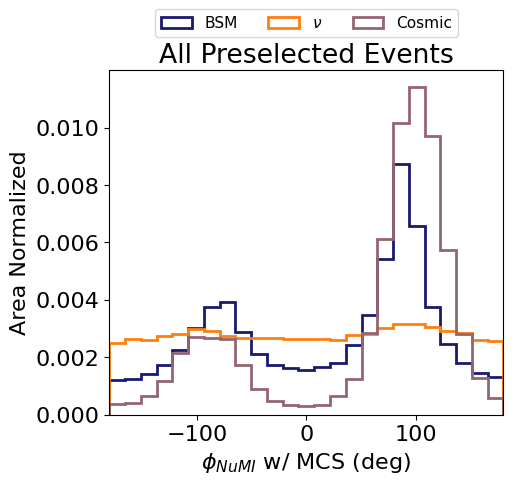

In [80]:
# PHI_NUMI
saveplots=False
makeplot(evtdf, evtdf.phi_NuMI_mcs*180./math.pi,
         (-180,180.), 
         xlabel = "$\\phi_{NuMI}$ w/ MCS (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='phi_NuMI',
         density=True,
         logy=False,
         #vline=[nom_NuMI_angle_thresh, NuMI_angle_thresh], #[79.2, 86.4], #nom_NuMI_angle_thresh
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

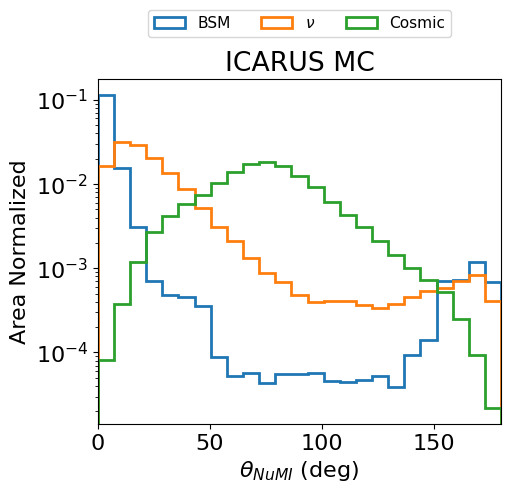

In [17]:
# THETA_NUMI - wgt by length (Use this one in analysis!)

myRange = (0,180)
makeplot(evtdf, evtdf.Snumi_angle_wgtByLen*180./math.pi,
         myRange, 
         xlabel = "$\\theta_{NuMI}$ (deg)", # Wgt by Trk Len 
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_wgtByTrkLen',
         density=True,
         logy=True,
         title='ICARUS MC', # all preselected events
         categories='int_type',
         apply_cv_weights = False
        )

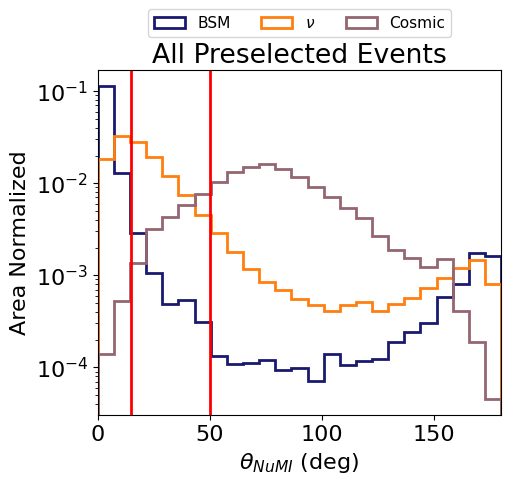

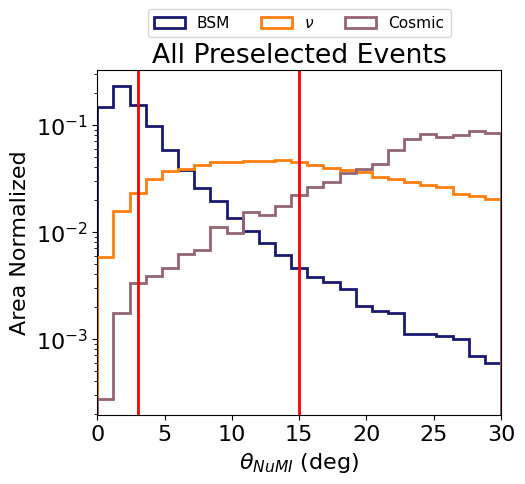

In [24]:
# THETA_NUMI

# Plot in uncontained_mus.ipynb shows that mcs track momentum determination is best thing to use to get this angle for uncontained muons.
# Here, see how that does compared to background.

makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
         (0,180.), 
         xlabel = "$\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI',
         density=True,
         logy=True,
         #vline=[nom_NuMI_angle_thresh, NuMI_angle_thresh], #[79.2, 86.4], #nom_NuMI_angle_thresh
         vline=[15, 50],
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )
makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
         (0,30.), 
         xlabel = "$\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_zoom',
         density=True,
         logy=True,
         vline=[nom_NuMI_angle_thresh, NuMI_angle_thresh], #[79.2, 86.4], #nom_NuMI_angle_thresh
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )
#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type, none
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='All Preselected Events', categories='int_type')

#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True,
#         #vline=weird_bin_boundaries,
#         title='All Preselected Events', categories='int_type')

#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=True,
#         logy=True, vline=[], title='All Preselected Events', categories='vtx')
#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='All Preselected Events', categories='vtx')#

# n-1

#full_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
#            max_shw_len_mask, ok_chi2mu, ok_chi2p,
#           numi_angle_mask, open_angle_mask, shortTrk_len_mask]
#cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
#            max_shw_len_mask, ok_chi2mu, ok_chi2p,
#            open_angle_mask, shortTrk_len_mask]

#cut_results = apply_cuts(evtdf, cut_list, detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
#mask = cut_results[-1]
#mc_res = cut_results[0]
#pot_res = cut_results[1]
#percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf[mask], hdrs)
#
#makeplot(final_df, final_df.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='Sample w/ n-1 Cuts', categories='vtx')

#makeplot(final_df, final_df.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='Sample w/ n-1 Cuts')

In [43]:
for c in evtdf.columns: print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

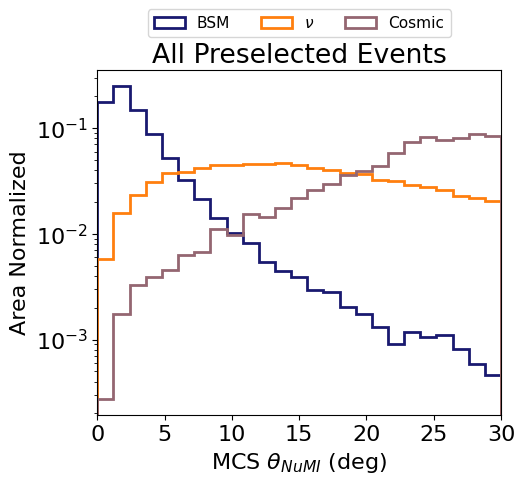

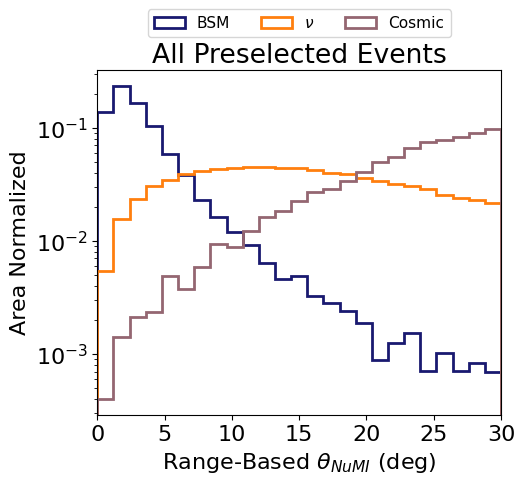

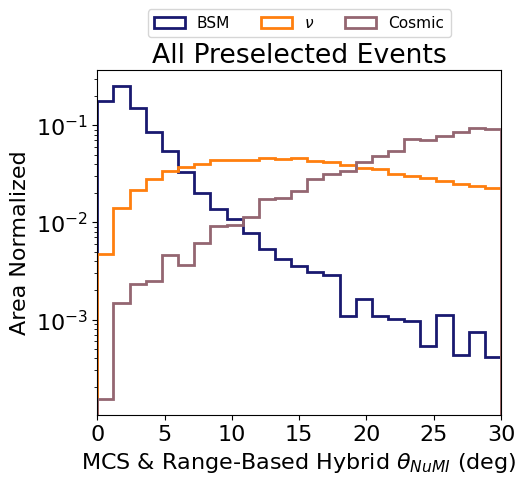

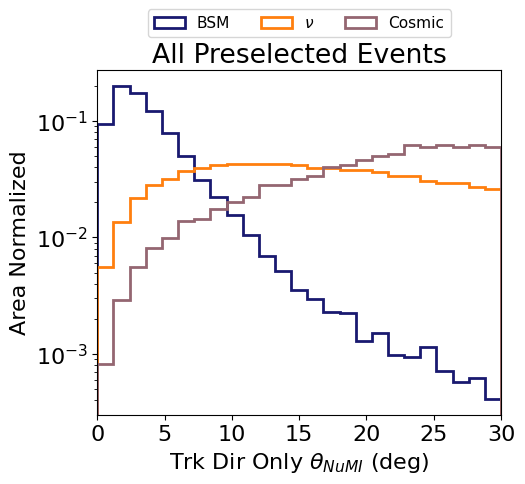

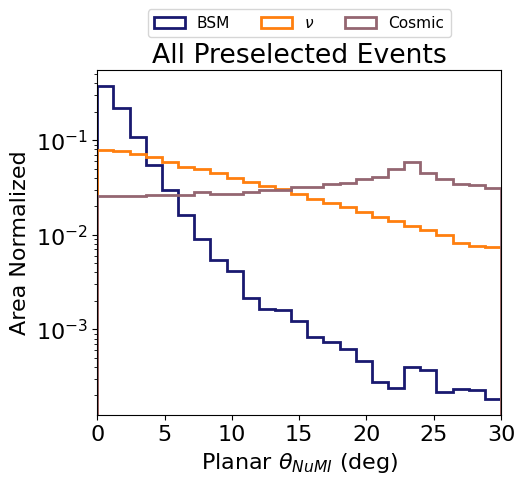

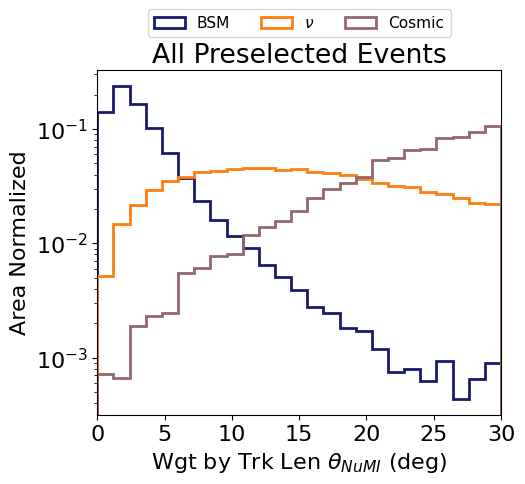

In [20]:
# theta_NuMI - COMPARE METHODS

myRange = (0,30)

makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
         myRange, 
         xlabel = "MCS $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_rangeBased*180./math.pi,
         myRange, 
         xlabel = "Range-Based $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_hybrid_rangeMCS*180./math.pi,
         myRange, 
         xlabel = "MCS & Range-Based Hybrid $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_trkDirOnly*180./math.pi,
         myRange, 
         xlabel = "Trk Dir Only $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_planar*180./math.pi,
         myRange, 
         xlabel = "Planar $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_wgtByLen*180./math.pi,
         myRange, 
         xlabel = "Wgt by Trk Len $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


BIN VALUE:  [2.41827807]
STAT ERROR:  [0.64064059]


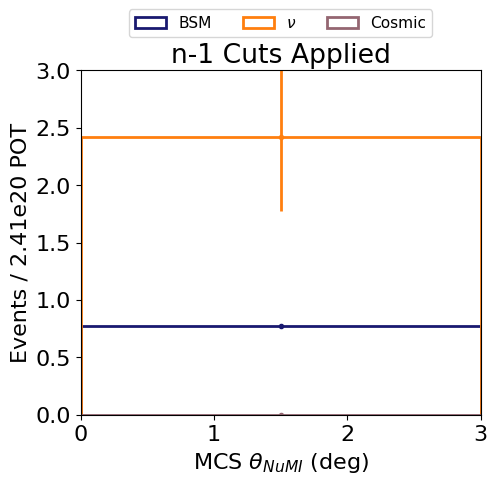

BIN VALUE:  [1.73342549]
STAT ERROR:  [0.47761547]


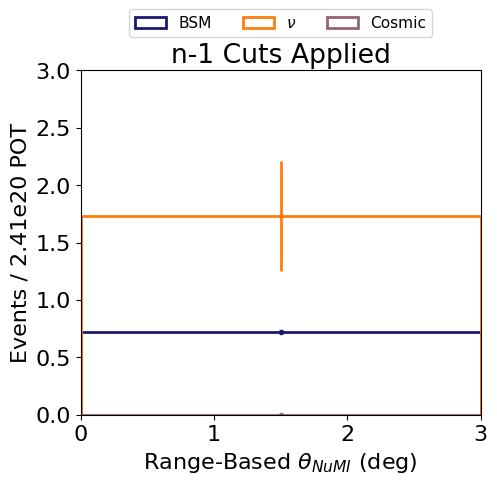

BIN VALUE:  [2.1124443]
STAT ERROR:  [0.63012564]


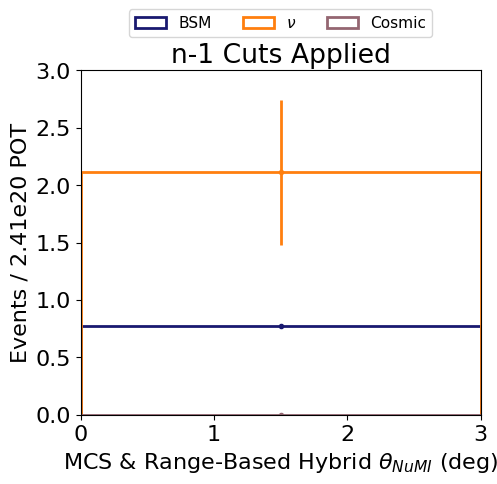

BIN VALUE:  [1.95187818]
STAT ERROR:  [0.48750472]


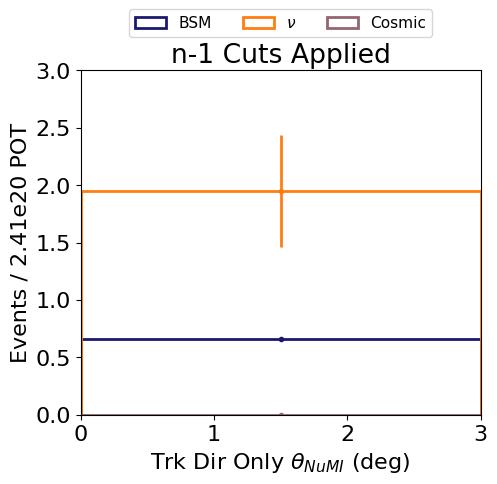

BIN VALUE:  [4.95343172]
STAT ERROR:  [0.98910532]


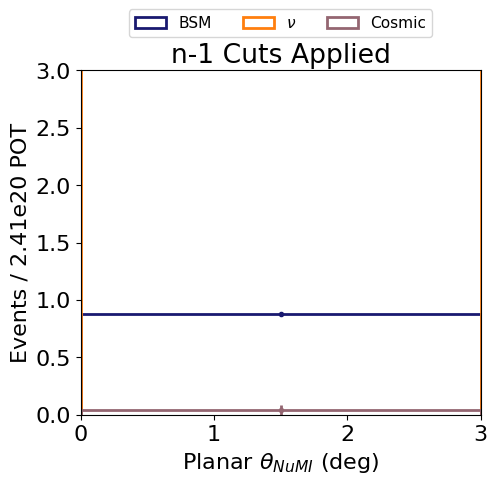

BIN VALUE:  [1.68973495]
STAT ERROR:  [0.47561295]


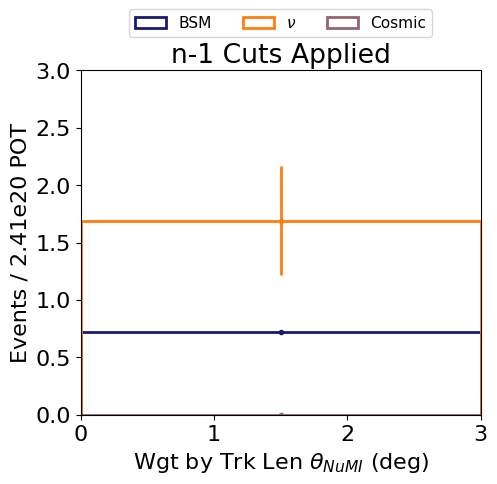

In [20]:
# theta_NuMI COMPARE METHODS: n-1 cuts applied

nminus1_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask,
            ok_chi2mu, ok_chi2p,
            open_angle_mask, 
            shortTrk_len_mask
           ]
nminus1_opt_thresholds = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    open_angle_thresh,
    trk_len_thresh
]

cut_results = apply_cuts(evtdf, nminus1_cut_list, thresholds=nminus1_opt_thresholds, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
#cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, detailed_hps=True, flip_last_cut=False)
mask = cut_results[-1]
mc_res = cut_results[0]
pot_res = cut_results[1]
percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
nminus1_df = add_hdr_info(evtdf[mask], hdrs)

myRange = (0,3)
myDensity = False
logy = False
mybins = 1 #25

makeplot(nminus1_df, nminus1_df.Snumi_angle_mcs*180./math.pi,
         myRange, 
         xlabel = "MCS $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_rangeBased*180./math.pi,
         myRange, 
         xlabel = "Range-Based $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_hybrid_rangeMCS*180./math.pi,
         myRange, 
         xlabel = "MCS & Range-Based Hybrid $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_trkDirOnly*180./math.pi,
         myRange, 
         xlabel = "Trk Dir Only $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_planar*180./math.pi,
         myRange, 
         xlabel = "Planar $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_wgtByLen*180./math.pi,
         myRange, 
         xlabel = "Wgt by Trk Len $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

In [ ]:
# TO DO:
# What's in the "other" category?
# For the vtx category plots: are we sure the trunk and track correspond to different particles? (Check the g4ID.)

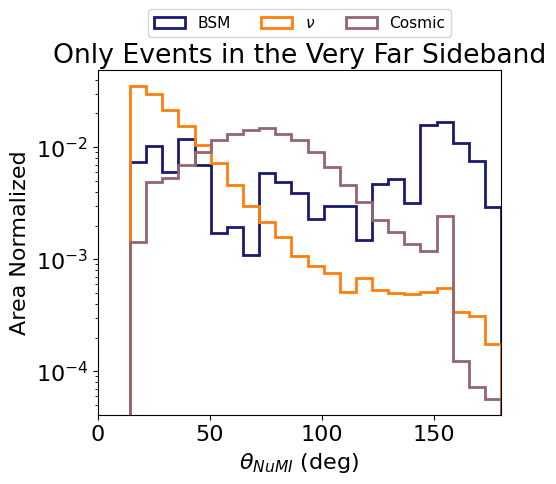

(27485, 271)
(3623, 271)


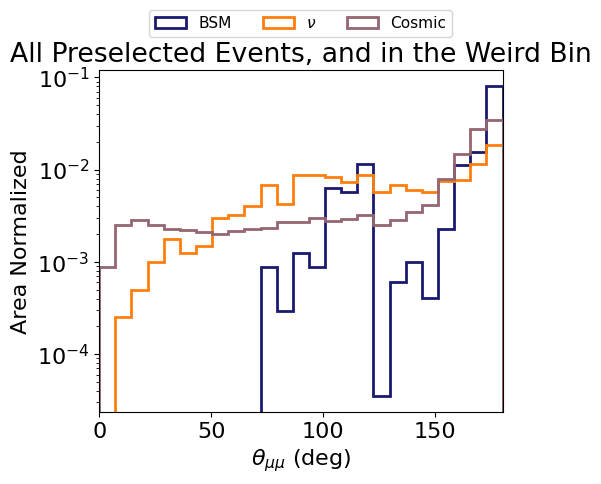

(27485, 271)
any category (i.e. everything): 
same:  19754
diff:  7731

BSM
same:  87
diff:  37

$\nu$
same:  160
diff:  394

Cosmic
same:  19420
diff:  6961



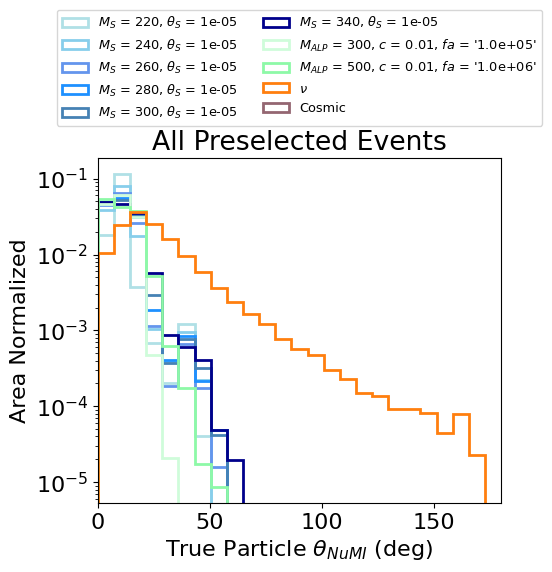

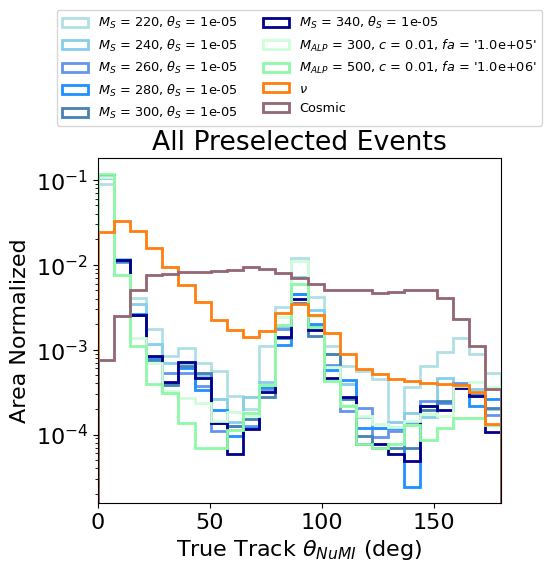

In [97]:
# AN ANNOYING BUT NECESSARY TANGENT:
# WHAT IS WITH THAT BUMP IN THE SIGNAL AT ~85 DEGREES? DOES IT MATCH WHAT I SEE IN FAR SIDEBAND DATA?

# REPLOT FOR ONLY FAR SIDEBAND:

# Define Very Far Sideband

fsb_NuMI_angle_thresh = 15 # deg # Very Far Sideband I presented in 2023: > 0.15 rad # Use for selection: < 0.05 rad
fsb_open_angle_thresh = [70,115]# Use for selection: < 0.35 rad 
def sb_numi_angle_mask(df, thresh = fsb_NuMI_angle_thresh): # do calculation in radians. User uses degrees.
    return df.Snumi_angle_mcs > thresh*math.pi/180., 'S_NuMI_angle > '+str(thresh)+' deg'#'\u00B0'
def sb_open_angle_mask(df, thresh = fsb_open_angle_thresh):
    return ( ( (np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) > thresh[0]*math.pi/180.) & 
            (np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) < thresh[1]*math.pi/180.) ), 
            str(thresh[0])+' deg < opening angle < '+str(thresh[1])+' deg')
sideband_mask = sb_numi_angle_mask(evtdf)[0] & sb_open_angle_mask(evtdf)[0]
fsb_evtdf = evtdf[sideband_mask]

# Make the plot

makeplot(fsb_evtdf, fsb_evtdf.Snumi_angle_mcs*180./math.pi,
         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname',
         density=True,
         categories='int_type',
         logy=True, vline=[], title='Only Events in the Very Far Sideband',
         apply_cv_weights = False
        )

# Well that's weird: the bump in weird bin disappeared. (It's weird that we see it in data in far sideband though... hmmmmmm)
# So anyway, what are the opening angles of those events?

weird_bin_boundaries = [79.19999695, 86.40000153]
def in_weird_bin_mask(df, bin_boundaries = weird_bin_boundaries):
    return ((df.Snumi_angle_mcs*180/math.pi > bin_boundaries[0]) & (df.Snumi_angle_mcs*180/math.pi < bin_boundaries[1]))
print(evtdf[in_weird_bin_mask(evtdf)].shape)
print(fsb_evtdf[in_weird_bin_mask(fsb_evtdf)].shape)
makeplot(#fsb_evtdf[in_weird_bin_mask(fsb_evtdf)], 
         #np.arccos(dotdf(fsb_evtdf[in_weird_bin_mask(fsb_evtdf)].trunk.trk.dir, fsb_evtdf[in_weird_bin_mask(fsb_evtdf)].branch.trk.dir))*180./math.pi,
         evtdf[in_weird_bin_mask(evtdf)], 
         np.arccos(dotdf(evtdf[in_weird_bin_mask(evtdf)].trunk.trk.dir, evtdf[in_weird_bin_mask(evtdf)].branch.trk.dir))*180./math.pi,
         (0,180.), xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', 
         density=True,
         logy=True, vline=[],
         #title='Only Events in the Very Far Sideband, \n and in the Weird Bin',
         title='All Preselected Events, and in the Weird Bin',
         categories='int_type',
         apply_cv_weights = False
        )

## DO TRACKS OF EVENTS IN THE WEIRD BIN HAVE UNIQUE G4ID VALUES, OR ARE THEY ACTUALLY WRONGLY TWO TRACKS FOR THE SAME PARTICLE?
## ANSWER: THEY USUALLY HAVE THE SAME G4IDs!!!
weirdBin_df = evtdf[in_weird_bin_mask(evtdf)]
print(weirdBin_df.shape)
same = 0
diff = 0
for i in range(weirdBin_df.shape[0]):
    if int(weirdBin_df.iloc[i].trunk.trk.truth.p.G4ID) == int(weirdBin_df.iloc[i].branch.trk.truth.p.G4ID):
        same = same + 1
    else:
        diff = diff + 1
print('any category (i.e. everything): ')
print('same: ', same)
print('diff: ', diff)
print('')


for c in make_categories(weirdBin_df):
    print(c.name)
    df = weirdBin_df[c]
    same = 0
    diff = 0
    for i in range(df.shape[0]):
        if int(df.iloc[i].trunk.trk.truth.p.G4ID) == int(df.iloc[i].branch.trk.truth.p.G4ID):
            same = same + 1
        else:
            diff = diff + 1
    print('same: ', same)
    print('diff: ', diff)
    print('')

# PLOT TRUE THETA_NUMI

makeplot(evtdf, evtdf.Snumi_angle_trueParticle*180./math.pi,
         (0,180.), xlabel = "True Particle $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=True, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', 
         density=True,
         logy=True, vline=[], title='All Preselected Events', categories='int_type',
         apply_cv_weights = False)

makeplot(evtdf, evtdf.Snumi_angle_trueTrk*180./math.pi,
         (0,180.), xlabel = "True Track $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=True, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', 
         density=True,
         logy=True, vline=[], title='All Preselected Events', categories='int_type',
         apply_cv_weights = False)


In [99]:
# BSM:
print(87./(87+37))

# nu:
print(160./(160+394))

# cosmic:
print(19420./(19420+6961))

0.7016129032258065
0.2888086642599278
0.7361358553504416


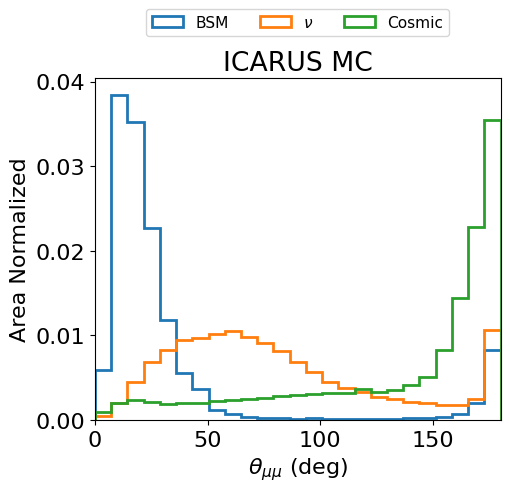

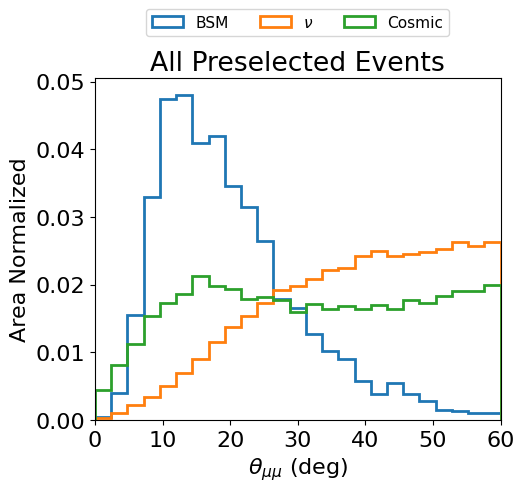

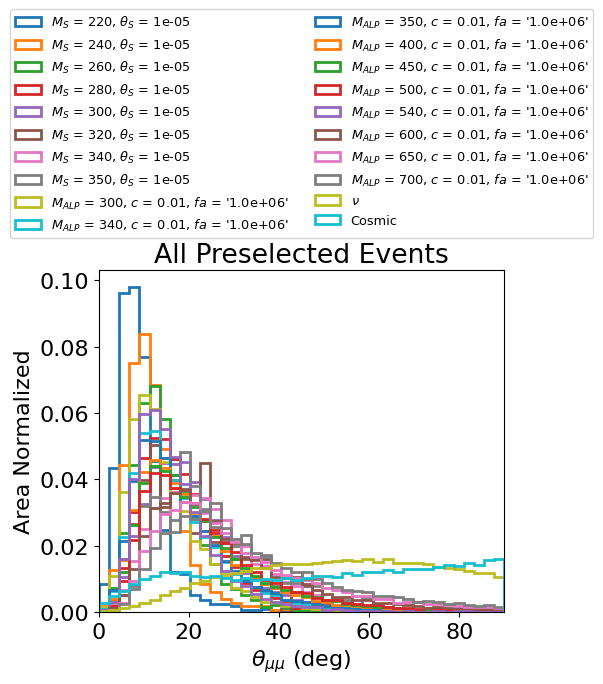

In [25]:
# OPENING ANGLE
saveplots = True

#print(nom_open_angle_thresh)

makeplot(evtdf,
         np.arccos(dotdf(evtdf.trunk.trk.dir, evtdf.branch.trk.dir))*180./math.pi,
         (0,180.),
         xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='openangle', density=True,
         logy=False, 
         #vline=[70,115],
         #vline=[nom_open_angle_thresh, open_angle_thresh], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights = False
        )

makeplot(evtdf,
         np.arccos(dotdf(evtdf.trunk.trk.dir, evtdf.branch.trk.dir))*180./math.pi,
         (0,60.),
         xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         #plotname='openangle', 
         density=True,
         logy=False, 
         #vline=[70,115],
         #vline=[nom_open_angle_thresh, open_angle_thresh], 
         title='All Preselected Events',
         apply_cv_weights = False
        )

makeplot(evtdf,
         np.arccos(dotdf(evtdf.trunk.trk.dir, evtdf.branch.trk.dir))*180./math.pi,
         (0,90.),
         xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 40,
         detailed_bsm=True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         #plotname='openangle_detailed_bsm', 
         density=True,
         logy=False, 
         #vline=[nom_open_angle_thresh, open_angle_thresh], 
         title='All Preselected Events',
         apply_cv_weights = False
        )

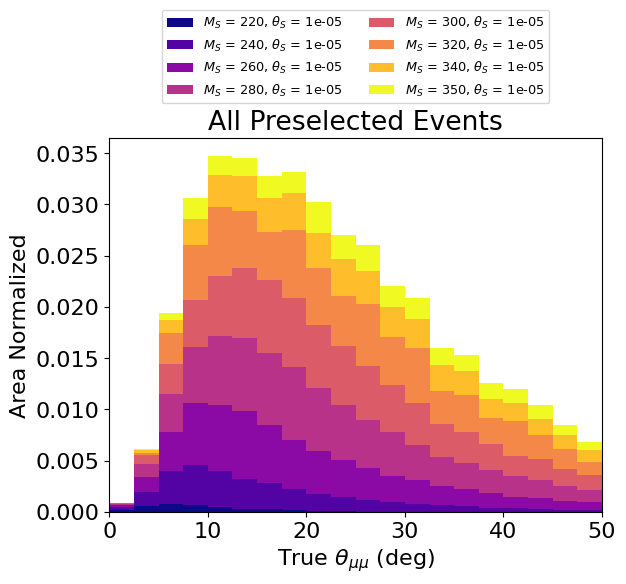

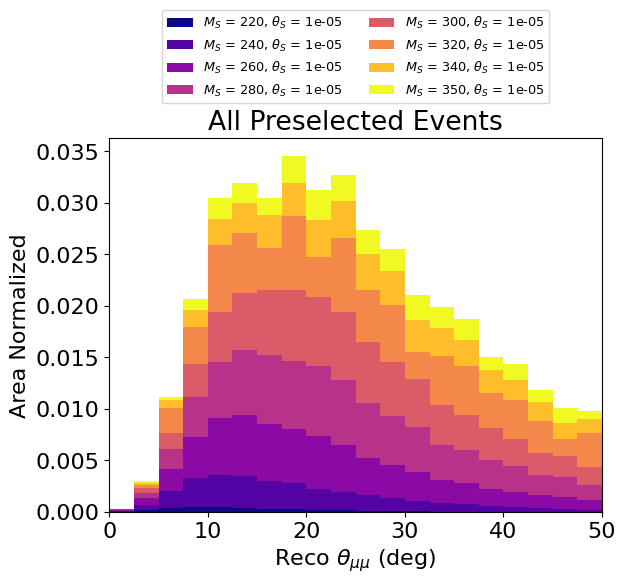

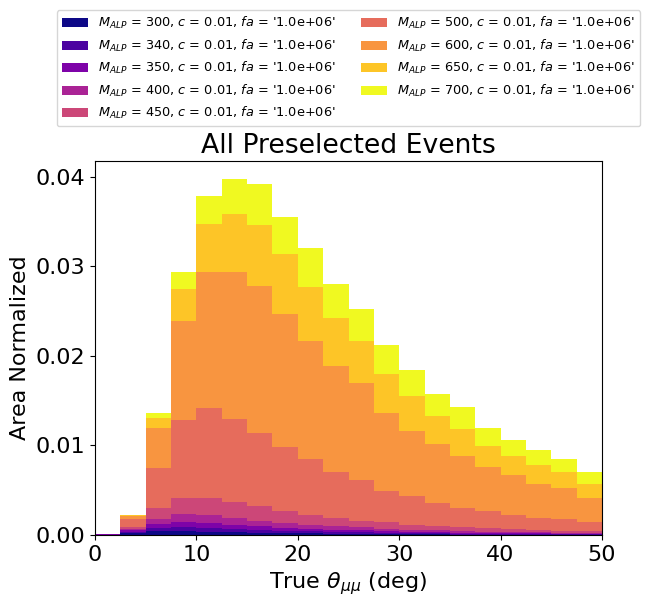

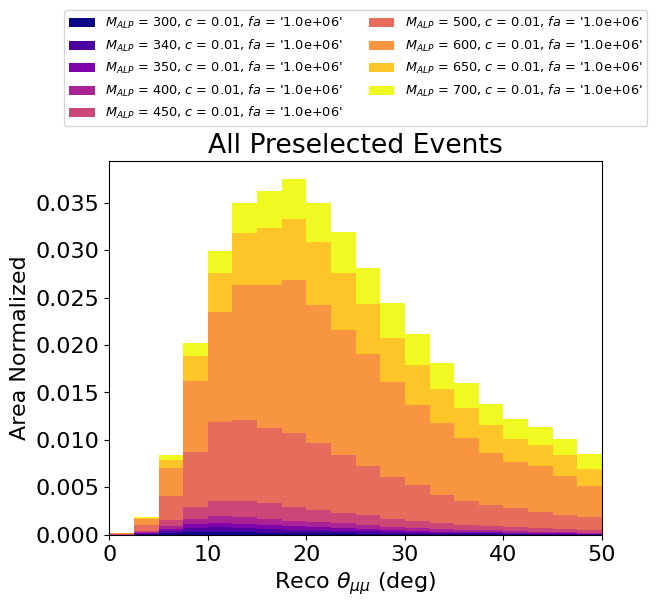

In [62]:
# Rework opening angle plot to see model dependence.
# Here, plot TRUE opening angle!

cmap = plt.get_cmap('plasma') # Choose a colormap
categories = make_categories(evtdf, detailed_bsm = True)
myrange = (0,50.)
mybins = 20
mydensity = True

# HPS 

hps_xs = np.linspace(0,1,len(higgs_masses))
hps_colors = [cmap(x) for x in hps_xs]  # Get specific colors from the colormap
hps_hex_colors = [mcolors.to_hex(color) for color in hps_colors] # Convert the colors to hexes
hps_cats = categories[:8]

## step hist - true
#fig = plt.figure()
#ax = plt.subplot(111)
#scale = evtdf.scale.copy()
#for i, c in enumerate(hps_cats):
#    hist = plt.hist(evtdf[c].true_opening_angle*180./math.pi, weights=evtdf[c].scale, 
#                    bins=mybins, label=c.name, color=hps_hex_colors[i], 
#                    histtype="step", linewidth=2, range=myrange, density=mydensity) #histtype="step"
#plt.ylabel("Area Normalized")
##plt.yscale('log')
#plt.title('All Preselected Events')
#plt.tight_layout()
#plt.xlim(myrange)
#plt.xlabel("True $\\theta_{\mu\mu}$ (deg)")
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
#plt.show()  

# stacked hist - true
fig = plt.figure()
ax = plt.subplot(111)
hist = plt.hist([evtdf[c].true_opening_angle*180./math.pi for c in hps_cats], 
                weights=[evtdf[c].scale for c in hps_cats], 
                bins=mybins, 
                label=[c.name for c in hps_cats], 
                color=hps_hex_colors, 
                stacked=True,
                linewidth=2, range=myrange, density=mydensity) #histtype="step"
plt.ylabel("Area Normalized")
#plt.yscale('log')
plt.title('All Preselected Events')
plt.tight_layout()
plt.xlim(myrange)
plt.xlabel("True $\\theta_{\mu\mu}$ (deg)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
plt.show()  

# stacked hist - reco
fig = plt.figure()
ax = plt.subplot(111)
hist = plt.hist([evtdf[c].opening_angle*180./math.pi for c in hps_cats], 
                weights=[evtdf[c].scale for c in hps_cats], 
                bins=mybins, 
                label=[c.name for c in hps_cats], 
                color=hex_colors, 
                stacked=True,
                linewidth=2, range=myrange, density=mydensity) #histtype="step"
plt.ylabel("Area Normalized")
#plt.yscale('log')
plt.title('All Preselected Events')
plt.tight_layout()
plt.xlim(myrange)
plt.xlabel("Reco $\\theta_{\mu\mu}$ (deg)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
plt.show()  

# ALP

#alp_cats = categories[8:-2]
alp_cats = [categories[8],categories[9],categories[10],categories[11],categories[12],categories[13],
            categories[15],categories[16],categories[17]] # don't show the 540 MeV sample - it's screwing things up.
alp_xs = np.linspace(0,1,len(alp_cats))
alp_colors = [cmap(x) for x in alp_xs]  # Get specific colors from the colormap
alp_hex_colors = [mcolors.to_hex(color) for color in alp_colors] # Convert the colors to hexes


## step hist - true
#myrange = (0,50.)
#mybins = 20
#mydensity = True
#fig = plt.figure()
#ax = plt.subplot(111)
#scale = evtdf.scale.copy()
#for i, c in enumerate(alp_cats):
#    hist = plt.hist(evtdf[c].true_opening_angle*180./math.pi, weights=evtdf[c].scale, #/sum(evtdf[c].scale), 
#                    bins=mybins, label=c.name, color=alp_hex_colors[i], 
#                    histtype="step", linewidth=2, range=myrange, density=mydensity) #histtype="step"
#plt.ylabel("Area Normalized")
##plt.yscale('log')
#plt.title('All Preselected Events')
#plt.tight_layout()
#plt.xlim(myrange)
#plt.xlabel("True $\\theta_{\mu\mu}$ (deg)")
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
#plt.show()  

# stacked hist - true
fig = plt.figure()
ax = plt.subplot(111)
hist = plt.hist([evtdf[c].true_opening_angle*180./math.pi for c in alp_cats], 
                weights=[evtdf[c].scale for c in alp_cats], 
                bins=mybins, 
                label=[c.name for c in alp_cats], 
                color=alp_hex_colors, 
                stacked=True,
                linewidth=2, range=myrange, 
                density=[mydensity]*len(alp_nosup_masses)) #histtype="step"
plt.ylabel("Area Normalized")
#plt.yscale('log')
plt.title('All Preselected Events')
plt.tight_layout()
plt.xlim(myrange)
plt.xlabel("True $\\theta_{\mu\mu}$ (deg)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
plt.show()

# stacked hist - reco
fig = plt.figure()
ax = plt.subplot(111)
hist = plt.hist([evtdf[c].opening_angle*180./math.pi for c in alp_cats], 
                weights=[evtdf[c].scale for c in alp_cats], 
                bins=mybins, 
                label=[c.name for c in alp_cats], 
                color=alp_hex_colors, 
                stacked=True,
                linewidth=2, range=myrange, 
                density=[mydensity]*len(alp_nosup_masses)) #histtype="step"
plt.ylabel("Area Normalized")
#plt.yscale('log')
plt.title('All Preselected Events')
plt.tight_layout()
plt.xlim(myrange)
plt.xlabel("Reco $\\theta_{\mu\mu}$ (deg)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
plt.show()


/tmp/ipykernel_2885646/4100983852.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var)] = -10


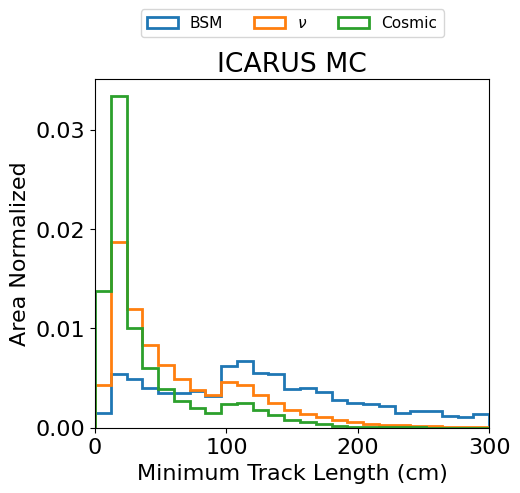

In [26]:
# TRACK LENGTH

makeplot(evtdf,
         evtdf.shorter_track_length,
         (0,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='shorter_trklen', density=True,
         logy=False, 
         vline=[], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights = False
        )

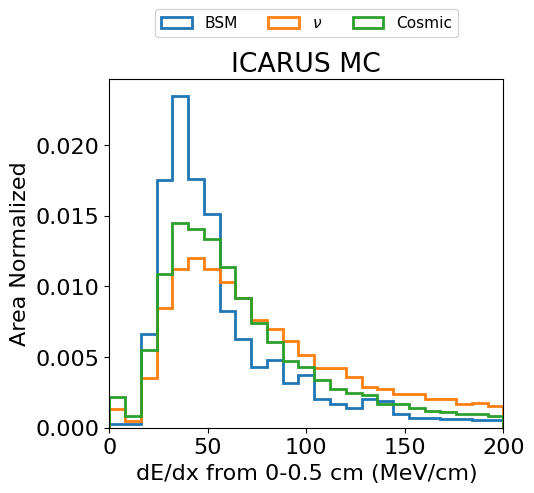

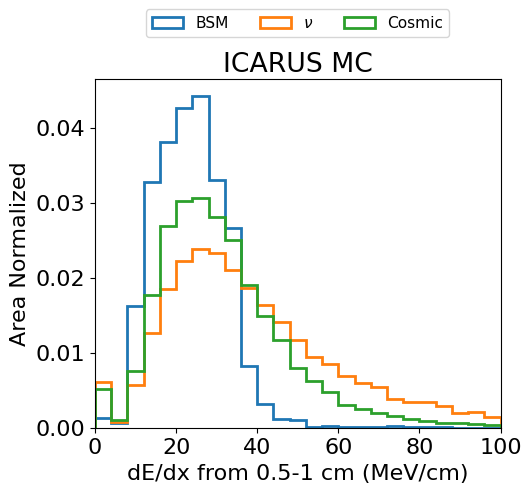

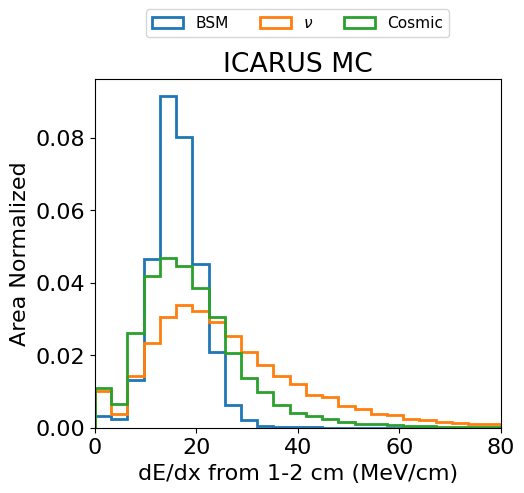

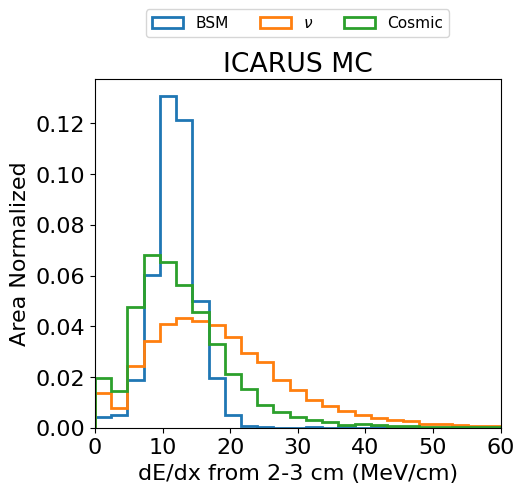

In [28]:
# dE/dx
detailed_bsm=False
detailed_nu='none'
hps_final_state=False
density=True,
logy=False
bins=25
title='ICARUS MC' #'All Preselected Events'

#print(nom_stub_dedx_l0_5cm_thresh)
#print(nom_stub_dedx_l1cm_thresh)
#print(nom_stub_dedx_l2cm_thresh)
#print(nom_stub_dedx_l3cm_thresh)

makeplot(evtdf,
         evtdf.stub.l0_5cm.dedx,
         (0,200),
         xlabel = 'dE/dx from 0-0.5 cm (MeV/cm)',
         plotname='dEdx_0to0o5',
         #vline=[nom_stub_dedx_l0_5cm_thresh, stub_dedx_l0_5cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )
makeplot(evtdf,
         evtdf.stub.l1cm.dedx,
         (0,100),
         xlabel = 'dE/dx from 0.5-1 cm (MeV/cm)',
         plotname='dEdx_0o5to1', 
         #vline=[nom_stub_dedx_l1cm_thresh, stub_dedx_l1cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )

makeplot(evtdf,
         evtdf.stub.l2cm.dedx,
         (0,80),
         xlabel = 'dE/dx from 1-2 cm (MeV/cm)',
         plotname='dEdx_1to2',
         #vline=[nom_stub_dedx_l2cm_thresh, stub_dedx_l2cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )
makeplot(evtdf,
         evtdf.stub.l3cm.dedx,
         (0,60),
         xlabel = 'dE/dx from 2-3 cm (MeV/cm)',
         plotname='dEdx_2to3',
         #vline=[nom_stub_dedx_l3cm_thresh, stub_dedx_l3cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )

/tmp/ipykernel_2885646/4100983852.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var)] = -10


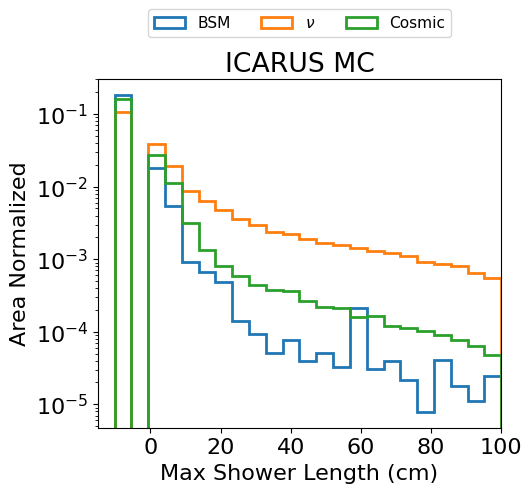

In [30]:
# MAX SHOWER LENGTH

#print(nom_max_shw_len_thresh)

makeplot(evtdf,
         evtdf.max_shw_len,
         (-15,100),
         xlabel = "Max Shower Length (cm)",
         bins = 24,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='maxShwLen', density=True,
         logy=True, 
         #vline=[nom_max_shw_len_thresh, max_shw_len_thresh], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights=False
        )

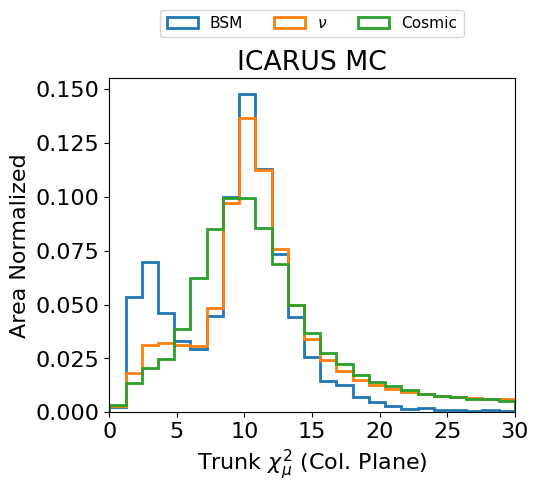

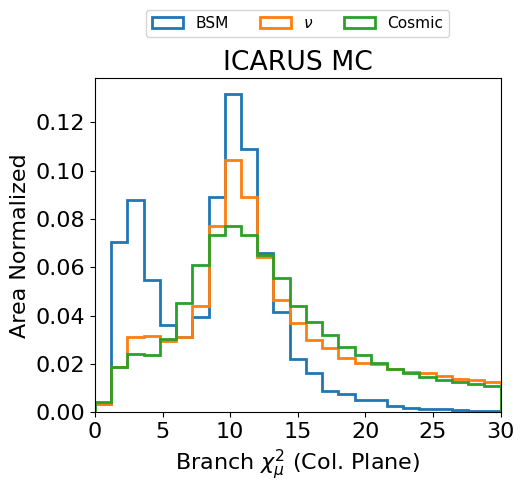

In [33]:
# PID CHI2 MU

#print(nom_chi2_mu_forMuons)
myrange = (0,30)

makeplot(evtdf,
         evtdf.trunk.trk.chi2pid.I2.chi2_muon,
         myrange,
         xlabel = "Trunk $\\chi^2_\\mu$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_mu_trunk', density=True,
         logy=False, 
         #vline=[nom_chi2_mu_forMuons, chi2_mu_forMuons], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights=False
        )
makeplot(evtdf,
         evtdf.branch.trk.chi2pid.I2.chi2_muon,
         myrange,
         xlabel = "Branch $\\chi^2_\\mu$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_mu_branch', density=True,
         logy=False, 
         #vline=[nom_chi2_mu_forMuons, chi2_mu_forMuons], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights=False
        )

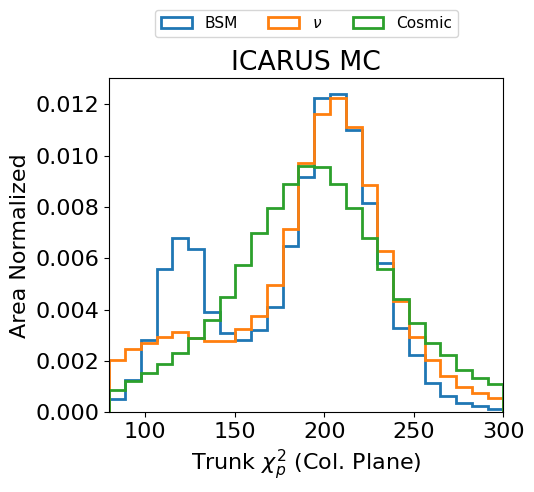

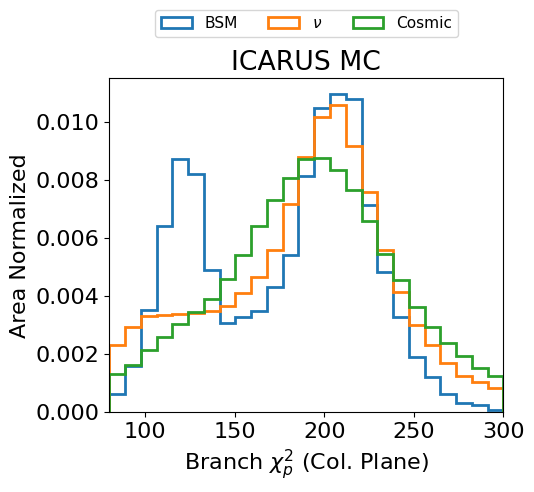

In [36]:
# PID CHI2 p

#print(nom_chi2_p_forMuons)
myrange=(80,300)

makeplot(evtdf,
         evtdf.trunk.trk.chi2pid.I2.chi2_proton,
         myrange,
         xlabel = "Trunk $\\chi^2_p$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_p_trunk', density=True,
         logy=False, 
         #vline=[nom_chi2_p_forMuons, chi2_p_forMuons], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights=False
        )
makeplot(evtdf,
         evtdf.branch.trk.chi2pid.I2.chi2_proton,
         myrange,
         xlabel = "Branch $\\chi^2_p$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_p_branch', density=True,
         logy=False, 
         #vline=[nom_chi2_p_forMuons, chi2_p_forMuons], 
         title='ICARUS MC', #'All Preselected Events',
         apply_cv_weights=False
        )

### chi2pid (goes into 'ismuon' check)

KEEP THIS ONE! 
Useful because...
- combines trunk and branch into just "tracks"
- plots muons and proton scores side by side.

In [82]:
def plot_chi2(df, vline_mu = None, vline_p = None, bsm=False, detailed_nu=False,
                  density=True, POTSTR=POTSTR, sample_description=""):
    if bsm == True:
        categories = make_categories(df, bsm=True)
    elif detailed_nu == True:
        categories = make_categories(df, detailed_nu=True)
    else:
        categories = make_categories(df)
        
    plt.figure(figsize=(10.9,3))
    scale = df.scale.copy()
    
    # Muon Scores
    
    bins=np.linspace(0, 100, 31)
    plt.subplot(1,2,1)
    my_vars = [df.trunk.trk.chi2pid.I2.chi2_muon, df.branch.trk.chi2pid.I2.chi2_muon]
    for c in categories:
        _ = plt.hist(np.concatenate((my_vars[0][c], my_vars[1][c])),
                     weights=np.concatenate((scale[c],scale[c])), 
                     bins=bins, label=c.name, color=c.color,
                     histtype="step", linewidth=2, density=True)
    #plt.legend(loc='upper right')
    plt.xlim((0,100))
    plt.xlabel(" $\\chi^2$ Muon (Col. Plane)")
    if density:
        plt.ylabel("Area Normalized")
    else:
        plt.ylabel("Candidates / %s" % POTSTR)
    plt.yscale("log")
    if vline_mu is not None:
        plt.axvline([vline_mu], linestyle=":", color="r", linewidth=2)
    #plt.title("ICARUS MC"+sample_description)
    
    # Proton Scores
    
    bins=np.linspace(0, 400, 31)
    plt.subplot(1,2,2)
    
    my_vars = [df.trunk.trk.chi2pid.I2.chi2_proton, df.branch.trk.chi2pid.I2.chi2_proton]
    for c in categories:
        _ = plt.hist(np.concatenate((my_vars[0][c], my_vars[1][c])), 
                     weights=np.concatenate((scale[c],scale[c])), 
                     bins=bins, label=c.name, color=c.color,
                     histtype="step", linewidth=2, density=True)
    #plt.legend()
    plt.xlim((0,400))
    plt.xlabel(" $\\chi^2$ Proton (Col. Plane)")
    #if density:
    #    plt.ylabel("Area Normalized")
    #else:
    #    plt.ylabel("Candidates / %s" % POTSTR)
    plt.yscale("log")
    if vline_p is not None:
        plt.axvline([vline_p], linestyle=":", color="r", linewidth=2)
    #plt.title("ICARUS MC"+sample_description)
    
    # General
    plt.show()
plot_chi2(evtdf, vline_mu = chi2_mu_forMuons, vline_p = chi2_p_forMuons, bsm=True, detailed_nu=False)  

TypeError: make_categories() got an unexpected keyword argument 'bsm'

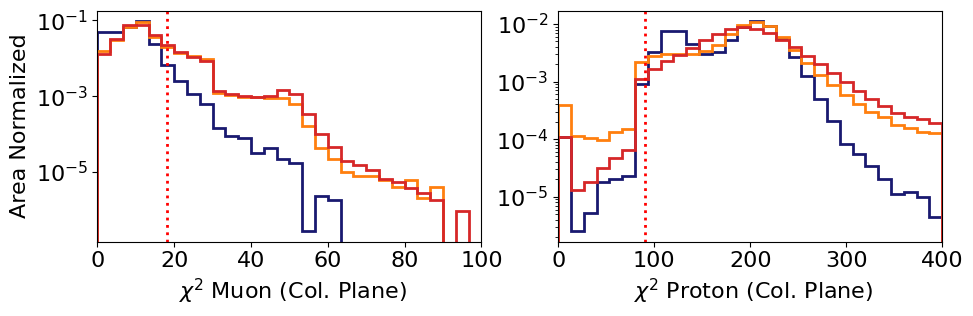

In [41]:
plot_chi2(evtdf, vline_mu = chi2_mu_forMuons, vline_p = chi2_p_forMuons, bsm=True, detailed_nu=False)

In [32]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

140.0
10.0000581741333, 790.8091430664062


/tmp/ipykernel_26742/2899542911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


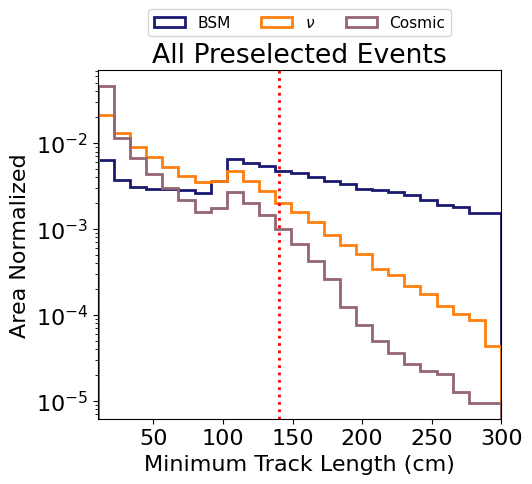

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_26742/2899542911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


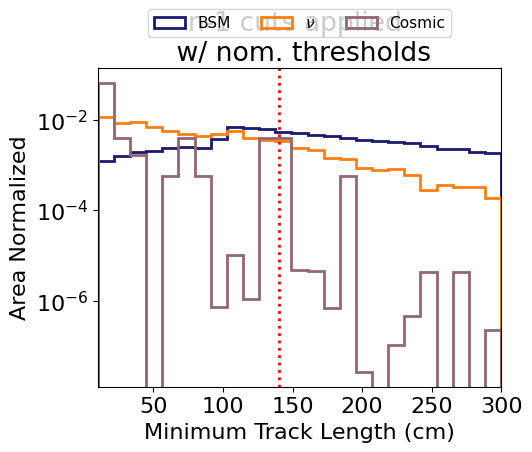

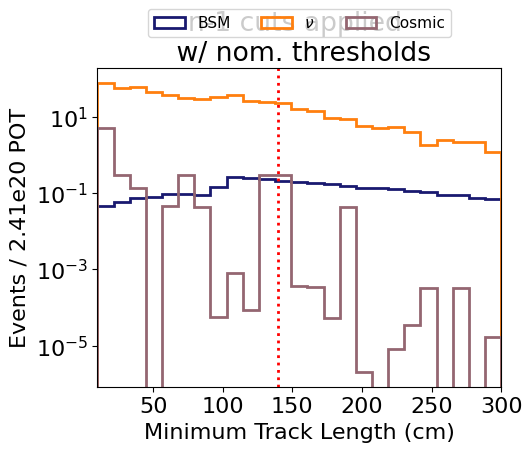

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_26742/2899542911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


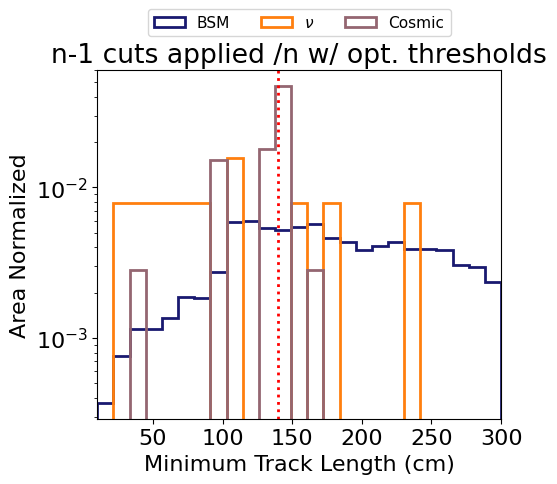

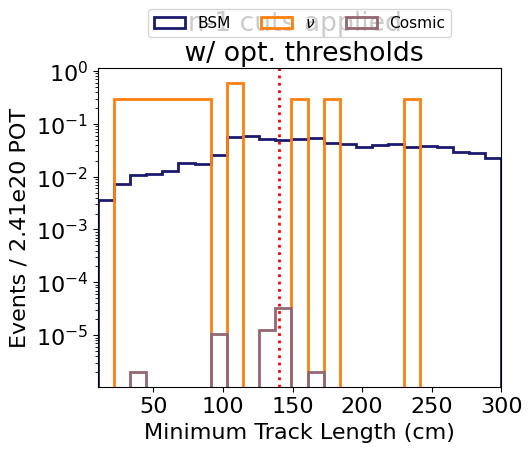

In [40]:
# Track Length Cut

print(nom_trk_len_thresh)
print(min(evtdf.shorter_track_length), max(evtdf.shorter_track_length), sep=', ')

# all preselected events

makeplot(evtdf,
         evtdf.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=True,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='All Preselected Events',
         apply_cv_weights = False)

# n-1 cuts 

cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
nom_thresholds_noTrkLenCut = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]

opt_thresholds_noTrkLenCut = [
    50., 35., 15., 10.,
    0.,
    13., 90.,
    3., 15.
]

# ... with nominal cut thresholds

cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, thresholds=nom_thresholds_noTrkLenCut, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
nom_mask = cut_results[-1]
nom_mc_res = cut_results[0]
nom_pot_res = cut_results[1]
nom_percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
nom_final_df = add_hdr_info(evtdf[nom_mask], hdrs)

makeplot(nom_final_df,
         nom_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=True,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied \n w/ nom. thresholds',
         apply_cv_weights = False)

makeplot(nom_final_df,
         nom_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=False,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied \n w/ nom. thresholds',
         apply_cv_weights = False)

# ... with optimized cut thresholds

cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, thresholds=opt_thresholds_noTrkLenCut, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
opt_mask = cut_results[-1]
opt_mc_res = cut_results[0]
opt_pot_res = cut_results[1]
opt_percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
opt_final_df = add_hdr_info(evtdf[opt_mask], hdrs)

makeplot(opt_final_df,
         opt_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=True,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied /n w/ opt. thresholds',
         apply_cv_weights = False)

makeplot(opt_final_df,
         opt_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=False,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied \n w/ opt. thresholds',
         apply_cv_weights = False)

/tmp/ipykernel_11892/1055879343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


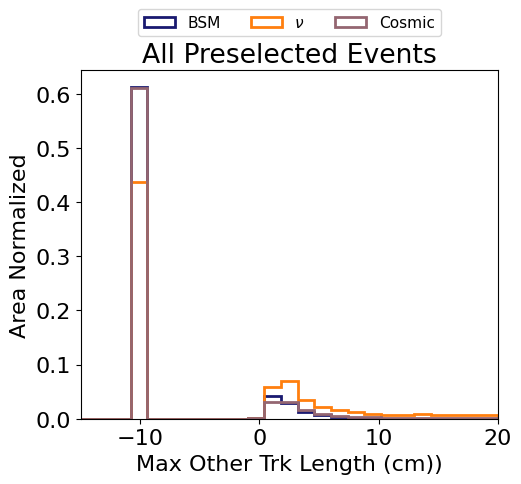

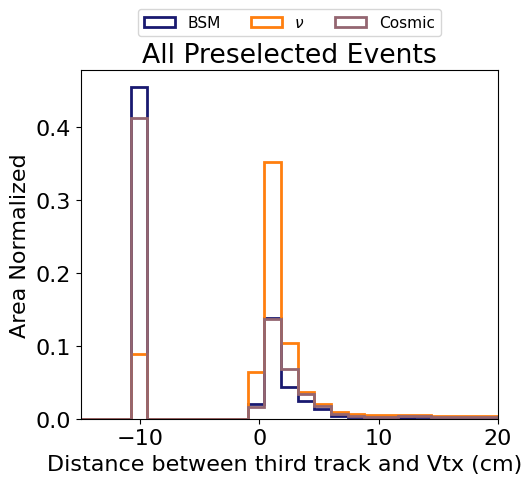

In [86]:
# OTHER TRACK LENGTH & DIST TO VTX

makeplot(evtdf,
         evtdf.max_othr_trk_len,
         (-15,20),
         xlabel = "Max Other Trk Length (cm))",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', density=True,
         logy=False, vline=[], title='All Preselected Events')

makeplot(evtdf,
         evtdf.third_trk_dist,
         (-15,20),
         xlabel = "Distance between third track and Vtx (cm))",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', density=True,
         logy=False, vline=[], title='All Preselected Events')

### W.I.P.
### Momentum asymmetry

In [81]:
def plot_mom_asymmetry(df):
    var = np.abs((recop(df.trunk.trk) - recop(df.branch.trk)) / (recop(df.trunk.trk) + recop(df.branch.trk)))
    #when = SlcInFV(evtdf.slc.vertex) & muselect
    bins = np.linspace(0, 1, 21)
    for c in categories:
        _ = plt.hist(var[when & c], weights=scale[when & c], bins=bins, label=c.name, 
                     histtype="step", linewidth=2, density=True)
    plt.legend(loc="lower left")
    # plt.axvline([0.3], linestyle=":", color="r", linewidth=2)

    plt.tight_layout()
    plt.xlabel("Momentum Assymetry")
    plt.title("ICARUS MC")
    plt.ylabel("Area Normalized")

    plt.text(0.4, 0.05, label, transform=plt.gca().transAxes, fontsize=18)

    plt.tight_layout()
    if dosave: plt.savefig(savedir + "momentum_balance_M%i.pdf" % HMASS)
    plt.show()

In [83]:
plot_mom_asymmetry(evtdf)#, sample_description="\n all that pass preselection")#, vline=max_shw_len_thresh)

NameError: name 'recop' is not defined

In [102]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'npi', '', '', '')
('slc', 't

In [18]:
print(final_df.shape)
#final_df



(20259, 284)


## Extract info needed for event display

In [23]:
labels = higgs_labels + alp_nosup_labels + nu_labels
for l, label in enumerate(labels): 
    print(l, ": ", label)

# samples I have access to:

4
5
7
8
10
11
12
13
14
15
16
17
21
22
23
24


0 :  $M_S$ = 220, $\theta_S$ = 1e-05
1 :  $M_S$ = 240, $\theta_S$ = 1e-05
2 :  $M_S$ = 260, $\theta_S$ = 1e-05
3 :  $M_S$ = 280, $\theta_S$ = 1e-05
4 :  $M_S$ = 300, $\theta_S$ = 1e-05
5 :  $M_S$ = 320, $\theta_S$ = 1e-05
6 :  $M_S$ = 340, $\theta_S$ = 1e-05
7 :  $M_S$ = 350, $\theta_S$ = 1e-05
8 :  $M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
9 :  $M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06'
10 :  $M_{ALP}$ = 350, $c$ = 0.01, $fa$ = '1.0e+06'
11 :  $M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06'
12 :  $M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06'
13 :  $M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
14 :  $M_{ALP}$ = 540, $c$ = 0.01, $fa$ = '1.0e+06'
15 :  $M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06'
16 :  $M_{ALP}$ = 650, $c$ = 0.01, $fa$ = '1.0e+06'
17 :  $M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06'
18 :  $\nu$
19 :  Coh-like $\nu$
20 :  Coh-like $\nu$ (ad'l 2501)
21 :  Coh-like $\nu$ (ad'l 2502_12)
22 :  Coh-like $\nu$ (ad'l 2502_34)
23 :  Coh-like $\nu$ (ad'l 2502_5)
24 :  Coh-lik

24

In [6]:
# FIND SELECTED BG EVENTS

c = -2
c=1

print(final_df.shape)

cats = make_categories(final_df, detailed_nu='int_type')

for cat in range(len(cats)-1):
    c = cat+1
    mydf = final_df[cats[c]]
    print('')
    print(cats[c].name, mydf.shape, sep=': ')
    pair=0
    for idx in mydf.index:
        if [int(mydf.loc[idx]['cluster']), int(mydf.loc[idx]['proc'])] == pair: continue
        else:
            address = [int(mydf.loc[idx]['cluster']), int(mydf.loc[idx]['proc']), idx[2]]
            print(idx, ': ', address)
        
        
        

(20284, 284)

$\nu$ NC: (0, 284)

$\nu_\mu$ CC QE+MEC: (0, 284)

$\nu_\mu$ CC RES: (4, 284)
(19, 5261, 15, 0) :  [74230765, 5539, 15]
(20, 1626, 13, 17) :  [73445101, 2578, 13]
(21, 1574, 7, 0) :  [74452188, 2624, 7]
(23, 913, 44, 0) :  [74452188, 5932, 44]

$\nu_\mu$ CC DIS: (6, 284)
(18, 1611, 212, 0) :  [6200373, 1621, 212]
(19, 804, 1, 23) :  [74230765, 163, 1]
(19, 810, 25, 20) :  [74230765, 654, 25]
(19, 6732, 0, 11) :  [74230765, 8230, 0]
(22, 566, 27, 14) :  [74452188, 3585, 27]
(22, 1911, 29, 18) :  [74452188, 4924, 29]

$\nu_\mu$ CC COH: (59, 284)
(19, 640, 31, 24) :  [74230765, 260, 31]
(19, 1291, 7, 0) :  [74230765, 2161, 7]
(19, 1427, 37, 14) :  [74230765, 1241, 37]
(19, 1553, 13, 0) :  [74230765, 2157, 13]
(19, 1625, 49, 0) :  [74230765, 2397, 49]
(19, 2115, 51, 0) :  [74230765, 2920, 51]
(19, 2815, 1, 1) :  [74230765, 3560, 1]
(19, 3405, 2, 12) :  [74230765, 3730, 2]
(19, 3521, 35, 0) :  [74230765, 3529, 35]
(19, 3603, 47, 19) :  [74230765, 3602, 47]
(19, 3937, 21, 1) : 

In [17]:
print('trunk:')
print(evtdf.loc[(21, 1574, 7, 0)].trunk.trk.end)
print('branch:')
print(evtdf.loc[(21, 1574, 7, 0)].branch.trk.end)
#print(evtdf.loc[(21, 1574, 7, 0)].slc.vertex)

trunk:
x        -63.756649
y        -52.725956
z       -376.369202
Name: (21, 1574, 7, 0), dtype: object
branch:
x        -139.09201
y        -93.252159
z       -483.591187
Name: (21, 1574, 7, 0), dtype: object


In [7]:
print('trunk:')
print(evtdf.loc[(21, 386, 19, 0)].trunk.trk.end)
print('branch:')
print(evtdf.loc[(21, 386, 19, 0)].branch.trk.end)
#print(evtdf.loc[(21, 1574, 7, 0)].slc.vertex)

trunk:
x        -64.129311
y         58.836384
z       -177.436874
Name: (21, 386, 19, 0), dtype: object
branch:
x       -107.956306
y         39.262684
z        -230.00383
Name: (21, 386, 19, 0), dtype: object


In [10]:
print('trunk:')
print(evtdf.loc[(22, 1831, 19, 0)].trunk.trk.start)
print('branch:')
print(evtdf.loc[(22, 1831, 19, 0)].branch.trk.start)
#print(evtdf.loc[(21, 1574, 7, 0)].slc.vertex)

trunk:
x       -210.099777
y        -15.274843
z        482.300415
Name: (22, 1831, 19, 0), dtype: object
branch:
x       -210.244308
y         -17.33762
z        485.289734
Name: (22, 1831, 19, 0), dtype: object


In [11]:
print('trunk:')
print(evtdf.loc[(22, 71, 9, 0)].trunk.trk.start)
print('branch:')
print(evtdf.loc[(22, 71, 9, 0)].branch.trk.start)
#print(evtdf.loc[(21, 1574, 7, 0)].slc.vertex)

trunk:
x        -153.40387
y       -150.950714
z        253.180252
Name: (22, 71, 9, 0), dtype: object
branch:
x       -151.751007
y        -151.09082
z        257.404236
Name: (22, 71, 9, 0), dtype: object


In [15]:
for c in final_df.trunk.trk.columns:
    print(c)

('producer', '', '', '')
('start', 'x', '', '')
('start', 'y', '', '')
('start', 'z', '', '')
('end', 'x', '', '')
('end', 'y', '', '')
('end', 'z', '', '')
('dir', 'x', '', '')
('dir', 'y', '', '')
('dir', 'z', '', '')
('len', '', '', '')
('rangeP', 'p_muon', '', '')
('mcsP', 'fwdP_muon', '', '')
('rangeP', 'p_pion', '', '')
('mcsP', 'fwdP_pion', '', '')
('bestplane', '', '', '')
('crthit', 'distance', '', '')
('crthit', 'hit', 'time', '')
('crthit', 'hit', 'pe', '')
('chi2pid', 'I2', 'pid_ndof', '')
('chi2pid', 'I2', 'chi2_muon', '')
('chi2pid', 'I2', 'chi2_proton', '')
('chi2pid', 'I2', 'pida', '')
('truth', 'p', 'start_process', '')
('truth', 'p', 'end_process', '')
('truth', 'p', 'pdg', '')
('truth', 'p', 'startE', '')
('truth', 'p', 'start', 'x')
('truth', 'p', 'start', 'y')
('truth', 'p', 'start', 'z')
('truth', 'p', 'end', 'x')
('truth', 'p', 'end', 'y')
('truth', 'p', 'end', 'z')
('truth', 'p', 'genp', 'x')
('truth', 'p', 'genp', 'y')
('truth', 'p', 'genp', 'z')
('truth', 'p',

In [9]:
print(np.unique(evtdf.trunk.trk.truth.p.start_process))
print(np.unique(evtdf.trunk.trk.truth.p.end_process))

[ 0  3  4  5  7  9 10 13 14 15 16 17 18 19 26 41 45 48 63]
[ 1  2  3  6  7  9 10 13 14 15 16 26 36 37 38 47 63]


In [ ]:
('third_trk_dist', '', '', '', '', '')
('third_trk_contained', '', '', '', '', '')
('min_othr_chi2_proton', '', '', '', '', '')
('max_othr_chi2_muon', '', '', '', '', '')
('max_shw_len', '', '', '', '', '')
('max_othr_trk_len', '', '', '', '', '')
('min_othr_chi2_proton_primary', '', '', '', '', '')
('max_othr_chi2_muon_primary', '', '', '', '', '')
('max_shw_len_primary', '', '', '', '', '')
('max_othr_trk_len_primary', '', '', '', '', '')
('min_othr_chi2_proton_all', '', '', '', '', '')
('max_othr_chi2_muon_all', '', '', '', '', '')
('max_shw_len_all', '', '', '', '', '')
('max_othr_trk_len_all', '', '', '', '', '')

In [17]:
#for c in evtdf.slc.truth.columns:
#    print(c)
evtdf.slc.truth.loc[[(21, 386, 19, 0)]].T
print(evtdf.third_trk_dist.loc[[(21, 386, 19, 0)]])
print(evtdf.trunk.trk.len.loc[[(21, 386, 19, 0)]])
print(evtdf.branch.trk.len.loc[[(21, 386, 19, 0)]])
evtdf.slc.vertex.loc[[(21, 386, 19, 0)]].T


sample  __ntuple  entry  rec.slc..index
21      386       19     0                 171.503204
Name: third_trk_dist, dtype: float32
sample  __ntuple  entry  rec.slc..index
21      386       19     0                 239.045639
Name: len, dtype: float32
sample  __ntuple  entry  rec.slc..index
21      386       19     0                 163.74118
Name: len, dtype: float32


sample                  21
__ntuple               386
entry                   19
rec.slc..index           0
x              -170.138580
y                30.992432
z              -389.432129

In [18]:
evtdf.slc.truth.loc[[(22, 1911, 29, 18)]].T
print(evtdf.third_trk_dist.loc[[(22, 1911, 29, 18)]])
print(evtdf.trunk.trk.len.loc[[(22, 1911, 29, 18)]])
print(evtdf.branch.trk.len.loc[[(22, 1911, 29, 18)]])
evtdf.slc.vertex.loc[[(22, 1911, 29, 18)]].T


sample  __ntuple  entry  rec.slc..index
22      1911      29     18                16.103436
Name: third_trk_dist, dtype: float32
sample  __ntuple  entry  rec.slc..index
22      1911      29     18                262.123352
Name: len, dtype: float32
sample  __ntuple  entry  rec.slc..index
22      1911      29     18                214.30484
Name: len, dtype: float32


sample                  22
__ntuple              1911
entry                   29
rec.slc..index          18
x               245.456726
y              -142.384125
z               650.889587

In [25]:
# FIND SELECTED SIGNAL EVENTS

print(final_df.shape)

cats = make_categories(final_df, detailed_bsm=True)

c_have_reco1 = [5, 7, 8,9,10,11,12,13,14,15,16]

for c in range(len(cats)-1):
    if c not in c_have_reco1:
        continue
    mydf = final_df[cats[c]]
    print('')
    print(c, cats[c].name, mydf.shape, sep=': ')
    for idx in mydf.index:
        if [int(mydf.loc[idx]['cluster']), int(mydf.loc[idx]['proc'])] == pair: continue
        else:
            address = [int(mydf.loc[idx]['cluster']), int(mydf.loc[idx]['proc']), idx[2]]
            print(idx, ': ', address)
        

(19461, 284)

5: $M_S$ = 320, $\theta_S$ = 1e-05: (19, 284)
(5, 4, 16, 0) :  [16211082, 14, 16]
(5, 13, 3, 12) :  [16211082, 23, 3]
(5, 18, 8, 14) :  [16211082, 28, 8]
(5, 21, 1, 20) :  [16211082, 32, 1]
(5, 27, 14, 0) :  [16211082, 40, 14]
(5, 30, 17, 12) :  [16211082, 43, 17]
(5, 29, 8, 0) :  [16211082, 42, 8]
(5, 69, 5, 15) :  [16211082, 83, 5]
(5, 70, 9, 15) :  [16211082, 84, 9]
(5, 87, 9, 0) :  [16225415, 189, 9]
(5, 94, 18, 1) :  [16225415, 496, 18]
(5, 135, 20, 0) :  [16271345, 1175, 20]
(5, 148, 13, 11) :  [16271345, 1446, 13]
(5, 151, 18, 0) :  [16271345, 1548, 18]
(5, 153, 10, 0) :  [16271345, 1551, 10]
(5, 178, 18, 11) :  [16271345, 1911, 18]
(5, 190, 13, 16) :  [16271345, 359, 13]
(5, 199, 11, 0) :  [16271345, 492, 11]
(5, 201, 4, 0) :  [16271345, 511, 4]

7: $M_S$ = 350, $\theta_S$ = 1e-05: (29, 284)
(7, 69, 10, 1) :  [17205101, 1286, 10]
(7, 85, 19, 0) :  [17205101, 1404, 19]
(7, 96, 7, 10) :  [17205101, 1462, 7]
(7, 118, 21, 18) :  [17205101, 1543, 21]
(7, 145, 14, 23) :

(8, 263, 24, 0) :  [58745105, 248, 24]
(8, 266, 14, 0) :  [58745105, 250, 14]
(8, 268, 0, 18) :  [58745105, 252, 0]
(8, 268, 8, 16) :  [58745105, 252, 8]
(8, 268, 20, 0) :  [58745105, 252, 20]
(8, 268, 22, 0) :  [58745105, 252, 22]
(8, 272, 11, 19) :  [58745105, 256, 11]
(8, 272, 13, 0) :  [58745105, 256, 13]
(8, 265, 8, 0) :  [58745105, 24, 8]
(8, 269, 15, 1) :  [58745105, 253, 15]
(8, 273, 14, 24) :  [58745105, 257, 14]
(8, 277, 24, 18) :  [58745105, 260, 24]
(8, 275, 11, 0) :  [58745105, 259, 11]
(8, 275, 14, 1) :  [58745105, 259, 14]
(8, 275, 15, 12) :  [58745105, 259, 15]
(8, 274, 10, 0) :  [58745105, 258, 10]
(8, 281, 4, 18) :  [58745105, 264, 4]
(8, 282, 11, 15) :  [58745105, 265, 11]
(8, 283, 23, 11) :  [58745105, 266, 23]
(8, 280, 7, 16) :  [58745105, 263, 7]
(8, 279, 15, 17) :  [58745105, 262, 15]
(8, 279, 17, 15) :  [58745105, 262, 17]
(8, 290, 13, 18) :  [58745105, 272, 13]
(8, 292, 7, 0) :  [58745105, 274, 7]
(8, 292, 21, 0) :  [58745105, 274, 21]
(8, 289, 3, 12) :  [58745

(8, 3085, 22, 18) :  [72030327, 22, 22]
(8, 3084, 3, 0) :  [72030327, 21, 3]
(8, 3084, 11, 0) :  [72030327, 21, 11]
(8, 3090, 14, 0) :  [72030327, 4, 14]
(8, 3090, 23, 0) :  [72030327, 4, 23]
(8, 3089, 1, 17) :  [72030327, 3, 1]
(8, 3095, 0, 0) :  [72030327, 9, 0]
(8, 3093, 15, 0) :  [72030327, 7, 15]
(8, 3094, 2, 0) :  [72030327, 8, 2]
(8, 3094, 15, 0) :  [72030327, 8, 15]

9: $M_{ALP}$ = 340, $c$ = 0.01, $fa$ = '1.0e+06': (2069, 284)
(9, 2, 18, 0) :  [17149970, 2, 18]
(9, 0, 17, 13) :  [17149970, 0, 17]
(9, 3, 10, 12) :  [17149970, 3, 10]
(9, 5, 0, 16) :  [17149970, 5, 0]
(9, 7, 0, 12) :  [17149970, 7, 0]
(9, 8, 6, 19) :  [17149970, 8, 6]
(9, 9, 4, 13) :  [17149970, 9, 4]
(9, 15, 3, 0) :  [17151127, 5, 3]
(9, 15, 19, 9) :  [17151127, 5, 19]
(9, 15, 21, 8) :  [17151127, 5, 21]
(9, 17, 3, 13) :  [17151127, 7, 3]
(9, 19, 1, 0) :  [17151127, 9, 1]
(9, 18, 5, 14) :  [17151127, 8, 5]
(9, 18, 24, 15) :  [17151127, 8, 24]
(9, 22, 16, 1) :  [59463731, 101, 16]
(9, 22, 18, 0) :  [59463731, 101

(9, 2427, 22, 0) :  [59524981, 492, 22]
(9, 2429, 20, 0) :  [59524981, 494, 20]
(9, 2430, 14, 14) :  [59524981, 495, 14]
(9, 2430, 24, 13) :  [59524981, 495, 24]
(9, 2431, 22, 8) :  [59524981, 496, 22]
(9, 2432, 11, 0) :  [59524981, 497, 11]
(9, 2432, 13, 0) :  [59524981, 497, 13]
(9, 2434, 9, 0) :  [59524981, 499, 9]
(9, 2437, 14, 0) :  [59524981, 500, 14]
(9, 2437, 21, 15) :  [59524981, 500, 21]
(9, 2440, 4, 13) :  [59524981, 503, 4]
(9, 2441, 13, 0) :  [59524981, 504, 13]
(9, 2444, 13, 20) :  [59524981, 508, 13]
(9, 2444, 18, 0) :  [59524981, 508, 18]
(9, 2444, 21, 0) :  [59524981, 508, 21]
(9, 2443, 3, 16) :  [59524981, 506, 3]
(9, 2443, 5, 15) :  [59524981, 506, 5]
(9, 2443, 15, 0) :  [59524981, 506, 15]
(9, 2446, 16, 0) :  [59524981, 50, 16]
(9, 2446, 21, 0) :  [59524981, 50, 21]
(9, 2447, 12, 0) :  [59524981, 510, 12]
(9, 2448, 9, 20) :  [59524981, 511, 9]
(9, 2448, 13, 0) :  [59524981, 511, 13]
(9, 2449, 6, 0) :  [59524981, 512, 6]
(9, 2449, 13, 33) :  [59524981, 512, 13]
(9, 2

(10, 2150, 17, 13) :  [84832098, 1946, 17]
(10, 2152, 22, 18) :  [84832098, 1948, 22]
(10, 2154, 3, 0) :  [84832098, 194, 3]
(10, 2153, 7, 15) :  [84832098, 1949, 7]
(10, 2153, 10, 13) :  [84832098, 1949, 10]
(10, 2156, 10, 0) :  [84832098, 1951, 10]
(10, 2158, 8, 21) :  [84832098, 1953, 8]
(10, 2160, 23, 16) :  [84832098, 1955, 23]
(10, 2161, 5, 0) :  [84832098, 1956, 5]
(10, 2161, 9, 12) :  [84832098, 1956, 9]
(10, 2161, 14, 16) :  [84832098, 1956, 14]
(10, 2166, 7, 19) :  [84832098, 1960, 7]
(10, 2169, 15, 0) :  [84832098, 1963, 15]
(10, 2170, 5, 16) :  [84832098, 1964, 5]
(10, 2172, 16, 0) :  [84832098, 1966, 16]
(10, 2173, 10, 0) :  [84832098, 1967, 10]
(10, 2173, 14, 0) :  [84832098, 1967, 14]
(10, 2175, 13, 18) :  [84832098, 1969, 13]
(10, 2178, 20, 0) :  [84832098, 1971, 20]
(10, 2179, 8, 11) :  [84832098, 1972, 8]
(10, 2181, 12, 16) :  [84832098, 1974, 12]
(10, 2184, 18, 0) :  [84832098, 1977, 18]
(10, 2185, 15, 15) :  [84832098, 1978, 15]
(10, 2189, 16, 0) :  [84832098, 1981,


11: $M_{ALP}$ = 400, $c$ = 0.01, $fa$ = '1.0e+06': (1805, 284)
(11, 23, 13, 17) :  [15661747, 121, 13]
(11, 17, 4, 15) :  [15661747, 116, 4]
(11, 17, 21, 13) :  [15661747, 116, 21]
(11, 7, 19, 26) :  [15661747, 107, 19]
(11, 19, 11, 19) :  [15661747, 118, 11]
(11, 16, 17, 0) :  [15661747, 115, 17]
(11, 8, 5, 0) :  [15661747, 108, 5]
(11, 8, 22, 16) :  [15661747, 108, 22]
(11, 13, 11, 13) :  [15661747, 112, 11]
(11, 37, 8, 0) :  [15661747, 134, 8]
(11, 35, 17, 0) :  [15661747, 132, 17]
(11, 38, 2, 26) :  [15661747, 135, 2]
(11, 28, 16, 7) :  [15661747, 126, 16]
(11, 44, 23, 0) :  [15661747, 141, 23]
(11, 47, 8, 16) :  [15661747, 144, 8]
(11, 47, 16, 0) :  [15661747, 144, 16]
(11, 34, 14, 10) :  [15661747, 131, 14]
(11, 31, 15, 0) :  [15661747, 129, 15]
(11, 39, 8, 22) :  [15661747, 136, 8]
(11, 42, 16, 11) :  [15661747, 139, 16]
(11, 40, 12, 12) :  [15661747, 137, 12]
(11, 43, 0, 18) :  [15661747, 140, 0]
(11, 43, 20, 0) :  [15661747, 140, 20]
(11, 43, 23, 16) :  [15661747, 140, 23]
(1

(11, 1380, 8, 8) :  [15788703, 1364, 8]
(11, 1381, 7, 0) :  [15788703, 1365, 7]
(11, 1381, 17, 12) :  [15788703, 1365, 17]
(11, 1382, 1, 1) :  [15788703, 1366, 1]
(11, 1383, 4, 0) :  [15788703, 1367, 4]
(11, 1386, 22, 0) :  [15788703, 136, 22]
(11, 1385, 2, 0) :  [15788703, 1369, 2]
(11, 1385, 19, 0) :  [15788703, 1369, 19]
(11, 1387, 23, 0) :  [15788703, 1370, 23]
(11, 1388, 15, 0) :  [15788703, 1371, 15]
(11, 1388, 21, 19) :  [15788703, 1371, 21]
(11, 1390, 0, 14) :  [15788703, 1373, 0]
(11, 1390, 8, 0) :  [15788703, 1373, 8]
(11, 1392, 0, 13) :  [15788703, 1375, 0]
(11, 1392, 11, 0) :  [15788703, 1375, 11]
(11, 1396, 19, 15) :  [15788703, 1379, 19]
(11, 1397, 16, 11) :  [15788703, 137, 16]
(11, 1398, 1, 0) :  [15788703, 1380, 1]
(11, 1398, 8, 0) :  [15788703, 1380, 8]
(11, 1400, 0, 15) :  [15788703, 1382, 0]
(11, 1400, 14, 9) :  [15788703, 1382, 14]
(11, 1402, 6, 0) :  [15788703, 1384, 6]
(11, 1401, 5, 0) :  [15788703, 1383, 5]
(11, 1403, 6, 15) :  [15788703, 1385, 6]
(11, 1403, 15,

(11, 2614, 19, 8) :  [15788703, 686, 19]
(11, 2618, 3, 0) :  [15788703, 68, 3]
(11, 2618, 9, 0) :  [15788703, 68, 9]
(11, 2619, 8, 0) :  [15788703, 690, 8]
(11, 2621, 2, 11) :  [15788703, 692, 2]
(11, 2623, 13, 12) :  [15788703, 694, 13]
(11, 2628, 12, 7) :  [15788703, 699, 12]
(11, 2628, 15, 19) :  [15788703, 699, 15]
(11, 2629, 7, 22) :  [15788703, 69, 7]
(11, 2629, 12, 11) :  [15788703, 69, 12]
(11, 2632, 5, 0) :  [15788703, 702, 5]
(11, 2632, 12, 16) :  [15788703, 702, 12]
(11, 2632, 20, 8) :  [15788703, 702, 20]
(11, 2636, 7, 20) :  [15788703, 706, 7]
(11, 2633, 3, 2) :  [15788703, 703, 3]
(11, 2634, 17, 26) :  [15788703, 704, 17]
(11, 2645, 5, 0) :  [15788703, 714, 5]
(11, 2652, 9, 0) :  [15788703, 720, 9]
(11, 2652, 20, 0) :  [15788703, 720, 20]
(11, 2654, 4, 11) :  [15788703, 722, 4]
(11, 2656, 1, 0) :  [15788703, 724, 1]
(11, 2656, 17, 0) :  [15788703, 724, 17]
(11, 2660, 17, 0) :  [15788703, 728, 17]
(11, 2665, 20, 0) :  [15788703, 732, 20]
(11, 2664, 3, 13) :  [15788703, 731


12: $M_{ALP}$ = 450, $c$ = 0.01, $fa$ = '1.0e+06': (1747, 284)
(12, 6, 13, 1) :  [16497890, 105, 13]
(12, 2, 16, 17) :  [16497890, 101, 16]
(12, 2, 23, 15) :  [16497890, 101, 23]
(12, 12, 20, 0) :  [16497890, 110, 20]
(12, 21, 16, 18) :  [16497890, 119, 16]
(12, 16, 15, 7) :  [16497890, 114, 15]
(12, 13, 17, 0) :  [16497890, 111, 17]
(12, 15, 8, 1) :  [16497890, 113, 8]
(12, 15, 21, 17) :  [16497890, 113, 21]
(12, 15, 22, 0) :  [16497890, 113, 22]
(12, 22, 13, 7) :  [16497890, 11, 13]
(12, 22, 17, 15) :  [16497890, 11, 17]
(12, 11, 8, 19) :  [16497890, 10, 8]
(12, 23, 9, 0) :  [16497890, 120, 9]
(12, 10, 15, 13) :  [16497890, 109, 15]
(12, 20, 14, 30) :  [16497890, 118, 14]
(12, 20, 21, 15) :  [16497890, 118, 21]
(12, 14, 7, 20) :  [16497890, 112, 7]
(12, 35, 10, 16) :  [16497890, 131, 10]
(12, 30, 7, 20) :  [16497890, 127, 7]
(12, 42, 17, 1) :  [16497890, 138, 17]
(12, 46, 14, 0) :  [16497890, 141, 14]
(12, 32, 5, 8) :  [16497890, 129, 5]
(12, 34, 20, 11) :  [16497890, 130, 20]
(12, 


13: $M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06': (1548, 284)
(13, 13, 9, 14) :  [15661759, 111, 9]
(13, 2, 5, 9) :  [15661759, 101, 5]
(13, 22, 8, 23) :  [15661759, 11, 8]
(13, 1, 12, 1) :  [15661759, 100, 12]
(13, 4, 7, 0) :  [15661759, 103, 7]
(13, 4, 9, 0) :  [15661759, 103, 9]
(13, 4, 24, 13) :  [15661759, 103, 24]
(13, 12, 20, 10) :  [15661759, 110, 20]
(13, 19, 4, 0) :  [15661759, 117, 4]
(13, 19, 24, 0) :  [15661759, 117, 24]
(13, 6, 1, 0) :  [15661759, 105, 1]
(13, 6, 4, 14) :  [15661759, 105, 4]
(13, 8, 1, 20) :  [15661759, 107, 1]
(13, 15, 8, 11) :  [15661759, 113, 8]
(13, 15, 19, 30) :  [15661759, 113, 19]
(13, 29, 12, 15) :  [15661759, 126, 12]
(13, 42, 22, 17) :  [15661759, 138, 22]
(13, 31, 8, 17) :  [15661759, 128, 8]
(13, 31, 13, 0) :  [15661759, 128, 13]
(13, 36, 1, 0) :  [15661759, 132, 1]
(13, 37, 14, 0) :  [15661759, 133, 14]
(13, 47, 12, 14) :  [15661759, 142, 12]
(13, 57, 12, 0) :  [15661759, 151, 12]
(13, 52, 20, 12) :  [15661759, 147, 20]
(13, 48, 9, 0) :  [1

(13, 1156, 2, 0) :  [58895903, 105, 2]
(13, 1159, 2, 12) :  [58895903, 1062, 2]
(13, 1160, 15, 12) :  [58895903, 1063, 15]
(13, 1162, 8, 0) :  [58895903, 1065, 8]
(13, 1165, 6, 10) :  [58895903, 1069, 6]
(13, 1170, 19, 14) :  [58895903, 1073, 19]
(13, 1174, 7, 0) :  [58895903, 1077, 7]
(13, 1176, 22, 0) :  [58895903, 1079, 22]
(13, 1179, 4, 0) :  [58895903, 1081, 4]
(13, 1179, 13, 2) :  [58895903, 1081, 13]
(13, 1185, 1, 16) :  [58895903, 1087, 1]
(13, 1191, 1, 18) :  [58895903, 1093, 1]
(13, 1191, 7, 18) :  [58895903, 1093, 7]
(13, 1195, 11, 1) :  [58895903, 1097, 11]
(13, 1197, 8, 0) :  [58895903, 1099, 8]
(13, 1198, 12, 14) :  [58895903, 109, 12]
(13, 1203, 8, 0) :  [58895903, 1103, 8]
(13, 1204, 20, 15) :  [58895903, 1104, 20]
(13, 1207, 4, 9) :  [58895903, 1107, 4]
(13, 1207, 7, 14) :  [58895903, 1107, 7]
(13, 1206, 16, 0) :  [58895903, 1106, 16]
(13, 1210, 1, 11) :  [58895903, 110, 1]
(13, 1210, 18, 16) :  [58895903, 110, 18]
(13, 1213, 23, 16) :  [58895903, 1112, 23]
(13, 1214, 

(13, 1927, 5, 0) :  [58895903, 1766, 5]
(13, 1930, 3, 10) :  [58895903, 1769, 3]
(13, 1933, 24, 0) :  [58895903, 1771, 24]
(13, 1932, 6, 18) :  [58895903, 1770, 6]
(13, 1935, 17, 8) :  [58895903, 1773, 17]
(13, 1936, 20, 12) :  [58895903, 1774, 20]
(13, 1940, 15, 17) :  [58895903, 1778, 15]
(13, 1941, 15, 15) :  [58895903, 1779, 15]
(13, 1942, 21, 1) :  [58895903, 177, 21]
(13, 1945, 18, 0) :  [58895903, 1782, 18]
(13, 1947, 0, 18) :  [58895903, 1784, 0]
(13, 1955, 17, 14) :  [58895903, 1791, 17]
(13, 1956, 21, 0) :  [58895903, 1792, 21]
(13, 1962, 19, 21) :  [58895903, 1798, 19]
(13, 1965, 8, 0) :  [58895903, 17, 8]
(13, 1968, 3, 6) :  [58895903, 1802, 3]
(13, 1968, 6, 0) :  [58895903, 1802, 6]
(13, 1972, 13, 14) :  [58895903, 1806, 13]
(13, 1973, 6, 0) :  [58895903, 1807, 6]
(13, 1975, 0, 18) :  [58895903, 1809, 0]
(13, 1975, 7, 7) :  [58895903, 1809, 7]
(13, 1975, 22, 0) :  [58895903, 1809, 22]
(13, 1978, 3, 16) :  [58895903, 1811, 3]
(13, 1980, 21, 14) :  [58895903, 1813, 21]
(13, 

(14, 151, 17, 0) :  [73113345, 1044, 17]
(14, 152, 3, 0) :  [73113345, 1045, 3]
(14, 153, 13, 22) :  [73113345, 1046, 13]
(14, 155, 23, 13) :  [73113345, 1048, 23]
(14, 157, 16, 15) :  [73113345, 104, 16]
(14, 156, 0, 0) :  [73113345, 1049, 0]
(14, 156, 8, 0) :  [73113345, 1049, 8]
(14, 158, 7, 36) :  [73113345, 1050, 7]
(14, 158, 12, 0) :  [73113345, 1050, 12]
(14, 159, 0, 19) :  [73113345, 1051, 0]
(14, 161, 2, 0) :  [73113345, 1053, 2]
(14, 161, 6, 0) :  [73113345, 1053, 6]
(14, 161, 15, 19) :  [73113345, 1053, 15]
(14, 161, 16, 0) :  [73113345, 1053, 16]
(14, 161, 18, 20) :  [73113345, 1053, 18]
(14, 160, 22, 15) :  [73113345, 1052, 22]
(14, 162, 4, 0) :  [73113345, 1054, 4]
(14, 162, 7, 15) :  [73113345, 1054, 7]
(14, 162, 18, 17) :  [73113345, 1054, 18]
(14, 163, 0, 15) :  [73113345, 1055, 0]
(14, 165, 4, 17) :  [73113345, 1057, 4]
(14, 166, 4, 12) :  [73113345, 1058, 4]
(14, 169, 2, 13) :  [73113345, 1060, 2]
(14, 169, 23, 0) :  [73113345, 1060, 23]
(14, 170, 12, 28) :  [7311334

(14, 424, 1, 14) :  [73113345, 1292, 1]
(14, 425, 19, 0) :  [73113345, 1293, 19]
(14, 425, 22, 19) :  [73113345, 1293, 22]
(14, 427, 24, 20) :  [73113345, 1295, 24]
(14, 428, 11, 16) :  [73113345, 1296, 11]
(14, 429, 16, 14) :  [73113345, 1297, 16]
(14, 432, 7, 0) :  [73113345, 129, 7]
(14, 432, 10, 19) :  [73113345, 129, 10]
(14, 435, 16, 18) :  [73113345, 1301, 16]
(14, 436, 15, 0) :  [73113345, 1302, 15]
(14, 437, 0, 0) :  [73113345, 1303, 0]
(14, 442, 14, 19) :  [73113345, 1308, 14]
(14, 444, 11, 14) :  [73113345, 130, 11]
(14, 446, 19, 13) :  [73113345, 1311, 19]
(14, 449, 2, 0) :  [73113345, 1314, 2]
(14, 450, 17, 0) :  [73113345, 1315, 17]
(14, 450, 22, 5) :  [73113345, 1315, 22]
(14, 452, 2, 16) :  [73113345, 1317, 2]
(14, 452, 5, 0) :  [73113345, 1317, 5]
(14, 452, 17, 12) :  [73113345, 1317, 17]
(14, 452, 20, 10) :  [73113345, 1317, 20]
(14, 453, 11, 12) :  [73113345, 1318, 11]
(14, 454, 5, 27) :  [73113345, 1319, 5]
(14, 454, 20, 21) :  [73113345, 1319, 20]
(14, 456, 17, 11)

(14, 910, 20, 12) :  [73113345, 1732, 20]
(14, 912, 6, 0) :  [73113345, 1734, 6]
(14, 912, 11, 0) :  [73113345, 1734, 11]
(14, 915, 11, 0) :  [73113345, 1737, 11]
(14, 917, 17, 0) :  [73113345, 1739, 17]
(14, 918, 2, 21) :  [73113345, 173, 2]
(14, 919, 4, 1) :  [73113345, 1740, 4]
(14, 919, 5, 0) :  [73113345, 1740, 5]
(14, 920, 24, 13) :  [73113345, 1741, 24]
(14, 921, 12, 17) :  [73113345, 1742, 12]
(14, 922, 15, 9) :  [73113345, 1743, 15]
(14, 924, 3, 21) :  [73113345, 1745, 3]
(14, 924, 6, 0) :  [73113345, 1745, 6]
(14, 926, 23, 0) :  [73113345, 1747, 23]
(14, 929, 9, 15) :  [73113345, 174, 9]
(14, 929, 15, 13) :  [73113345, 174, 15]
(14, 930, 12, 20) :  [73113345, 1750, 12]
(14, 932, 8, 0) :  [73113345, 1752, 8]
(14, 932, 12, 0) :  [73113345, 1752, 12]
(14, 933, 21, 17) :  [73113345, 1753, 21]
(14, 942, 24, 0) :  [73113345, 1761, 24]
(14, 944, 7, 0) :  [73113345, 1763, 7]
(14, 946, 10, 21) :  [73113345, 1765, 10]
(14, 946, 23, 17) :  [73113345, 1765, 23]
(14, 947, 11, 14) :  [7311

(14, 1625, 9, 23) :  [73113345, 579, 9]
(14, 1625, 13, 14) :  [73113345, 579, 13]
(14, 1628, 6, 11) :  [73113345, 581, 6]
(14, 1628, 17, 15) :  [73113345, 581, 17]
(14, 1629, 2, 1) :  [73113345, 582, 2]
(14, 1629, 4, 11) :  [73113345, 582, 4]
(14, 1630, 5, 26) :  [73113345, 583, 5]
(14, 1630, 19, 19) :  [73113345, 583, 19]
(14, 1631, 6, 0) :  [73113345, 584, 6]
(14, 1631, 16, 2) :  [73113345, 584, 16]
(14, 1632, 21, 8) :  [73113345, 585, 21]
(14, 1633, 18, 0) :  [73113345, 586, 18]
(14, 1633, 20, 14) :  [73113345, 586, 20]
(14, 1633, 21, 0) :  [73113345, 586, 21]
(14, 1633, 23, 11) :  [73113345, 586, 23]
(14, 1633, 24, 37) :  [73113345, 586, 24]
(14, 1634, 4, 0) :  [73113345, 587, 4]
(14, 1634, 20, 0) :  [73113345, 587, 20]
(14, 1636, 9, 19) :  [73113345, 589, 9]
(14, 1638, 8, 16) :  [73113345, 590, 8]
(14, 1638, 24, 0) :  [73113345, 590, 24]
(14, 1640, 5, 20) :  [73113345, 592, 5]
(14, 1641, 24, 0) :  [73113345, 593, 24]
(14, 1642, 1, 24) :  [73113345, 594, 1]
(14, 1643, 18, 17) :  [7


15: $M_{ALP}$ = 600, $c$ = 0.01, $fa$ = '1.0e+06': (1021, 284)
(15, 9, 2, 0) :  [16209742, 9, 2]
(15, 10, 18, 16) :  [17205106, 0, 18]
(15, 12, 11, 10) :  [17205106, 1001, 11]
(15, 15, 17, 0) :  [17205106, 1004, 17]
(15, 19, 0, 0) :  [17205106, 1008, 0]
(15, 25, 4, 12) :  [17205106, 1013, 4]
(15, 28, 4, 7) :  [17205106, 1017, 4]
(15, 28, 21, 0) :  [17205106, 1017, 21]
(15, 29, 1, 0) :  [17205106, 1018, 1]
(15, 30, 13, 16) :  [17205106, 1019, 13]
(15, 33, 19, 11) :  [17205106, 1021, 19]
(15, 39, 8, 0) :  [17205106, 1027, 8]
(15, 41, 8, 10) :  [17205106, 1029, 8]
(15, 44, 8, 0) :  [17205106, 1031, 8]
(15, 51, 24, 16) :  [17205106, 1038, 24]
(15, 54, 8, 0) :  [17205106, 1040, 8]
(15, 57, 5, 0) :  [17205106, 1043, 5]
(15, 61, 6, 0) :  [17205106, 1047, 6]
(15, 61, 9, 10) :  [17205106, 1047, 9]
(15, 62, 5, 0) :  [17205106, 1048, 5]
(15, 70, 18, 0) :  [17205106, 1056, 18]
(15, 83, 8, 0) :  [17205106, 1068, 8]
(15, 85, 21, 13) :  [17205106, 106, 21]
(15, 87, 15, 0) :  [17205106, 1071, 15]
(15


16: $M_{ALP}$ = 700, $c$ = 0.01, $fa$ = '1.0e+06': (618, 284)
(17, 4, 3, 16) :  [16209770, 4, 3]
(17, 11, 8, 18) :  [17151979, 10, 8]
(17, 21, 14, 11) :  [17151979, 1, 14]
(17, 27, 13, 12) :  [17151979, 25, 13]
(17, 30, 10, 19) :  [17151979, 28, 10]
(17, 37, 15, 0) :  [17151979, 34, 15]
(17, 39, 8, 21) :  [17151979, 36, 8]
(17, 59, 23, 0) :  [17151979, 54, 23]
(17, 65, 21, 0) :  [17151979, 60, 21]
(17, 69, 5, 0) :  [17151979, 64, 5]
(17, 68, 21, 0) :  [17151979, 63, 21]
(17, 70, 17, 0) :  [17151979, 65, 17]
(17, 71, 6, 0) :  [17151979, 66, 6]
(17, 77, 8, 9) :  [17151979, 71, 8]
(17, 78, 14, 13) :  [17151979, 72, 14]
(17, 80, 8, 11) :  [17151979, 74, 8]
(17, 84, 18, 25) :  [17151979, 78, 18]
(17, 87, 4, 18) :  [17151979, 80, 4]
(17, 96, 8, 26) :  [17151979, 89, 8]
(17, 97, 3, 8) :  [17151979, 8, 3]
(17, 108, 21, 17) :  [17151979, 9, 21]
(17, 111, 6, 0) :  [73055416, 2, 6]
(17, 113, 0, 17) :  [73055416, 4, 0]
(17, 115, 10, 0) :  [73055416, 6, 10]
(17, 117, 3, 12) :  [73055416, 9, 3]
(17

(17, 2592, 21, 24) :  [85290583, 613, 21]
(17, 2594, 19, 14) :  [85290583, 615, 19]
(17, 2596, 0, 0) :  [85290583, 617, 0]
(17, 2604, 10, 0) :  [85290583, 624, 10]
(17, 2616, 1, 15) :  [85290583, 635, 1]
(17, 2626, 19, 0) :  [85290583, 644, 19]
(17, 2636, 4, 14) :  [85290583, 653, 4]
(17, 2643, 6, 17) :  [85290583, 65, 6]
(17, 2643, 20, 10) :  [85290583, 65, 20]
(17, 2646, 2, 0) :  [85290583, 662, 2]
(17, 2663, 19, 9) :  [85290583, 678, 19]
(17, 2668, 3, 12) :  [85290583, 682, 3]
(17, 2676, 20, 21) :  [85290583, 68, 20]
(17, 2701, 21, 0) :  [85290583, 711, 21]
(17, 2706, 24, 14) :  [85290583, 716, 24]
(17, 2708, 4, 0) :  [85290583, 718, 4]
(17, 2716, 24, 10) :  [85290583, 725, 24]
(17, 2719, 4, 0) :  [85290583, 728, 4]
(17, 2719, 12, 10) :  [85290583, 728, 12]
(17, 2728, 9, 0) :  [85290583, 736, 9]
(17, 2728, 24, 14) :  [85290583, 736, 24]
(17, 2729, 9, 9) :  [85290583, 737, 9]
(17, 2731, 17, 1) :  [85290583, 739, 17]
(17, 2735, 0, 13) :  [85290583, 742, 0]
(17, 2737, 15, 0) :  [852905

In [43]:
for col in mydf.columns:
    print(col)
    

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'nmu', '', '', '')
('slc', 't

## See what kinds of neutrinos remain - update 2/12/25

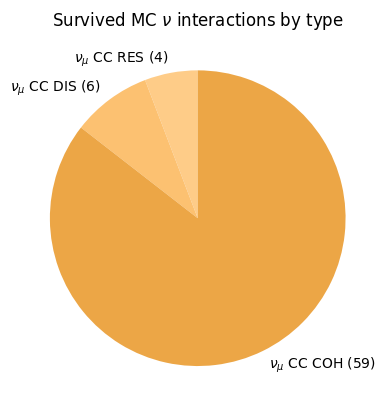

$\nu$ NC (0)
gotcha!
$\nu_\mu$ CC QE+MEC (0)
gotcha!
$\nu_\mu$ CC RES (4)
gotcha!
$\nu_\mu$ CC DIS (6)
gotcha!
$\nu_\mu$ CC COH (59)
gotcha!
$\nu$ Other (0)
gotcha!
Cosmic (12)


In [19]:
cats = make_categories(final_df, detailed_nu='int_type')

arr = np.array([final_df[cats[c+1]].shape[0] for c in range(len(cats)-1)])
pielabels = np.array([ cat.name+' (%a)'%final_df[cats[c+1]].shape[0] for c,cat in enumerate(cats[1:]) ])
mask = (arr != 0) & (np.char.find(pielabels, 'Cosmic')*(-1))
mask = mask.astype(bool)
plt.pie(arr[mask], 
        labels = pielabels[mask], 
        #colors = soladero, 
        colors = oranges,
        #colors = ['#3498db', '#e67e22', '#2ecc71'],
        startangle = 90, 
        textprops={'fontsize': 10})
plt.title('Survived MC $\\nu$ interactions by type' )
#if dosave: plt.savefig(savedir + "containment_%a.pdf" % c.name, bbox_inches = mpl.transforms.Bbox([[-1,0], [7,5]]))
plt.show()

labels = [ cat.name+' (%a)'%final_df[cats[c+1]].shape[0] for c,cat in enumerate(cats[1:]) ] 
for l in labels: 
    print(l)
    if 'Cosmic' not in l: print('gotcha!')

In [20]:
59./69


0.855072463768116

## See what kinds of neutrinos remain


['$\\nu_\\mu$ CC COH' '$\\nu_\\mu$ CC Other' '$\\nu_\\mu$ CC n$\\pi$0p']


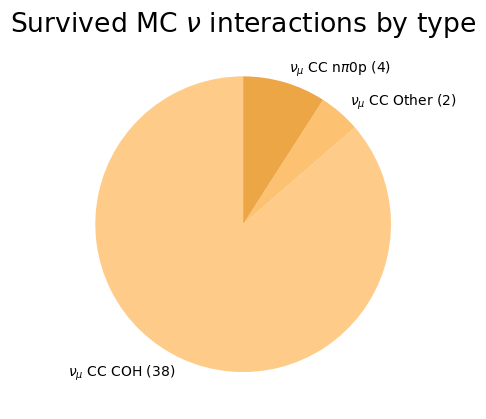

In [19]:
remaining_nus = final_df[make_categories(final_df)[-2]]
#for c in make_categories(final_df):
#    print(c.name)
remaining_nus = add_nu_int_type(remaining_nus)
survived_types = np.unique(remaining_nus.nu_mode)
print(survived_types)

## change the order so the pie chart looks better:
#survived_types = np.array([
#    survived_types[0],
#    survived_types[1],
#    survived_types[3],
#    survived_types[2],
#    survived_types[-1]
#])
#print(survived_types)

narray = []
labels = []
for st in survived_types:
    n = remaining_nus[remaining_nus.nu_mode == st].shape[0]
    narray.append(n)
    labels.append(st + ' (%a)' % n)
plt.pie(narray, labels = labels, colors = oranges, startangle = 90, textprops={'fontsize': 10})
plt.title('Survived MC $\\nu$ interactions by type' )
#if dosave: plt.savefig(savedir + "containment_%a.pdf" % c.name, bbox_inches = mpl.transforms.Bbox([[-1,0], [7,5]]))
plt.show()


In [20]:
# Truth particles:

#plt.hist(remaining_nus.slc.truth.p0.pdg, bins=31, range=(-15,15))
#plt.xlabel("Survived nu interactions' p0 PDG")
#plt.show()
print(np.unique(remaining_nus.slc.truth.p0.pdg))

#plt.hist(remaining_nus.slc.truth.p1.pdg)#, bins=31, range=(-15,15))
#plt.xlabel("Survived nu interactions' p1 PDG")
#plt.show()
print(np.unique(remaining_nus.slc.truth.p1.pdg))

# Track true particle PDGs:
print('')
print(np.unique(remaining_nus.trunk.trk.truth.p.pdg))
print(np.unique(remaining_nus.branch.trk.truth.p.pdg))

remaining_nus_w_pion = remaining_nus[(np.abs(remaining_nus.trunk.trk.truth.p.pdg)==211) | 
                                     (np.abs(remaining_nus.branch.trk.truth.p.pdg)==211)
                                    ]
print(remaining_nus.shape)
print(remaining_nus_w_pion.shape)

###

# 211: pi+
# -211: pi-
# 311: K0
# 2112: n
# 2212: p
#3122: Delta

#for c in remaining_nus.columns:
#    print(c)

[-13.  13.]
[-421. -211.  211. 2112.]

[-211  -13   13  211]
[-211  -13   13   22  211 2212]
(44, 285)
(42, 285)


In [21]:
print(38/44.)


0.8636363636363636


In [30]:
cats = make_categories(final_df)
for c in cats:
    print(c.name)
final_bg = final_df[~cats[0]]
print(final_bg.shape)
final_sig = final_df[cats[0]]


BSM
$\nu$
Cosmic
(59, 284)


In [40]:
final_bg

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      119      28    0                            0 -158.505600   70.751816   
       847      23    1                            0 -143.454865  -30.385544   
4      354      44    1                            0 -131.016296  -71.654907   
5      12       11    0                            0 -144.589127  -12.563004   
       210      5     10                           0  262.139404  -65.259521   
6      1565     18    0                            0 -127.814362   42.804413   
7      207      3     2                            0 -133.912674  107.399811   
8      309      7     18                           0   77.907913  117.466187   
       757      12    0                            0 -330.914368   96.112854   
10     427      4     0                            0 -175.262833  -15.653290   
12     1564     16    0                            0 -156.720795   71.940140   
       3058     15    0                            0 -329.080322 -147.606384   
13     1899     6     0                            0 -151.950546  -38.366783   
       2522     14    14                           0  273.304230 -128.304001   
15     1214     21    12                           0  213.539642 -106.353882   
18     1611     212   0                            0 -210.096146   83.623947   
19     640      31    24                           0  152.382462 -138.721069   
       804      1     23                           0  148.165649 -138.463806   
       810      25    20                           0  253.021652 -120.931549   
       1291     7     0                            0 -151.510178  -96.767120   
       1427     37    14                           0  209.998627  -37.326218   
       1553     13    0                            0 -210.053497   52.133011   
       1625     49    0                            0 -132.224930  -16.256378   
       2115     51    0                            0 -174.341324  -90.645325   
       2815     1     1                            0 -132.728378   38.683403   
       3405     2     12                           0  210.162933   49.818222   
       3521     35    0                            0 -333.571320  108.167175   
       3603     47    19                           0  202.846878  -55.481995   
       3937     21    1                            0 -191.880112   68.779762   
       3938     37    13                           0  219.616287    5.805145   
       3948     40    26                           0  160.033081 -126.111725   
       4213     47    26                           0  235.481903  -87.049255   
       5261     15    0                            0 -177.962372   76.633484   
       5663     29    18                           0  269.126740  -73.012009   
       6575     47    0                            0 -158.860321  -61.396118   
       6732     0     11                           0  128.111420  -39.794235   
       7242     23    24                           0  258.550720  -63.035248   
       7333     59    0                            0 -145.836685   -9.234680   
       7552     43    9                            0  230.869705  105.260468   
       7733     51    10                           0  224.797806  -65.632538   
       7896     15    0                            0 -169.593048 -145.852905   
       8095     8     1                            0 -162.749420  -86.623611   
       8363     55    0                            0 -302.318390  -43.230042   
       8907     45    16                         

In [26]:
mc_res



$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              2808   
below 0_5cm dEdx <= 50 MeV/cm                             2581   
up to 1cm dEdx <= 35 MeV/cm                               2564   
up to 2cm dEdx <= 15 MeV/cm                               2484   
up to 3cmdEdx <= 10 MeV/cm                                2380   
max shower len < 10.0 cm                                  2200   
both chi2mu < 13                                          1663   
S_NuMI_angle < 3 deg                                       756   
opening angle < 15 deg                                     682   
shorter of tracks > 140.0 cm                               336   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              6046   
below 0_5cm dEdx <= 50 MeV/cm                             5586   
up to 1cm dEdx <= 35 MeV/cm                               5569   
up to 2cm dEdx <= 15 MeV/cm                               5412   
up to 3cmdEdx <= 10 MeV/cm                                5212   
max shower len < 10.0 cm                                  5060   
both chi2mu < 13                                          3903   
S_NuMI_angle < 3 deg                                      1992   
opening angle < 15 deg                                    1543   
shorter of tracks > 140.0 cm                               803   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              7890   
below 0_5cm dEdx <= 50 MeV/cm                             7164   
up to 1cm dEdx <= 35 MeV/cm                               7144   
up to 2cm dEdx <= 15 MeV/cm                               6924   
up to 3cmdEdx <= 10 MeV/cm                                6654   
max shower len < 10.0 cm                                  6544   
both chi2mu < 13                                          5082   
S_NuMI_angle < 3 deg                                      2716   
opening angle < 15 deg                                    1642   
shorter of tracks > 140.0 cm                               911   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              5222   
below 0_5cm dEdx <= 50 MeV/cm                             4777   
up to 1cm dEdx <= 35 MeV/cm                               4765   
up to 2cm dEdx <= 15 MeV/cm                               4638   
up to 3cmdEdx <= 10 MeV/cm                                4469   
max shower len < 10.0 cm                                  4405   
both chi2mu < 13                                          3346   
S_NuMI_angle < 3 deg                                      1694   
opening angle < 15 deg                                     757   
shorter of tracks > 140.0 cm                               421   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                              9127   
below 0_5cm dEdx <= 50 MeV/cm                             8315   
up to 1cm dEdx <= 35 MeV/cm                               8282   
up to 2cm dEdx <= 15 MeV/cm                               8034   
up to 3cmdEdx <= 10 MeV/cm                                7761   
max shower len < 10.0 cm                                  7679   
both chi2mu < 13                                          5820   
S_NuMI_angle < 3 deg                                      2823   
opening angle < 15 deg                                     935   
shorter of tracks > 140.0 cm                               563   

                               $M_S$ = 320, $\theta_S$ = 1e-05  \
preselection                                               184   
below 0_5cm dEdx <= 50 MeV/cm                              175   
up to 1cm dEdx <= 35 MeV/cm                                175   
up to 2cm dEdx <= 15 MeV/cm                                170   
up to 3cmdEdx <= 10 MeV/cm                                 169   


In [27]:
for c in final_bg.columns:
    print(c)
    

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

### max_othr_trk_len

In [35]:
final_bg.slc.truth
final_bg.max_othr_trk_len

print(final_bg.shape)
final_bg[~np.isnan(final_bg.max_othr_trk_len)].max_othr_trk_len.shape

(59, 284)


(8,)

In [34]:
print(final_sig.shape)
final_sig[~np.isnan(final_sig.max_othr_trk_len)].max_othr_trk_len.shape

(20200, 284)


(2903,)

### third_trk_dist

In [37]:
final_bg.slc.truth
final_bg.third_trk_dist

print(final_bg.shape)
final_bg[~np.isnan(final_bg.third_trk_dist)].third_trk_dist.shape

(59, 284)


(46,)

In [39]:
final_sig.slc.truth
final_sig.third_trk_dist

print(final_sig.shape)
final_sig[~np.isnan(final_sig.third_trk_dist)].third_trk_dist.shape

(20200, 284)


(11911,)

In [ ]:
plt.hist()

### Look into protons and performance of stub cut at getting rid of them: 
###    (doesn't look like it's actually doing much :/ )

ValueError: weights should have the same shape as x

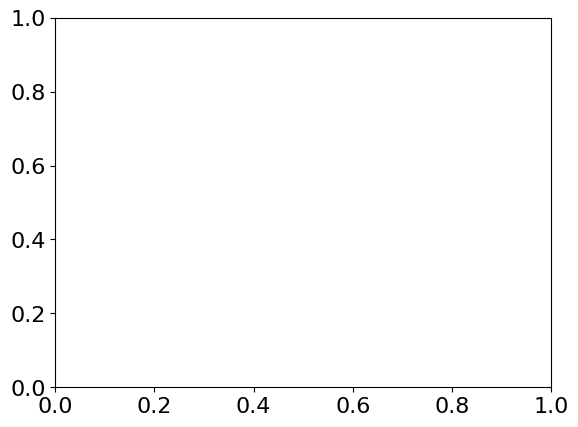

In [31]:
check_proton_stubs(evtdf, detailed_nu=True)

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_S$ = 300, $\theta_S$ = 3e-05
$M_S$ = 330, $\theta_S$ = 2e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0
$\nu$
Cosmic
24.0
74739
60997


/tmp/ipykernel_11623/498941048.py:130: RuntimeWarning: invalid value encountered in true_divide
  cut_results_df_percent.loc[func_output[1]] = np.array(row_mc)/np.array(first_row_mc)


ValueError: too many values to unpack (expected 2)

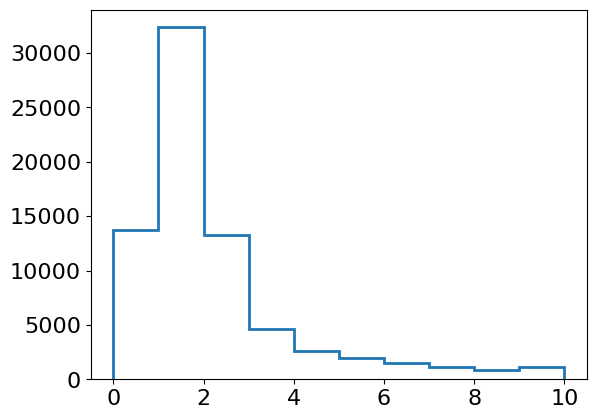

In [39]:
categories = make_categories(evtdf)

###########

nu_evtdf = evtdf[categories[-2]]
print(max(evtdf.slc.truth.np))
print(nu_evtdf.shape[0])
print(nu_evtdf[nu_evtdf.slc.truth.np > 0].shape[0])

cut_results = apply_cuts(nu_evtdf, [stub_mask], flip_last_cut=False)
mask = cut_results[-1]
noStub_nu_evtdf = add_hdr_info(nu_evtdf[mask])



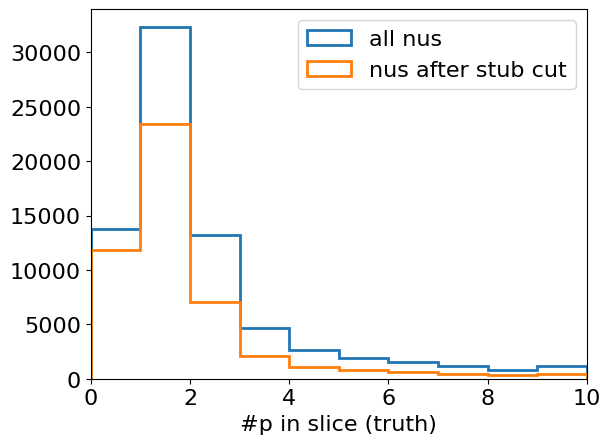

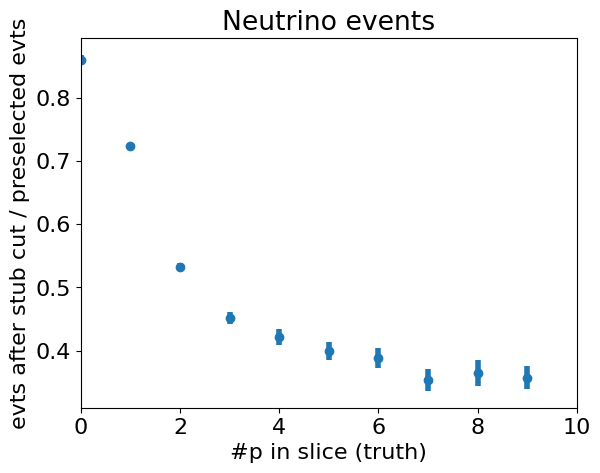

<class 'tuple'>
zero kinetic p:  (13742, 208)
zero kinetic p:  (11811, 210)


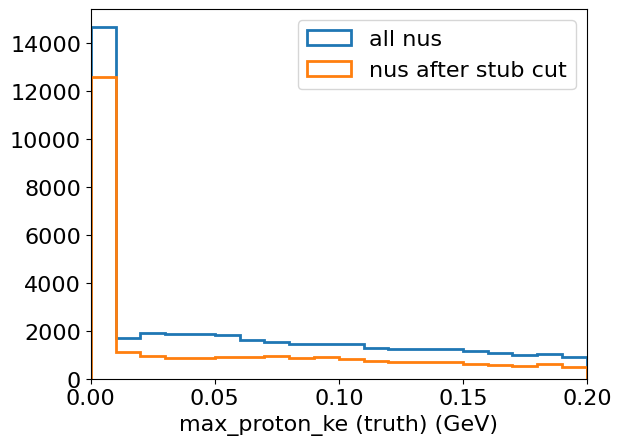

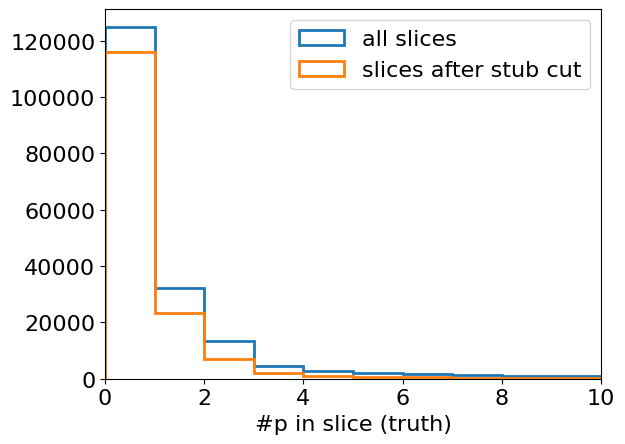

In [50]:
xrange = (0,10)
mybins = 10
n = plt.hist(nu_evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, label='all nus')
noStub_n = plt.hist(noStub_nu_evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, label='nus after stub cut')
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('#p in slice (truth)')
plt.show()

err = np.sqrt(noStub_n[0]/(n[0])**2 + 4*(noStub_n[0])**2*(n[0])**(-5))
plt.errorbar(n[1][:-1], noStub_n[0]/n[0], yerr=err, fmt="o")
plt.xlim(xrange)
plt.xlabel('#p in slice (truth)')
plt.ylabel('evts after stub cut / preselected evts')
plt.title("Neutrino events")
plt.show()

print(type(n))

# 

print('zero kinetic p: ', nu_evtdf[nu_evtdf.slc.truth.max_proton_ke == 0.].shape)
print('zero kinetic p: ', noStub_nu_evtdf[noStub_nu_evtdf.slc.truth.max_proton_ke == 0.].shape)
xrange = (0, 0.2)
mybins = 20
plt.hist(nu_evtdf.slc.truth.max_proton_ke, histtype='step', linewidth=2, 
         label='all nus', bins=mybins, range=xrange)
plt.hist(noStub_nu_evtdf.slc.truth.max_proton_ke, histtype='step', linewidth=2, 
         label='nus after stub cut', bins=mybins, range=xrange)
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('max_proton_ke (truth) (GeV)')
plt.show()

##

cut_results = apply_cuts(evtdf, [stub_mask], flip_last_cut=False)
mask = cut_results[-1]
#noStub_evtdf = add_hdr_info(evtdf[mask])
noStub_evtdf = evtdf[mask]

xrange = (0,10)
mybins = 10
plt.hist(evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, label='all slices')
plt.hist(noStub_evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, 
         label='slices after stub cut')
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('#p in slice (truth)')
plt.show()

/tmp/ipykernel_11623/2178594100.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(noStub_evtdf[noStub_categories[c]].slc.truth.np, bins=mybins, range=xrange, histtype='step',


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

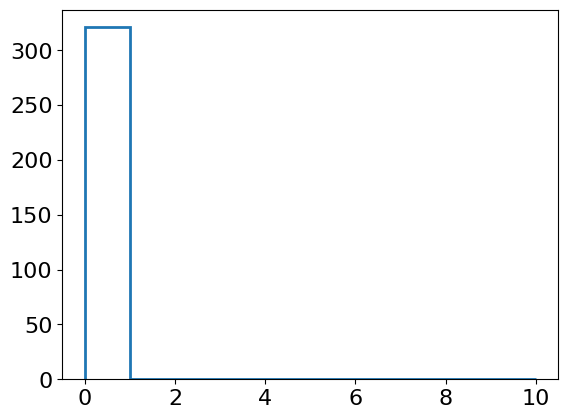

In [51]:
cut_results = apply_cuts(evtdf, [stub_mask], flip_last_cut=False)
mask = cut_results[-1]
noStub_evtdf = add_hdr_info(evtdf[mask])

categories = make_categories(evtdf, detailed_nu=True)
noStub_categories = make_categories(noStub_nu_evtdf, detailed_nu=True)

xrange = (0,10)
mybins = 10
for c in range(len(categories)):
    plt.hist(evtdf[categories[c]].slc.truth.np, bins=mybins, range=xrange, histtype='step', 
             linewidth=2, label='all preselected')
    plt.hist(noStub_evtdf[noStub_categories[c]].slc.truth.np, bins=mybins, range=xrange, histtype='step', 
             linewidth=2, label='after stub cut')
    plt.legend()
    plt.xlim(xrange)
    plt.xlabel('#p in slice (truth)')
    plt.title(categories[c].name)
    plt.show()


/tmp/ipykernel_11623/498941048.py:130: RuntimeWarning: invalid value encountered in true_divide
  cut_results_df_percent.loc[func_output[1]] = np.array(row_mc)/np.array(first_row_mc)


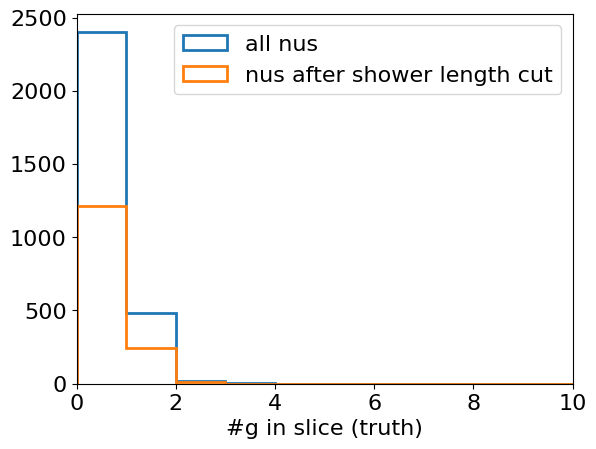

/tmp/ipykernel_11623/990237062.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(nu_evtdf[categories[0]].slc.truth.ng, bins=mybins, range=xrange, histtype='step',


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [<matplotlib.patches.Polygon at 0x7f15c9bedb50>])

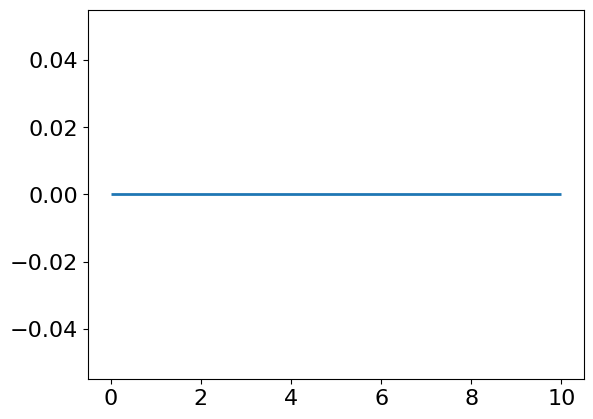

In [35]:
# How many gammas?

cut_results = apply_cuts(nu_evtdf, [max_shw_len_mask], flip_last_cut=False)
mask = cut_results[-1]
noShow_nu_evtdf = add_hdr_info(nu_evtdf[mask])

xrange = (0,10)
mybins = 10
plt.hist(nu_evtdf.slc.truth.ng, bins=mybins, range=xrange, histtype='step', linewidth=2, label='all nus')
plt.hist(noShow_nu_evtdf.slc.truth.ng, bins=mybins, range=xrange, histtype='step', linewidth=2, 
         label='nus after shower length cut')
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('#g in slice (truth)')
plt.show()

plt.hist(nu_evtdf[categories[0]].slc.truth.ng, bins=mybins, range=xrange, histtype='step', 
         linewidth=2, label='all '+categories[0].name)


In [136]:
evtdf[categories[0]].slc.truth.ng
#nu_evtdf[categories[0]]

sample  __ntuple  entry  rec.slc..index
0       18        19     0                 0.0
        4         15     0                 0.0
        2         6      1                 0.0
        16        6      0                 0.0
                  23     19                0.0
                                          ... 
        468       24     9                 0.0
        466       20     8                 0.0
        469       9      0                 0.0
        470       1      13                0.0
                  16     0                 0.0
Name: ng, Length: 321, dtype: float64

## Optimize Cuts 

Create statistical significance scatter plot for each sample individually. Then eyeball the best choice - one size fits all style.

~~~~

TO DO:

- fix to handle the various samples
- optimize for all cuts (including chi2 and dQ/dx)

~~~~

For simplicity, it makes sense to lump together all BSM and do one optimization.

But, that optimization scales to expected numbers of events per POT, and that assumes benchmark parameters (theta, fa). How can I optimize for all at once? Is it even possible?

For a given model with different benchmark parameters, the optimization will vary.

In [19]:
cat = make_categories(evtdf, detailed_bsm=True)
for c in cat: print(c.name)

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic


In [20]:
#TODO: plot S/B too (good when dominated by background systs, and also more similar to zero-bg strategy)
# TODO: change colors
def optimize_cut(df, mask, scan_vals, param, detailed_bsm=True, plot=False):
    categories = make_categories(df, detailed_bsm=detailed_bsm) # This one is just to know what the samples are so you can loop over them.
    myrange = [min(scan_vals), max(scan_vals)]
    # STATISTICAL SIGNIFICANCE
    if plot:
        fig, (p0, p1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,2]}, sharex=True) #, figsize=(7, 6.4)
        fig.subplots_adjust(hspace=0.1) # hspace=0.04
        #fig = plt.figure()
        #ax = plt.subplot(111)
    nMC_bg = []
    for cn, c in enumerate(categories[:-2]): #range(len(categories)-2):
        #print(c.name, ': ', df[c].shape)
        if df[c].shape[0] == 0:
            best_val = -99
            continue
        #significance = []
        numerator = []
        denom = []
        nMC_signal = []
        for val in scan_vals:
            #m = mask(df, thresh=val)[0]
            #temp_df = df[m]
            #cat = make_categories(temp_df) # This one has the correct dimensions to match temp_df, which we'll be using it for.
            #for thing in cat: print(thing.name)
        #for c in range(len(categories)-2):
            numerator.append(sum(df[c][mask(df[c], thresh=val)[0]].scale))
            denom.append(np.sqrt( 
                sum(df[c][mask(df[c], thresh=val)[0]].scale) + 
                sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale) + 
                sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale)
            )
                        )
            #sig = numerator/denom
            #print(type(sig))
            #if math.isnan(sig): 
            #    print('NaN! ')
            #    print('denom_arg: ', denom_arg)
            #    print('df[c][mask(df[c], thresh=val)[0]].shape: ', df[c][mask(df[c], thresh=val)[0]].shape)
            #    #print('sum(df[c][mask(df[c], thresh=val)[0]].scale): ', sum(df[c][mask(df[c], thresh=val)[0]].scale))
            #    print('df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape: ', df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape )
            #    #print('sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale): ', sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale))
            #    print('df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape: ', df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape )
            #    #print('sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale): ', sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale))
            #    print()
            #significance.append(sig)
            nMC_signal.append(df[c][mask(df[c], thresh=val)[0]].shape[0])
            if cn == 0:
                nMC_bg.append(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape[0] +
                              df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape[0])
        nMC_signal = np.array(nMC_signal)
        numerator = np.array(numerator)
        denom = np.array(denom)
        significance = numerator/denom
        #significance[ (numerator!=0.) & (denom==0.) ] = numerator[ (numerator!=0.) & (denom==0.) ] # I'm fudging here!
        rel_sig = significance/np.max(significance[np.isfinite(significance)])
        #rel_sig[ (numerator!=0.) & (denom==0.) ] = # I'm fudging! #1.
        ok = np.isfinite(rel_sig) # so, it'll just ignore points where significance is infinity or nan
        rel_sig = rel_sig[ok]
        x_vals_sig = scan_vals[ok]
        best_val_sig = x_vals_sig[np.argmax(rel_sig)]
        if plot:
            p0.plot(x_vals_sig, rel_sig, '-',
                     label = (c.name + ' (%a)' % (round(1000 * best_val_sig)/1000.)))#, color=c.color)
            p1.plot(scan_vals, nMC_signal, '-')
        
    nMC_bg = np.array(nMC_bg)
    if plot:
        p1.plot(scan_vals, nMC_bg, '--', color='black', label='Background') # same for any signal category
        plt.xlabel(param)
        p0.set_ylabel('Rel. S/sqrt(S+B) \n per %s' % POTSTR)
        p0.set_xlim(myrange)
        #plt.yscale('log')
        #plt.axvline([best_val], linestyle=":", color="r", linewidth=2)
        
        # legend documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
        box = p0.get_position()
        p0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p0.legend(loc='lower center', bbox_to_anchor=(0.5, 1.03), ncol=1, fontsize='xx-small')
        
        box = p1.get_position()
        p1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p1.set_ylabel('# MC evts \n selected')
        p1.set_xlim(myrange)
        p1.legend(fontsize='xx-small')
        p1.set_yscale('log')
        plt.show()
    
    
    # S/B
    if plot:
        fig, (p0, p1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,2]}, sharex=True) #, figsize=(7, 6.4)
        fig.subplots_adjust(hspace=0.04)
    nMC_bg = []
    for cn, c in enumerate(categories[:-2]):
        if df[c].shape[0] == 0:
            best_val = -99
            continue
        S = []
        B = []
        nMC_signal = []
        for val in scan_vals:
            S.append(sum(df[c][mask(df[c], thresh=val)[0]].scale))
            B.append(
                sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale) + 
                sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale)
            )
            nMC_signal.append(df[c][mask(df[c], thresh=val)[0]].shape[0])
            if cn == 0:
                nMC_bg.append(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape[0] +
                              df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape[0])
        nMC_signal = np.array(nMC_signal)
        S = np.array(S)
        B = np.array(B)
        SoverB = S/B
        #SoverB[ (S!=0.) & (B==0.) ] = S[ (S!=0.) & (B==0.) ] # I'm fudging here!
        rel_SoverB = SoverB/np.max(SoverB[np.isfinite(SoverB)])
        #rel_SoverB[ (S!=0.) & (B==0.) ] = S[ (S!=0.) & (B==0.) ] # I'm fudging! #1. # this rarely (never?) happens             
        ok = np.isfinite(rel_SoverB)
        rel_SoverB = rel_SoverB[ok]
        #print(S, B, SoverB, rel_SoverB, sep='\n \n')   
        #print(rel_SoverB, '\n \n')
        #if rel_SoverB.shape[0] == 0.:
        x_vals_SoverB = scan_vals[ok]
        best_val_SoverB = x_vals_SoverB[np.argmax(rel_SoverB)]
        
        if plot:
            p0.plot(x_vals_SoverB, rel_SoverB, '-', 
                     label = (c.name + ' (%a)' % (round(1000 * best_val_SoverB)/1000.)))#, color=c.color)
            p1.plot(scan_vals, nMC_signal, '-')
    nMC_bg = np.array(nMC_bg)
    if plot:
        p1.plot(scan_vals, nMC_bg, '--', color='black', label='Background') # same for any signal category
        plt.xlabel(param)
        p0.set_ylabel('Relative S/B')
        
        # legend documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
        box = p0.get_position()
        p0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p0.legend(loc='lower center', bbox_to_anchor=(0.5, 1.03), ncol=1, fontsize='xx-small')
        box = p1.get_position()
        p1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p1.set_ylabel('# MC evts \n selected')
        p1.set_xlim(myrange)
        p1.legend(fontsize='xx-small')
        p1.set_yscale('log')
        plt.show()
        
    return(best_val_sig, best_val_SoverB)

In [23]:
# NuMI Angle

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
                 max_shw_len_mask, ok_chi2mu, ok_chi2p,
                 open_angle_mask
                ]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_open_angle_thresh
]
df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
print(df.shape)


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


(71566, 271)


/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


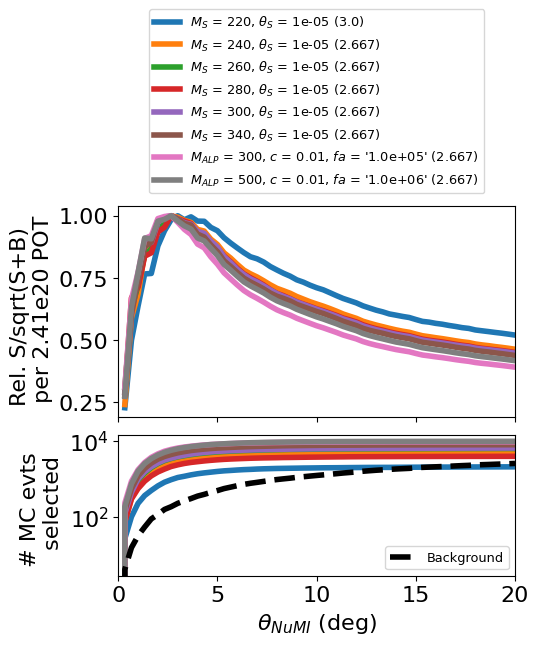

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


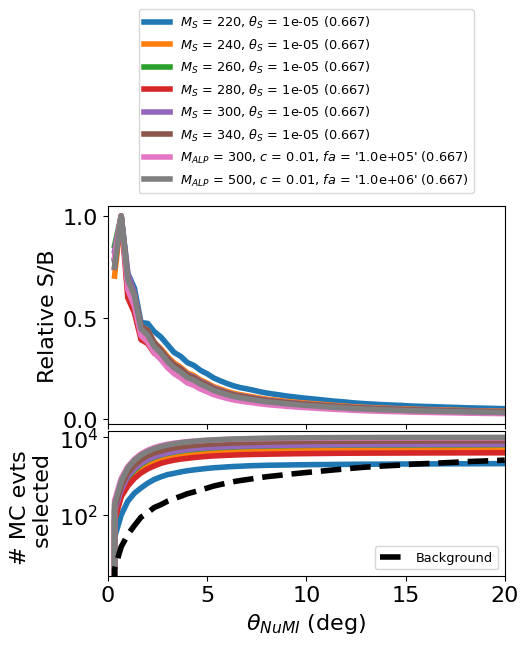

In [24]:
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 20., 61), '$\\theta_{NuMI}$ (deg)', detailed_bsm=True, plot=True)

/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


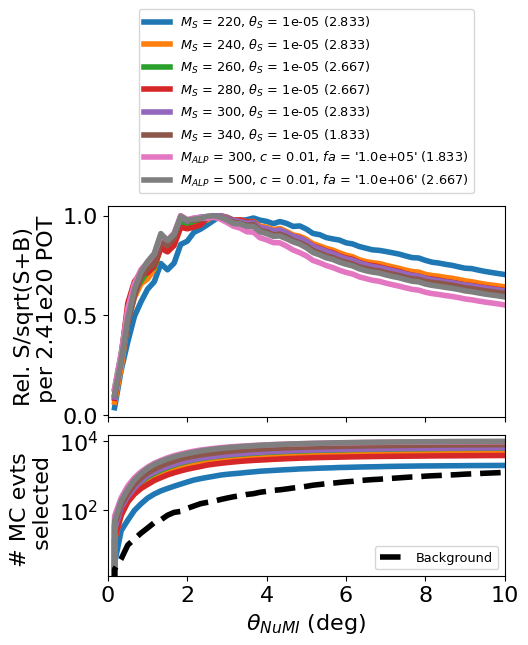

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


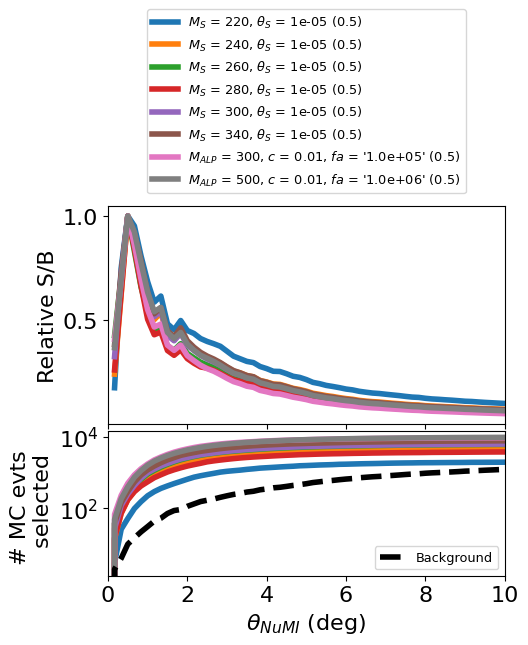

In [25]:
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 10., 61), '$\\theta_{NuMI}$ (deg)', detailed_bsm=True ,plot=True)

In [26]:
# Opening angle

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
            numi_angle_mask
           ]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh
]
opt_open_angle_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]

/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


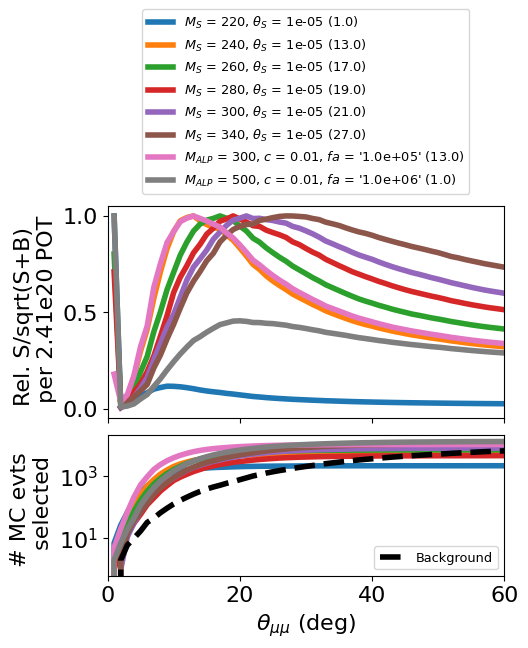

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


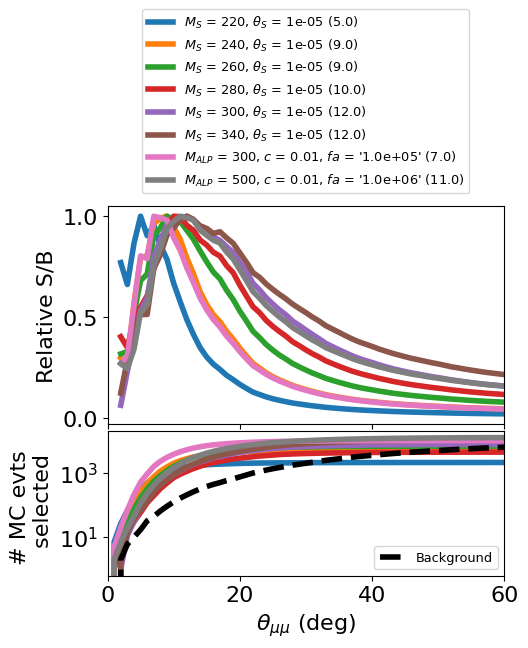

In [27]:
a = optimize_cut(opt_open_angle_df, open_angle_mask, np.linspace(0., 60., 61), '$\\theta_{\mu\mu}$ (deg)', detailed_bsm=True ,plot=True)

In [28]:
# Max Shower Length
#    Note: the reason the significance isn't 0 if you cut with -11 is because some values are NaN, not just -10.

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
opt_shwlen_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


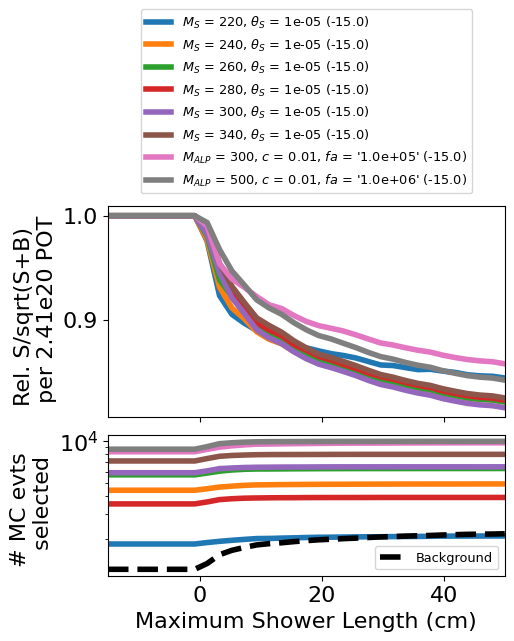

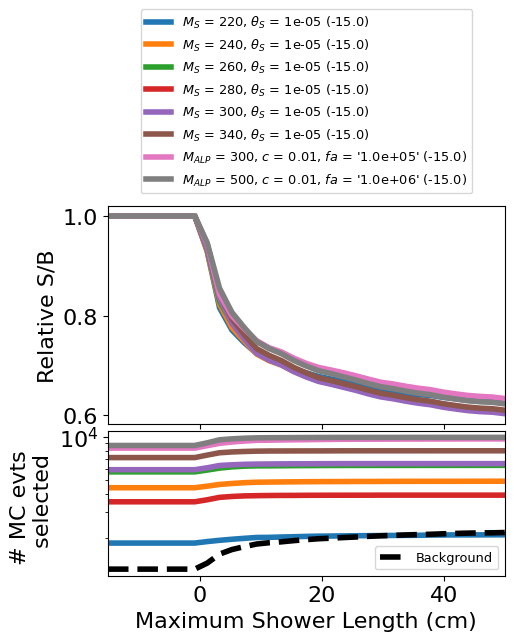

In [29]:
a = optimize_cut(opt_shwlen_df, max_shw_len_mask, np.linspace(-15, 50., 33), 'Maximum Shower Length (cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


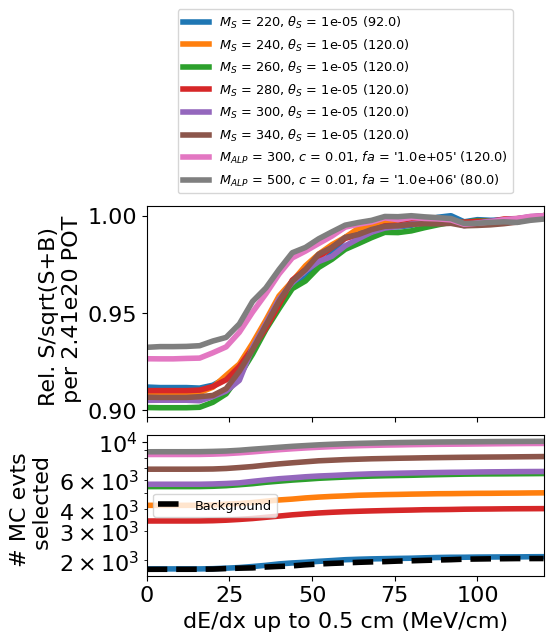

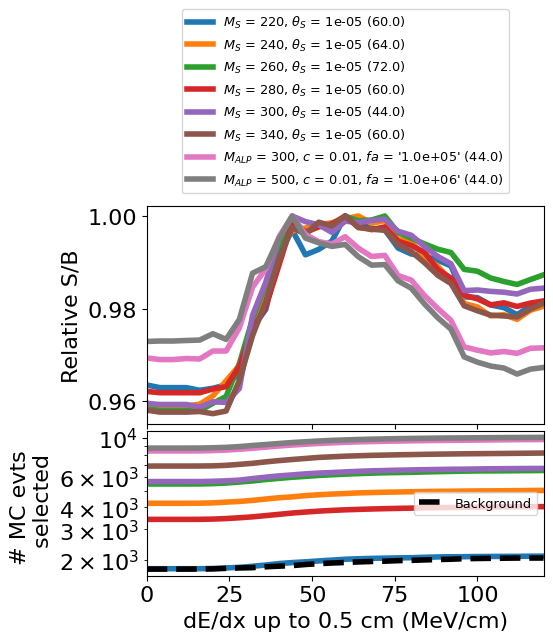

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


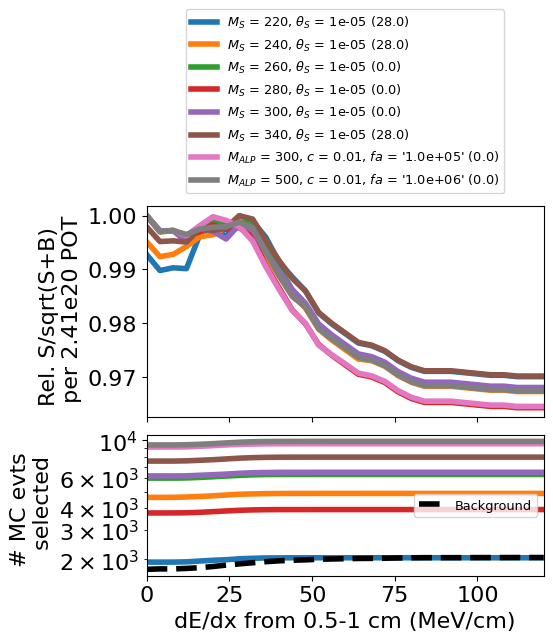

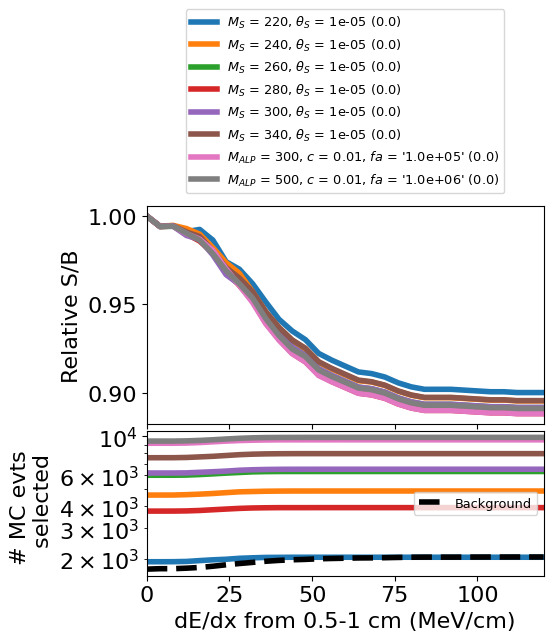

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


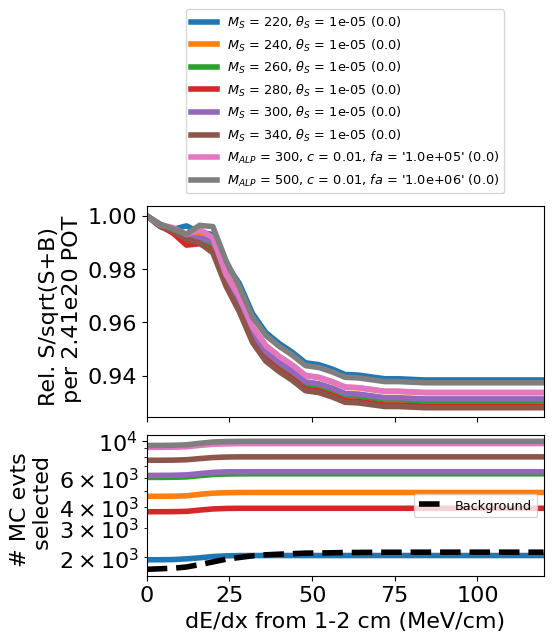

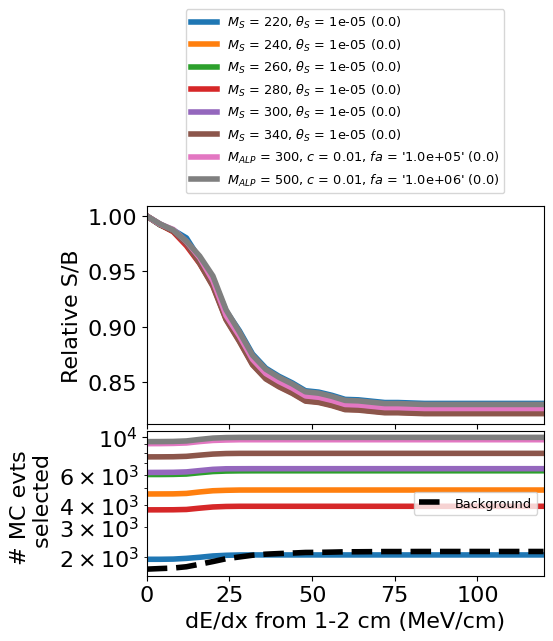

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


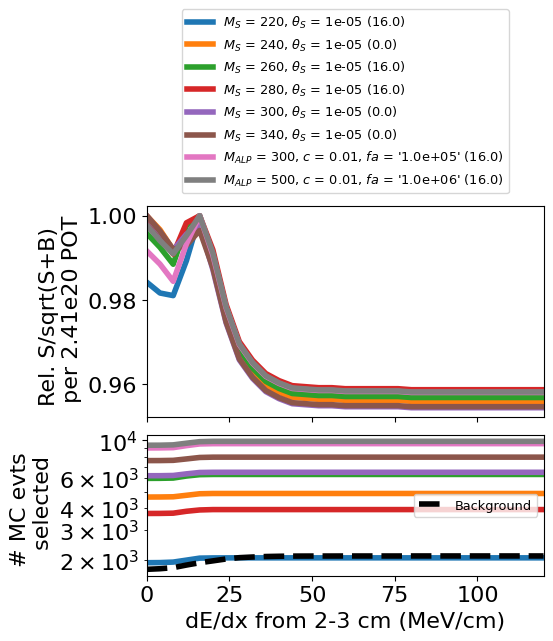

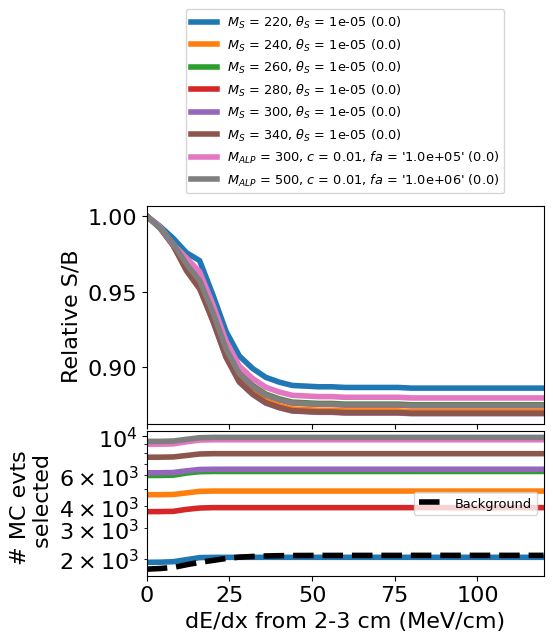

In [30]:
# Stub dE/dx

temp_cut_list = [not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_0 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_0, not_stub_05, np.linspace(0., 120., 31), 'dE/dx up to 0.5 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

temp_cut_list = [not_stub_05, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_1 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_1, not_stub_1, np.linspace(0., 120., 31), 'dE/dx from 0.5-1 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

temp_cut_list = [not_stub_05, not_stub_1, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_2 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_2, not_stub_2, np.linspace(0., 120., 31), 'dE/dx from 1-2 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_3 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_3, not_stub_3, np.linspace(0., 120., 31), 'dE/dx from 2-3 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


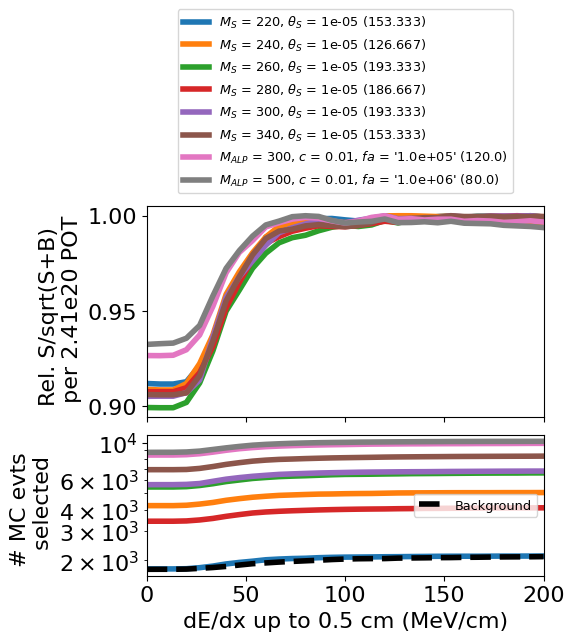

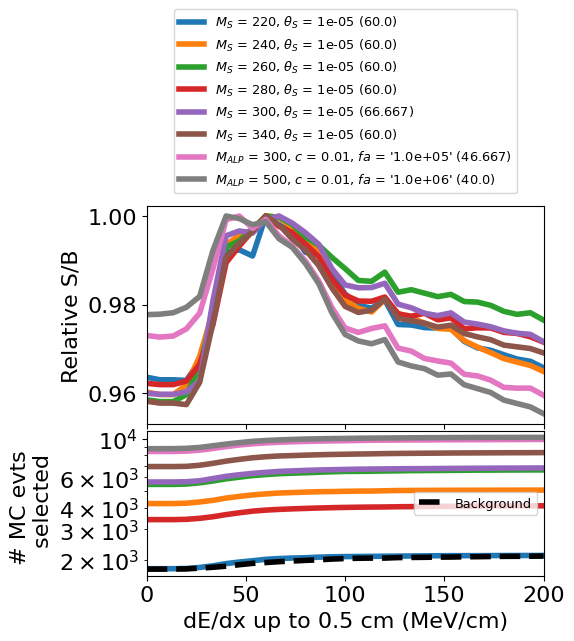

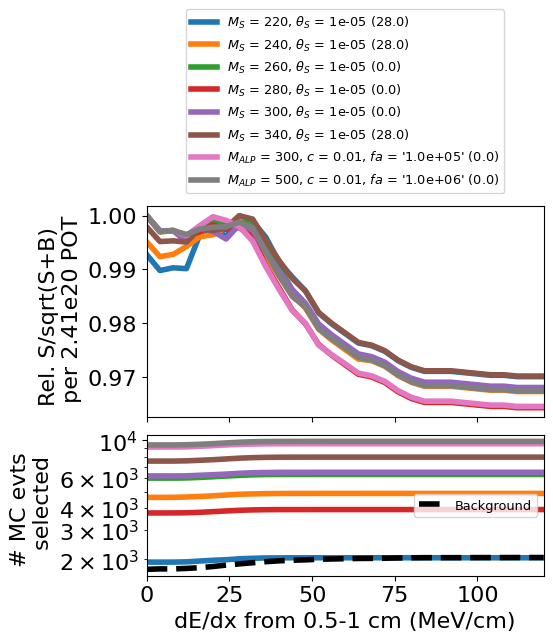

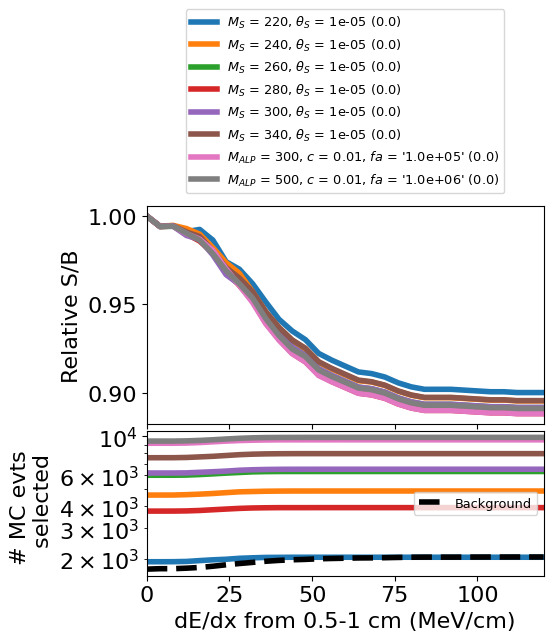

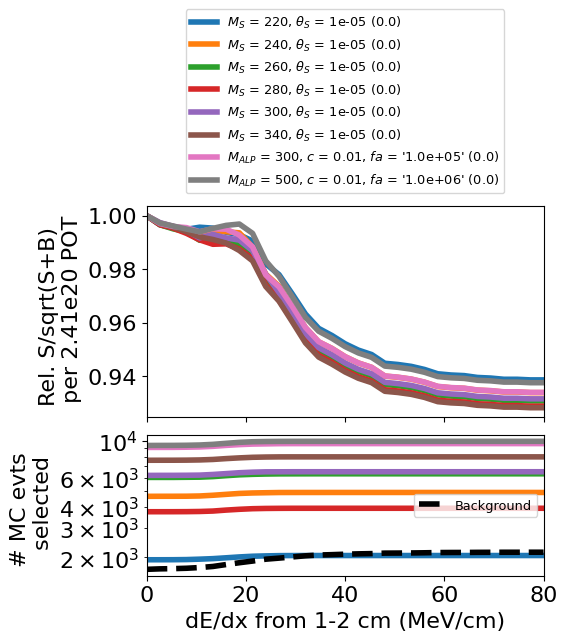

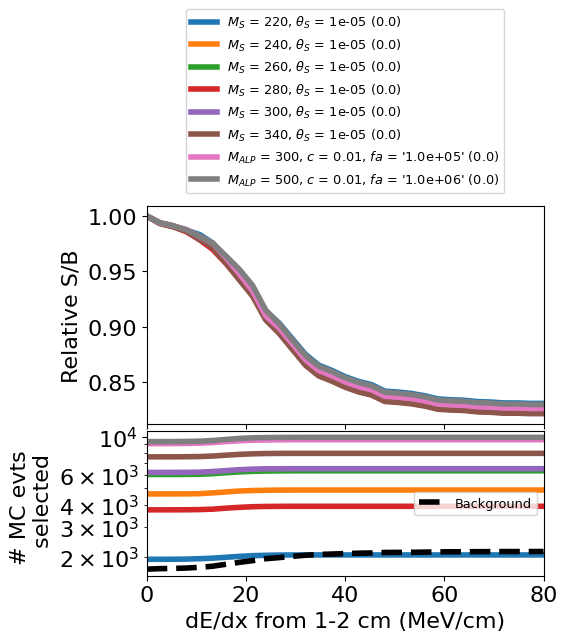

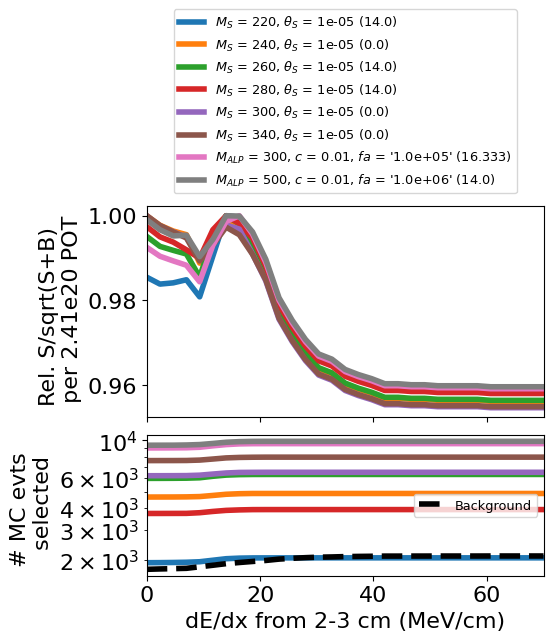

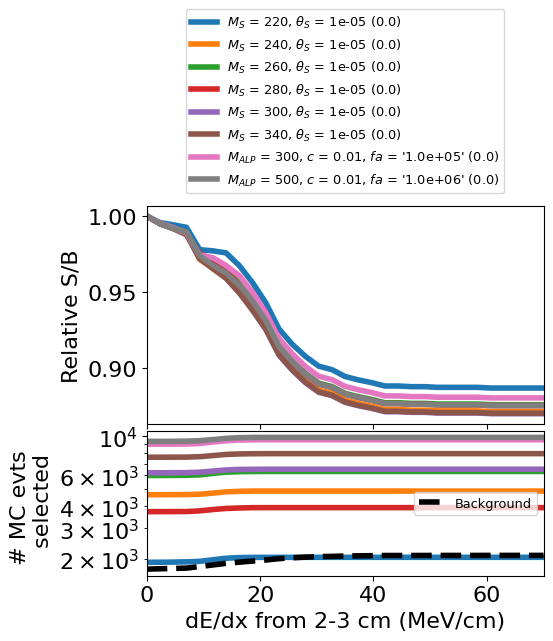

In [31]:
a = optimize_cut(df_0, not_stub_05, np.linspace(0., 200., 31), 'dE/dx up to 0.5 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))
a = optimize_cut(df_1, not_stub_1, np.linspace(0., 120., 31), 'dE/dx from 0.5-1 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))
a = optimize_cut(df_2, not_stub_2, np.linspace(0., 80., 31), 'dE/dx from 1-2 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))
a = optimize_cut(df_3, not_stub_3, np.linspace(0., 70., 31), 'dE/dx from 2-3 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [21]:
# PID - chi2 Muon
temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
opt_chi2muon_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_26742/3748838454.py:55: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


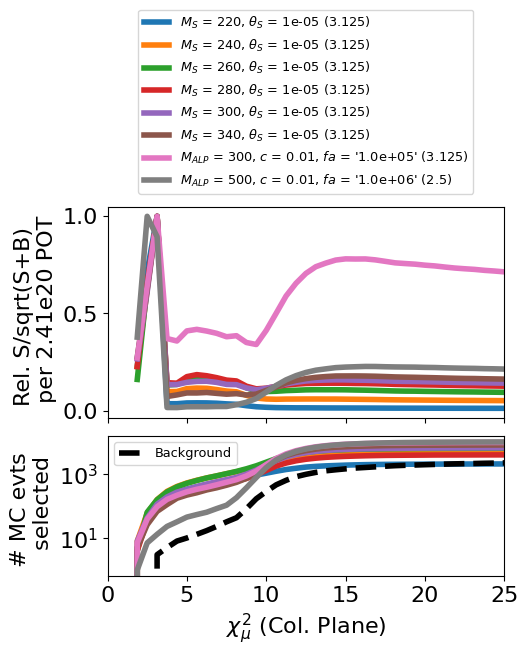

/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


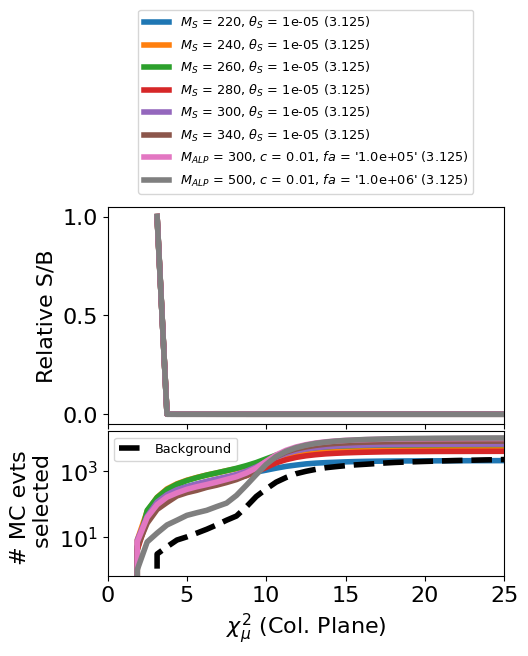

In [22]:
a = optimize_cut(opt_chi2muon_df, ok_chi2mu, np.linspace(0., 25., 41), '$\\chi^2_\\mu$ (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


/tmp/ipykernel_26742/3748838454.py:55: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


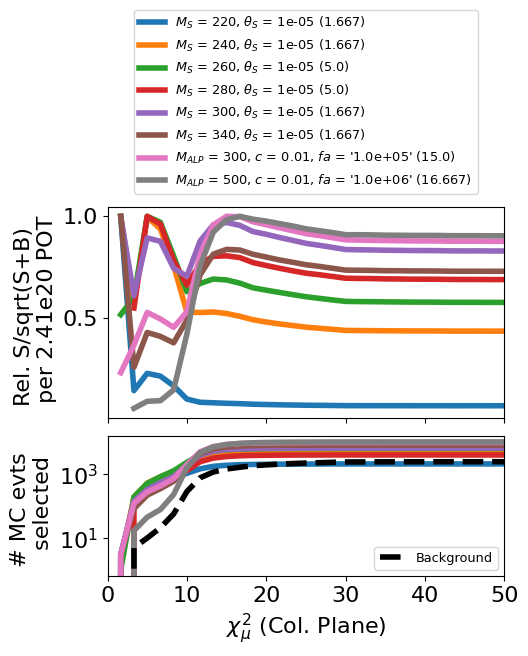

/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


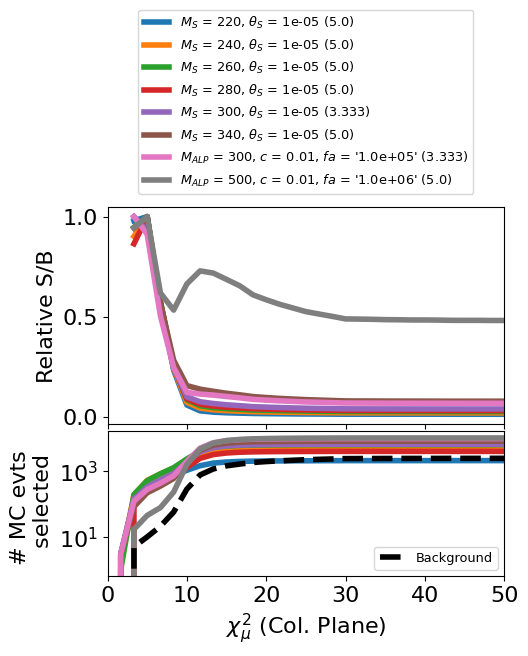

In [23]:
a = optimize_cut(opt_chi2muon_df, ok_chi2mu, np.linspace(0., 50., 31), '$\\chi^2_\\mu$ (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [35]:
# PID - chi2 Proton
temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]

opt_chi2p_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


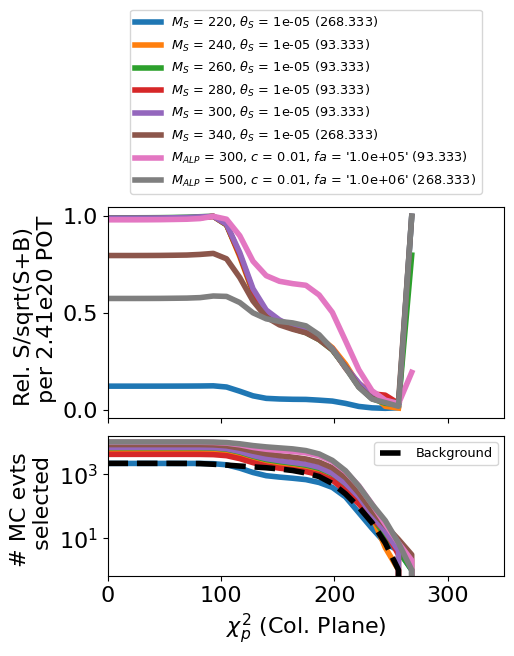

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


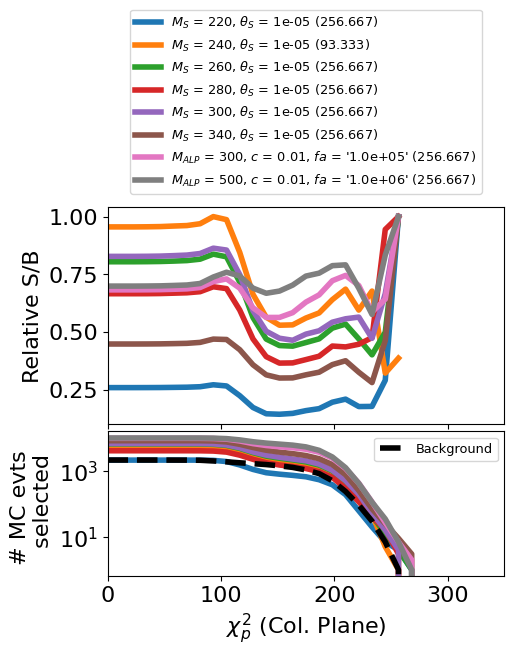

In [36]:
a = optimize_cut(opt_chi2p_df, ok_chi2p, np.linspace(0., 350., 31), '$\\chi^2_p$ (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [37]:
# scratch

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
print(nom_open_angle_thresh)

30


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


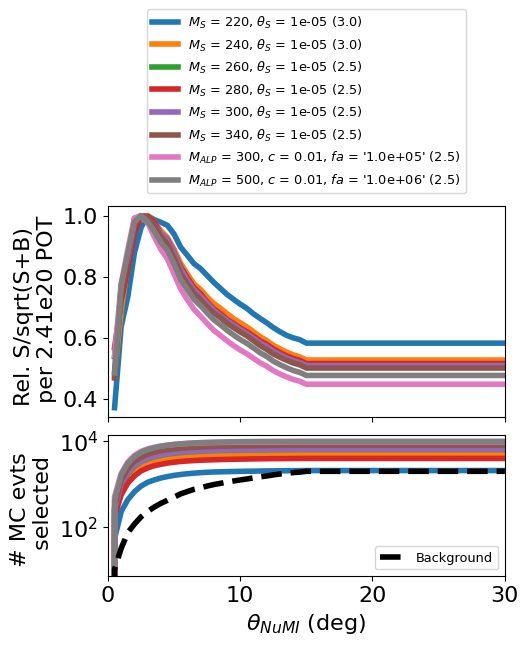

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


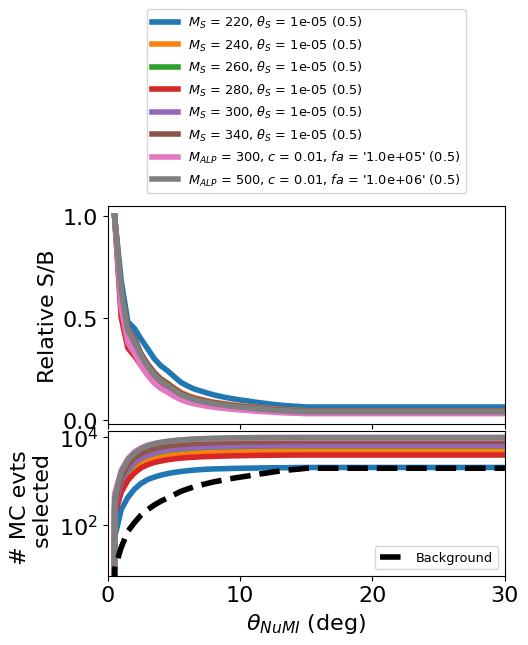

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: x and y must have same first dimension, but have shapes (51,) and (0,)

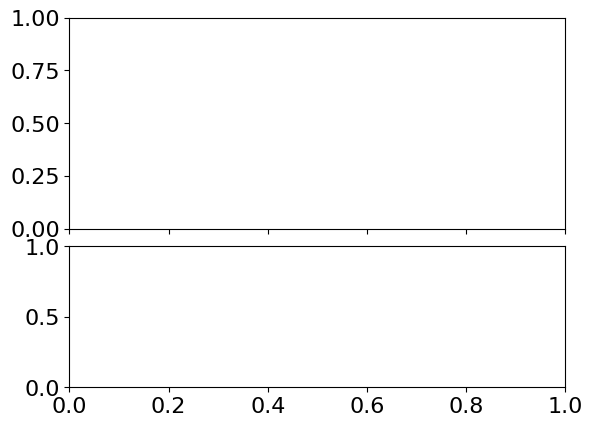

In [39]:
#cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
#            max_shw_len_mask, ok_chi2mu, ok_chi2p,
#           numi_angle_mask, open_angle_mask]
#thresholds_noTrkLenCut = [
#    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
#    nom_max_shw_len_thresh,
#    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
#    nom_NuMI_angle_thresh, nom_open_angle_thresh
#]

# S_NuMI Angle

cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
            numi_angle_mask, open_angle_mask
           ]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 30., 61), '$\\theta_{NuMI}$ (deg)', detailed_bsm=True ,plot=True)


# STUB CUTS

# stub: dqdx up to 0.5
cut_list = [not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_05, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 0.5 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

# stub: dqdx up to 1
cut_list = [not_stub_05, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_1, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 1 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

# stub: dqdx up to 2
cut_list = [not_stub_05, not_stub_1, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_2, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 2 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

# stub: dqdx up to 1
cut_list = [not_stub_05, not_stub_1, not_stub_2,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_3, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 3 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


# MUON ID

# mu PID
cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, ok_chi2mu, np.linspace(0., 60., 31), '$\\chi^2$ Muon (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


# proton PID
cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, ok_chi2p, np.linspace(0., 300., 31), '$\\chi^2$ Proton (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))



## Other trk length

#cut_list = [stub_mask, max_shw_len_mask, both_muon_tracks_mask,
#           numi_angle_mask, open_angle_mask]
#mask = apply_cuts(evtdf, cut_list)[-1]
#df = evtdf[mask]
#a = optimize_cut(df, other_trk_len_mask, np.linspace(0., 50., 51), 'other trk len (cm)', plot=True)

# third trk dist

#cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, 
#            max_shw_len_mask, other_trk_len_mask]
#mask = apply_cuts(evtdf, cut_list)[-1]
#df = evtdf[mask]
#a = optimize_cut(df, third_trk_dist_mask, np.linspace(0., 50., 51), 'third trk dist (cm)', plot=True)


## Shorter Track Length

#cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, max_shw_len_mask]
#mask = apply_cuts(evtdf, cut_list)[-1]
#df = evtdf[mask]
#a = optimize_cut(df, shortTrk_len_mask, np.linspace(0., 500., 101), 'shorter of tracks len (cm)', plot=True)

In [ ]:
# Max Shower Length
#    Note: the reason the significance isn't 0 if you cut with -11 is because some values are NaN, not just -10.

cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, max_shw_len_mask, np.linspace(0, 50., 61), 'max shower len (cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [ ]:
x = np.linspace(0, 1000., 1001)
plt.plot(x, x/np.sqrt(x))
plt.show()

#a = 
b = np.concatenate((np.array([-11.]), np.linspace(0., 50., 51)))


In [ ]:
all_cuts = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, max_shw_len_mask, shortTrk_len_mask]

# S_NuMI Angle

cut_list = [both_muon_tracks_mask, open_angle_mask, stub_mask, max_shw_len_mask, shortTrk_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
#plot_scalar_numi_angle(df, vline=NuMI_angle_thresh, 
#                       sample_description="")
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 0.2, 21), 'S_NuMI_angle (rad)', plot=True)

# Opening angle

cut_list = [both_muon_tracks_mask, numi_angle_mask, stub_mask, max_shw_len_mask, shortTrk_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
#plot_trk_open_angle(df, sample_description="\n [after cuts]", 
#                    vline=open_angle_thresh)
a = optimize_cut(df, open_angle_mask, np.linspace(0., 1.0, 21), 'opening angle (rad)', plot=True)

# Max Shower Length

cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, shortTrk_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, max_shw_len_mask, np.linspace(0., 50., 51), 'max shower len (cm)', plot=True)

# Shorter Track Length

cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, max_shw_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, shortTrk_len_mask, np.linspace(0., 500., 101), 'shorter of tracks len (cm)', plot=True)